In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [1]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal
from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [2]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [3]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
print(type(correlation_threshold_min_value))
print(correlation_threshold_min_value)

<class 'float'>
0.7


In [4]:
initial_dataframe = create_dataframe(filepath_server)

In [5]:
initial_dataframe.head()

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1565853000000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.096640,0.671974,33.111827
1,1565852940000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.902377,50.110508,40.379436,73.763059,71.276868,49.615189,38.034993,0.672205,33.060837
2,1565852880000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.944404,50.107863,40.662733,73.763059,71.434676,49.749139,37.951489,0.682817,33.066594
3,1565852820000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.943151,50.062481,40.229931,73.763059,71.210012,49.954175,37.911700,0.665143,34.003952
4,1565852760000,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.966247,50.058978,39.999024,73.763059,71.112367,49.849248,37.978844,0.664477,33.928494


In [7]:
u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
print(u)

4100


(186100, 4239)


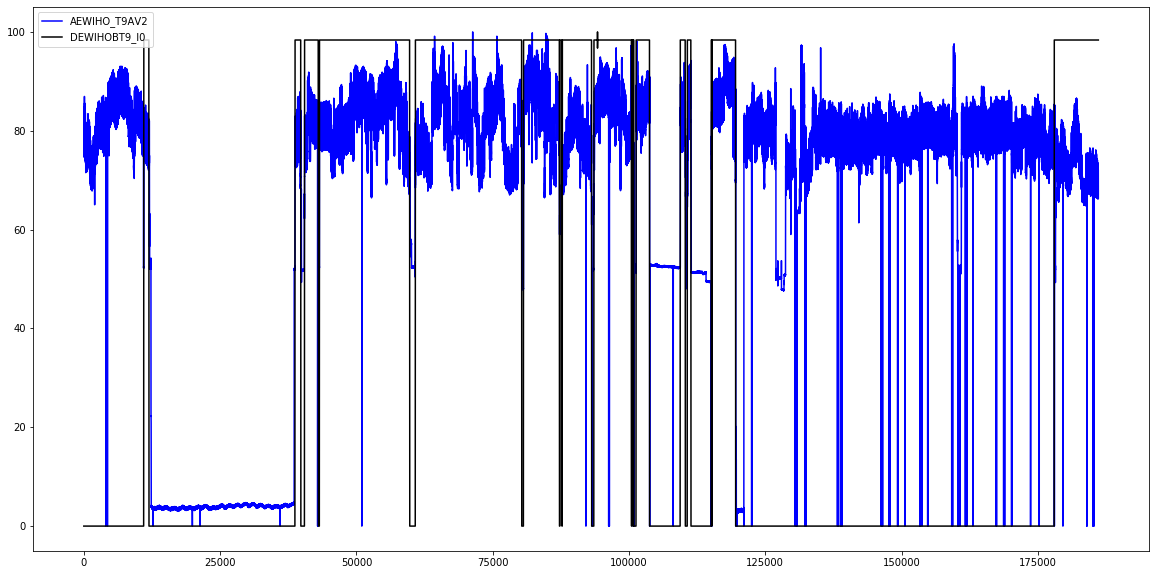

In [10]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
# plt.plot(initial_dataframe[furnace_signal_column], color = 'red')
plt.plot(initial_dataframe["DEWIHOAT9_I0"], color = 'black')
plt.legend([target_column, furnace_signal_column], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

In [23]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

test_new.head()

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
0,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.096640,0.671974,33.111827,2019-08-15 09:10:00
1,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,71.902377,50.110508,40.379436,73.763059,71.276868,49.615189,38.034993,0.672205,33.060837,2019-08-15 09:09:00
2,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,71.944404,50.107863,40.662733,73.763059,71.434676,49.749139,37.951489,0.682817,33.066594,2019-08-15 09:08:00
3,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,71.943151,50.062481,40.229931,73.763059,71.210012,49.954175,37.911700,0.665143,34.003952,2019-08-15 09:07:00
4,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,71.966247,50.058978,39.999024,73.763059,71.112367,49.849248,37.978844,0.664477,33.928494,2019-08-15 09:06:00


In [32]:
test_new_alter = test_new.loc[::-1]
print(test_new_alter.shape)
test_new_alter.head()

(186100, 4239)


,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
186099,72.030143,28.019753,90.988125,25.369044,92.387543,90.208292,93.674403,10.971169,51.916376,100.000000,...,83.229109,41.687065,39.000517,77.532654,75.407204,64.213670,57.013879,0.658391,19.815859,2019-02-11 21:57:00
186098,72.030143,37.870419,90.988125,34.451579,88.177774,90.449495,93.353135,18.897334,51.451800,75.601790,...,83.228662,41.687065,39.195484,77.545509,75.505091,64.437859,56.966760,0.659977,20.066390,2019-02-11 21:58:00
186097,72.030143,37.539252,91.149431,28.288056,83.217843,90.611060,93.694815,21.669213,51.451800,88.131190,...,83.225391,41.687065,39.119922,77.396914,75.402730,64.408484,56.932992,0.677605,20.264656,2019-02-11 21:59:00
186096,72.491504,33.654575,91.149431,19.484082,78.546713,90.590588,93.353135,20.455251,50.987224,91.157527,...,83.209000,41.687065,39.223556,77.730325,75.587341,64.568284,56.878544,0.676931,20.228573,2019-02-11 22:00:00
186095,72.952865,31.004058,91.149431,13.651564,74.451979,90.993356,93.373546,16.226620,50.987224,100.000000,...,83.230815,41.687065,39.168015,77.320672,75.395569,64.473462,56.978802,0.659958,20.348523,2019-02-11 22:01:00


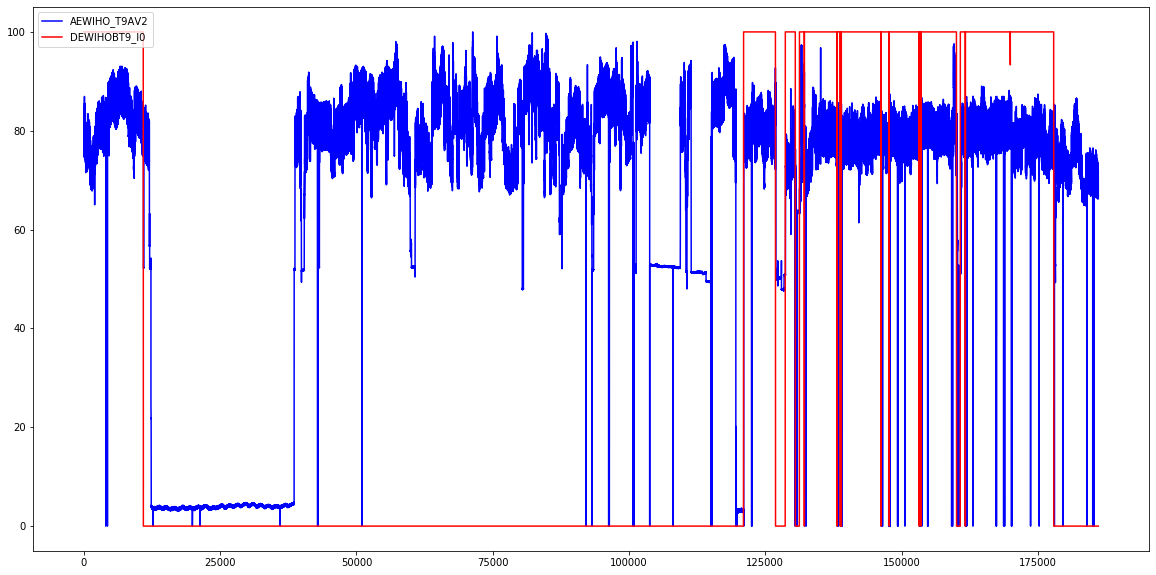

In [33]:
plt.plot(test_new_alter[target_column], color = 'blue')
plt.plot(test_new_alter[furnace_signal_column], color = 'red')
plt.legend([target_column, furnace_signal_column], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

In [24]:
test_new.shape

(186100, 4239)

In [25]:
# test_new_1 = test_new.drop(['row ID'], axis = 1)

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
multivariate_data = alter_time(test_new_2, start_pos, 129600)

In [26]:
multivariate_data.shape

(129600, 3983)

In [27]:
multivariate_data.head()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,dateTime
129599,65.513264,35.130426,95.353206,33.461312,55.305497,90.953152,96.827379,28.257721,78.687417,22.046762,...,94.694625,55.649204,38.640661,56.562991,67.085132,73.884425,26.316596,0,61.065718,2019-04-15 23:04:00
129598,64.590542,31.615410,95.394103,30.464930,54.844136,90.953152,96.827379,28.307382,79.616574,22.046762,...,94.694625,55.787206,38.607918,56.944007,67.085132,73.620439,26.845777,0,60.821636,2019-04-15 23:05:00
129597,64.071356,30.026222,95.192659,27.347250,54.844136,91.114717,96.987635,26.938906,80.081150,21.695885,...,94.742709,55.925206,40.226835,57.411187,67.085132,73.488115,29.867288,0,59.847709,2019-04-15 23:06:00
129596,62.629758,28.472900,94.870806,26.580255,54.325260,91.094236,96.987635,23.161835,80.545726,23.352811,...,94.710575,55.509056,42.442967,56.895913,66.016104,73.488115,30.438894,0,59.854911,2019-04-15 23:07:00
129595,61.707036,26.472648,94.850357,24.632380,54.844136,90.933430,96.907502,23.901251,81.010302,23.925442,...,94.662243,55.088542,42.344972,57.432016,63.051710,73.717347,30.804685,0,59.219098,2019-04-15 23:08:00


In [28]:
multivariate_data.tail()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,dateTime
4,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.629849,63.149452,42.009703,57.167141,70.572657,72.358673,25.090725,0,4.817258,2019-08-15 09:06:00
3,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,42.389817,57.236065,70.572657,72.472953,24.828106,0,4.822540,2019-08-15 09:07:00
2,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,0,4.821300,2019-08-15 09:08:00
1,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,0,4.821300,2019-08-15 09:09:00
0,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,0,4.826622,2019-08-15 09:10:00


In [12]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [ ]:
rearranged_dataframe.head()

In [ ]:
# Checking signal for blast furnace B for turbine 9. If the value is 100 keep the ROW except drop
dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(rearranged_dataframe,furnace_signal_column)

In [ ]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)

In [ ]:
# # Checking target column's value. If ZERO drop the row.
# #target_signal = 'AEWIHO_T9AV2'
# # dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_no_zero_value_blast_furnace, target_column)

In [ ]:
def remove_zero(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] != val).all(axis=1)]
    return df

dataframe_no_zero_value_target_column = remove_zero(dataframe_no_zero_value_blast_furnace, target_column,0)

In [ ]:
print(dataframe_no_zero_value_target_column.shape)

In [ ]:
# Drop the column which has sam evalue in every ROW
dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [ ]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_drop_column_with_same_value)


In [ ]:
# Drop the row who has consecutive same value
dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

In [ ]:
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)

In [ ]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')


# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)


In [ ]:
dataframe_high_correlation.shape

In [ ]:
dataframe_datetime.tail()

In [13]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder  has already created


In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation[0:5000])

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

In [ ]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [14]:
temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

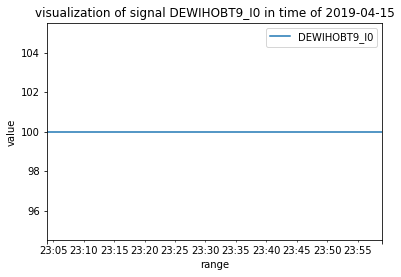

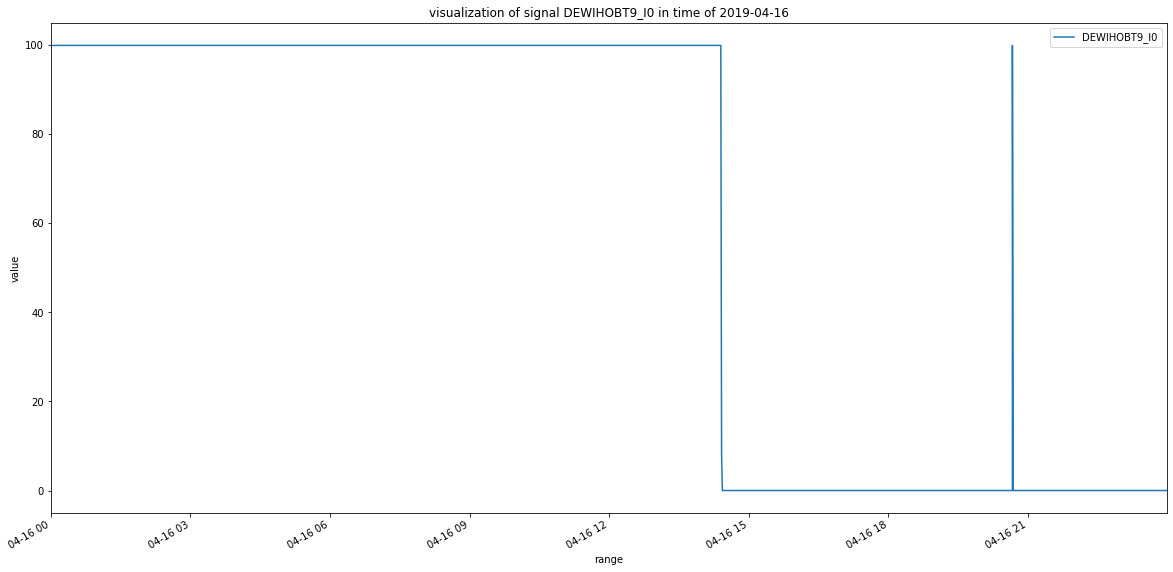

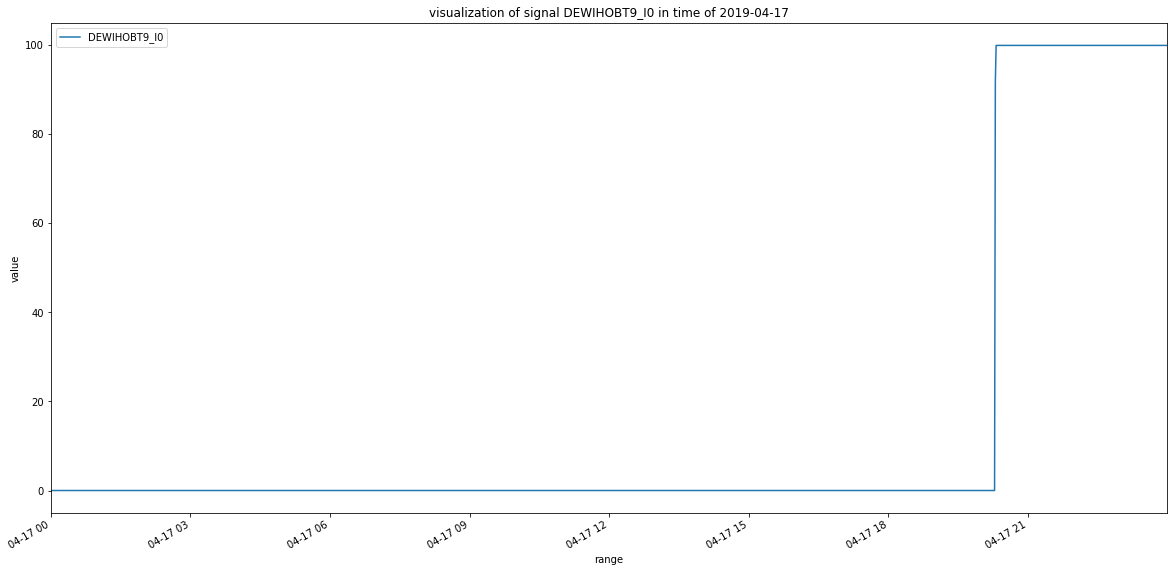

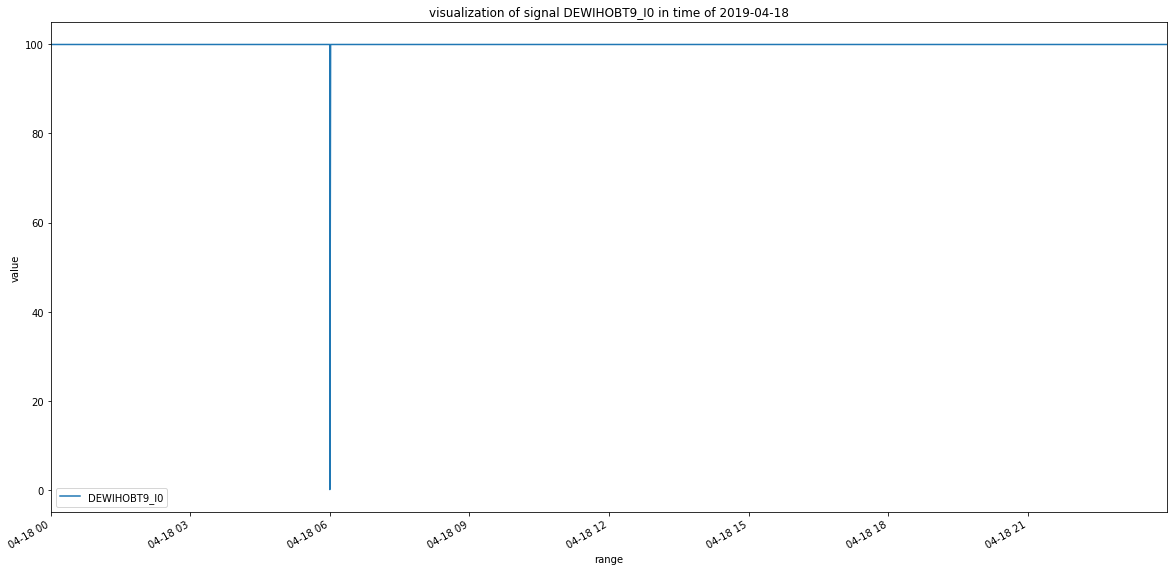

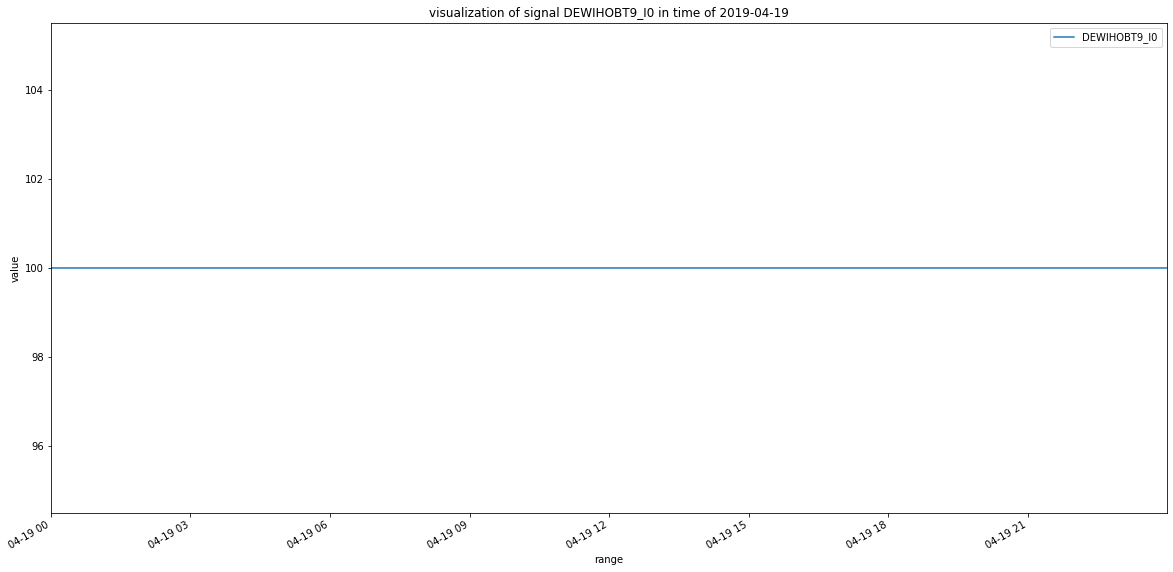

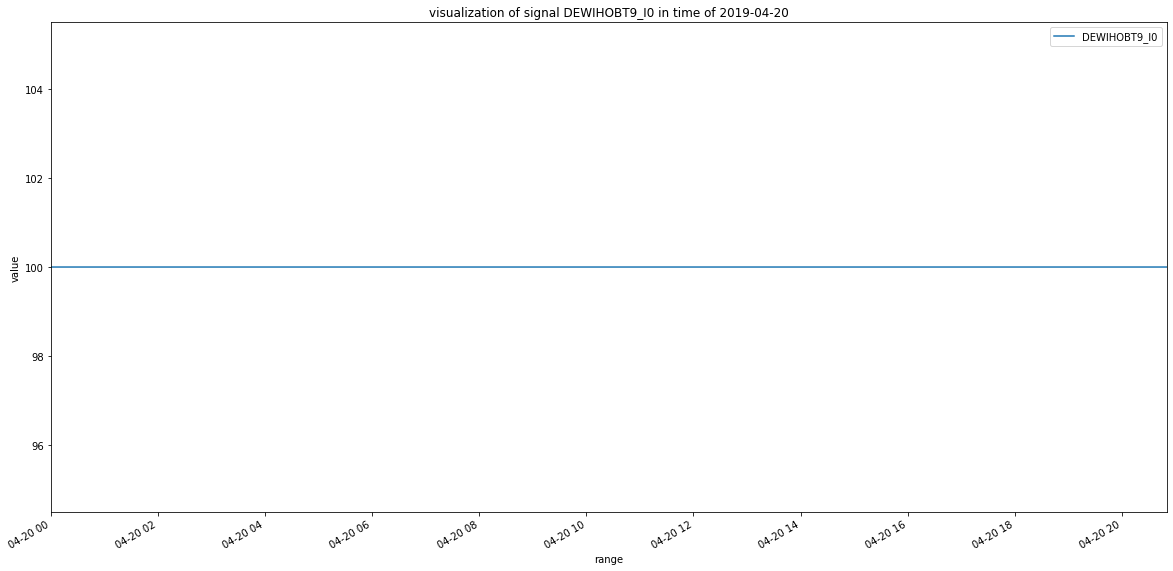

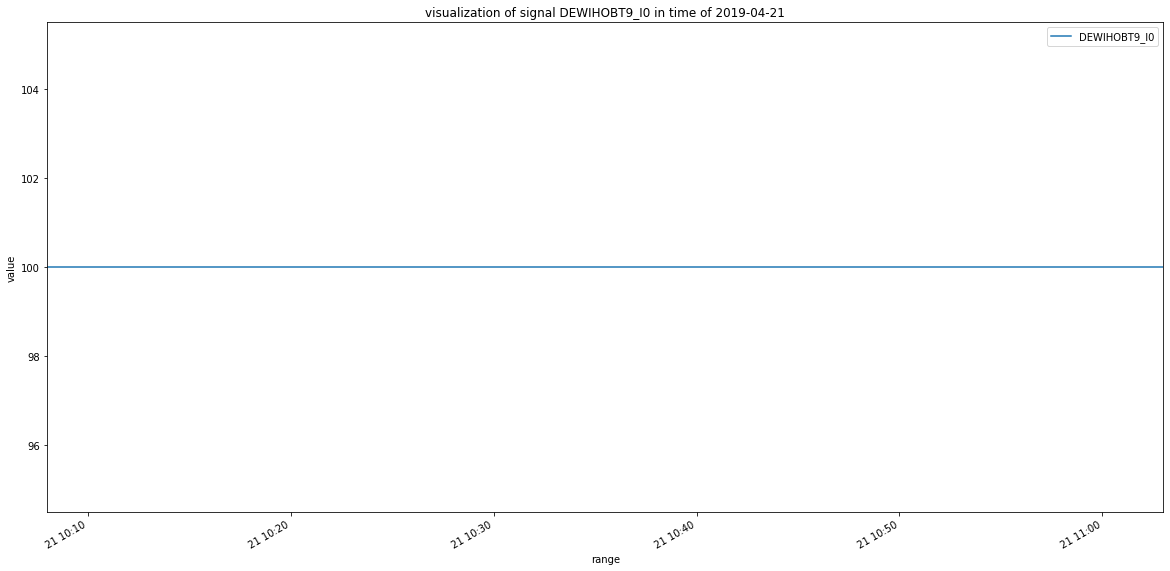

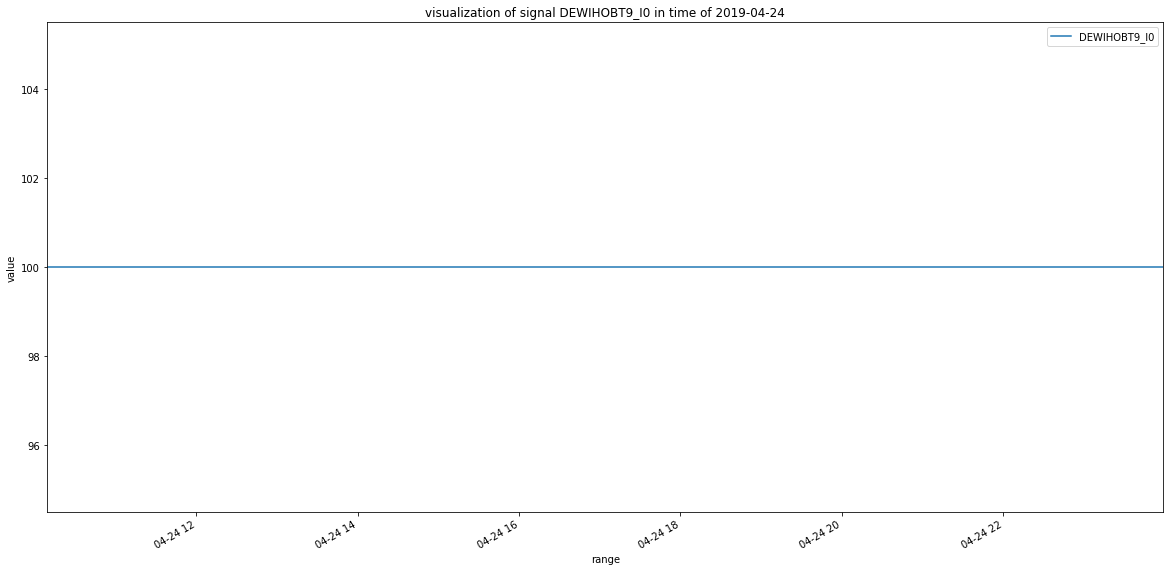

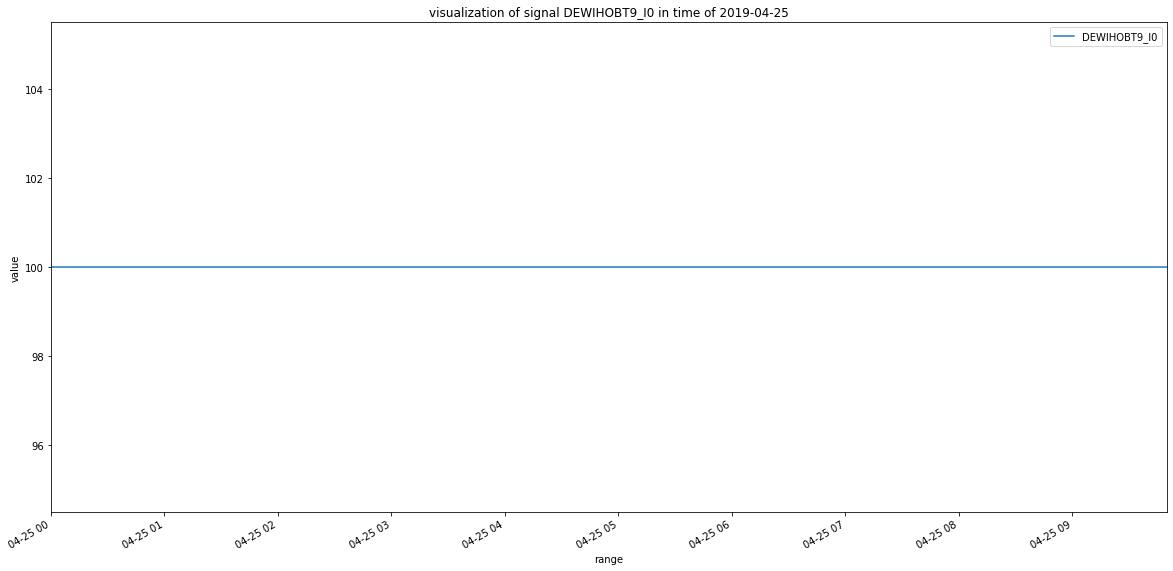

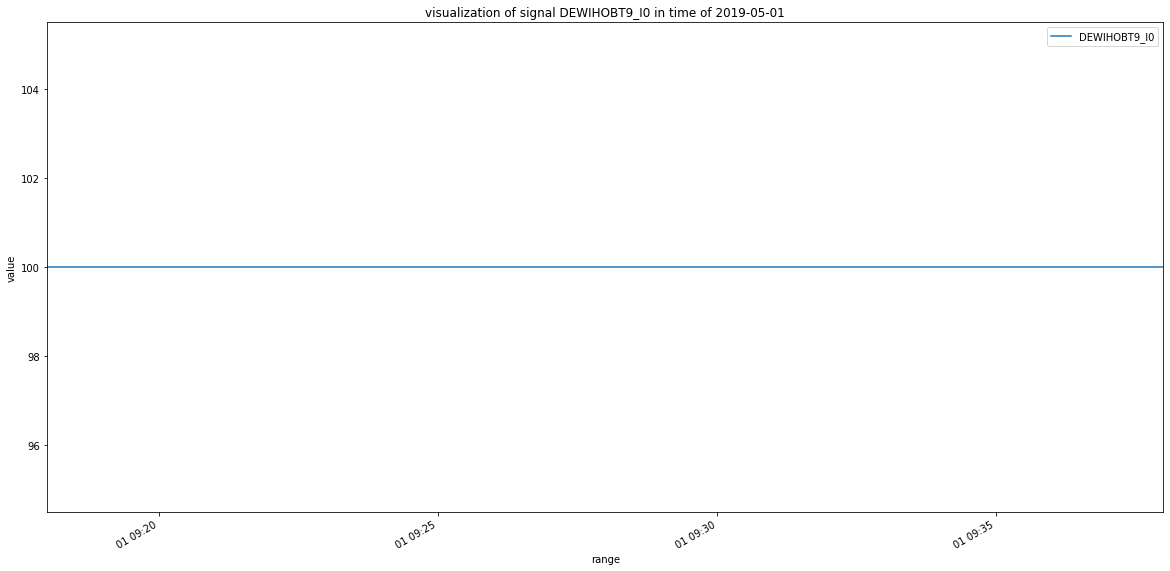

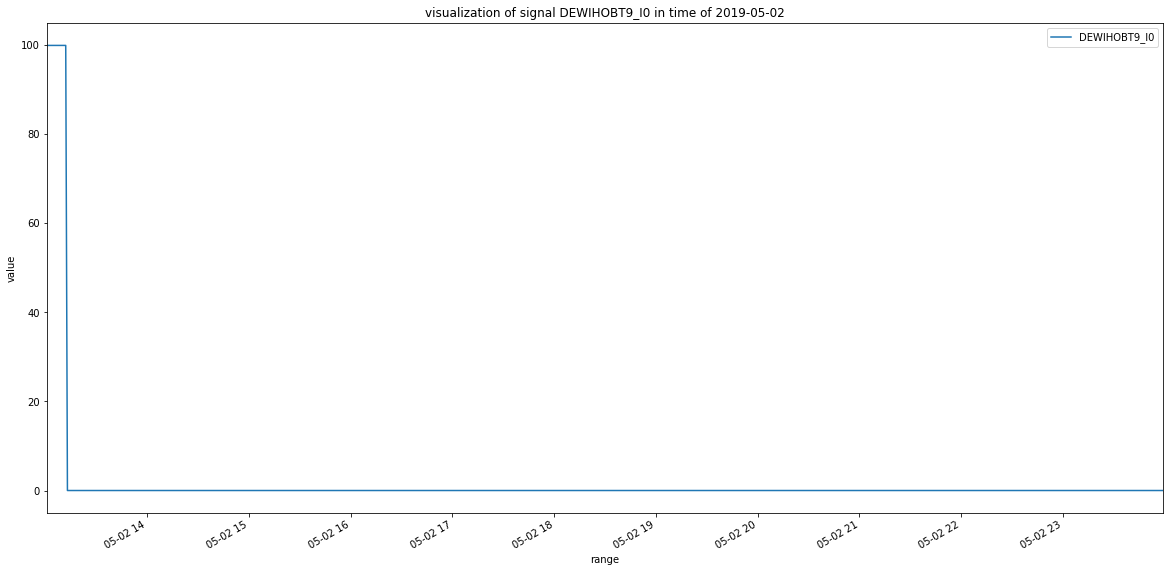

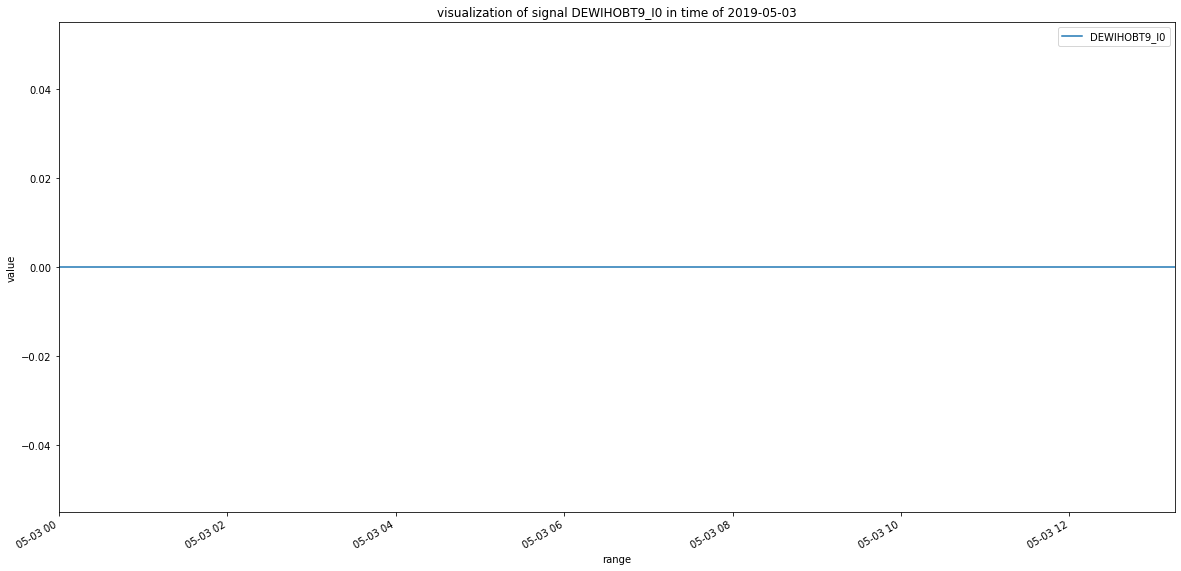

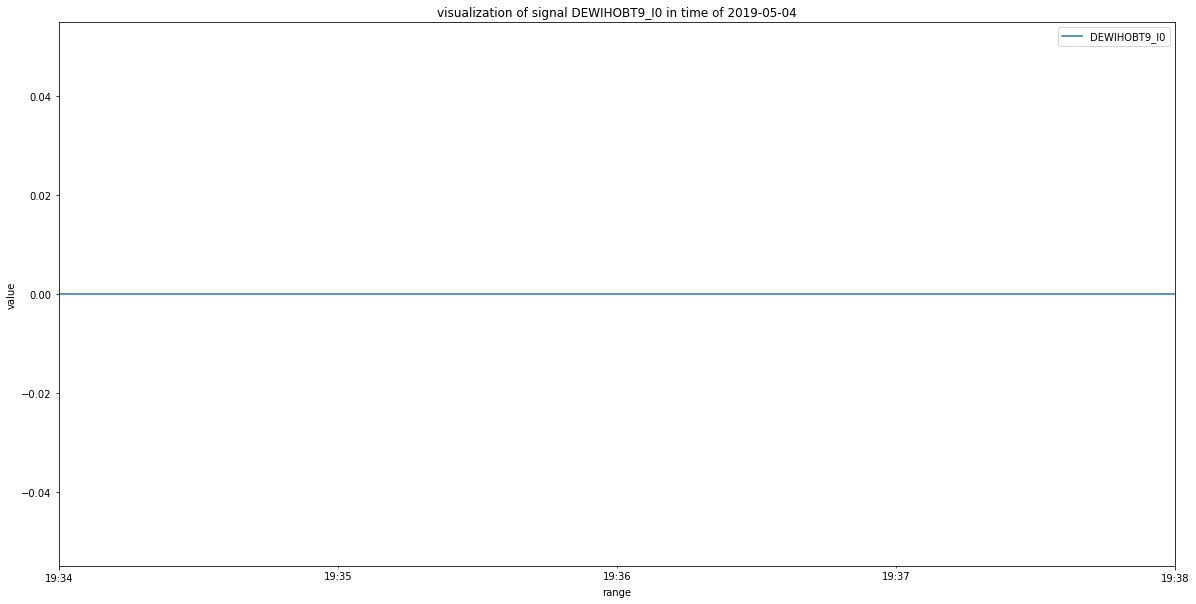

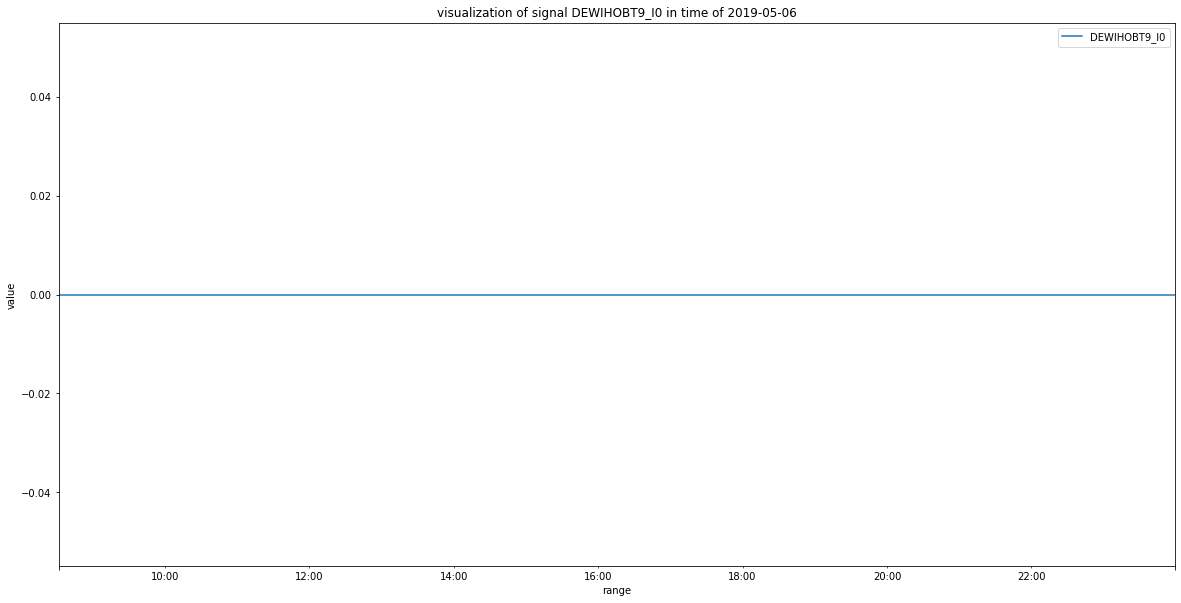

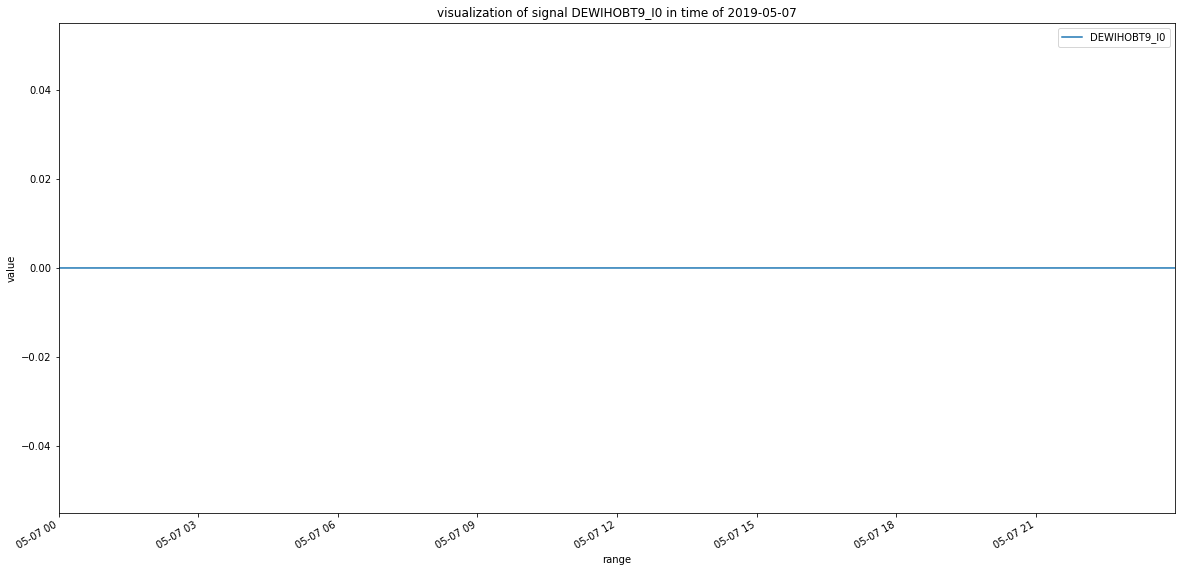

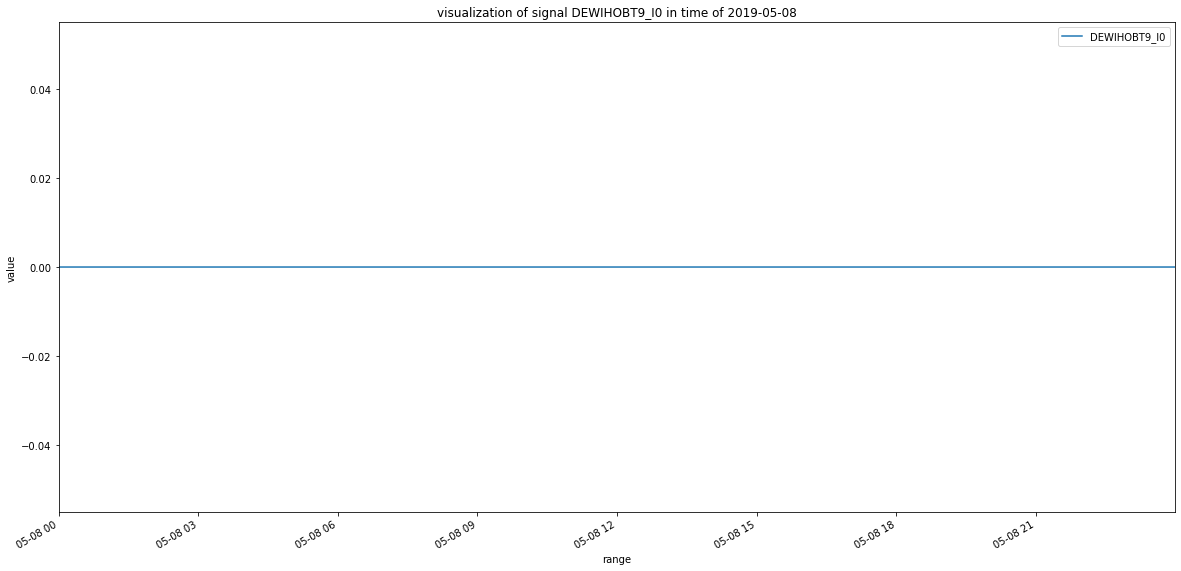

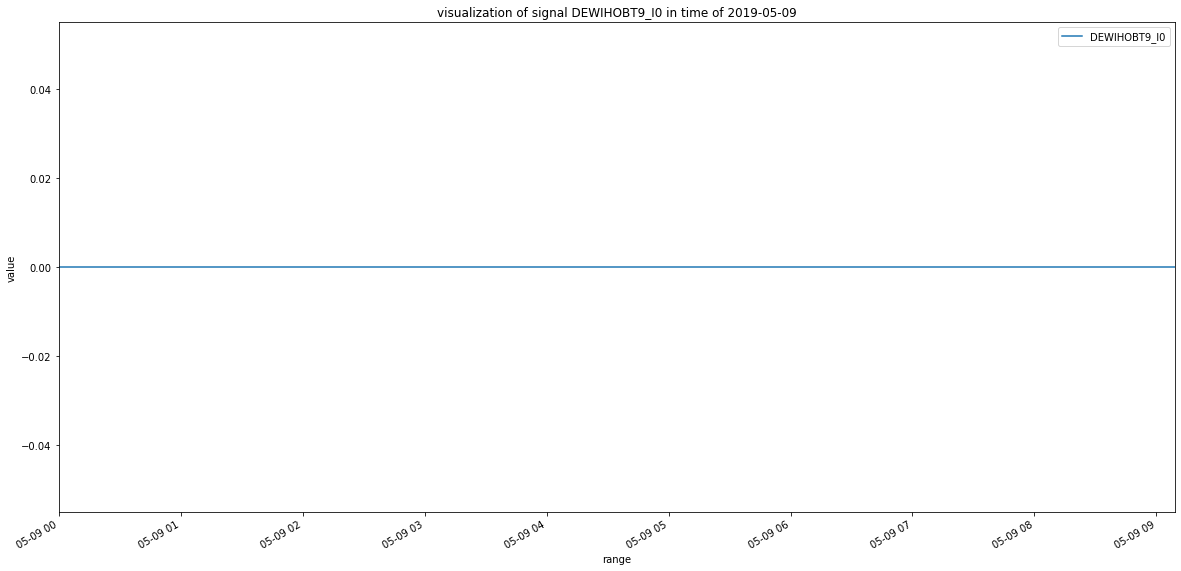

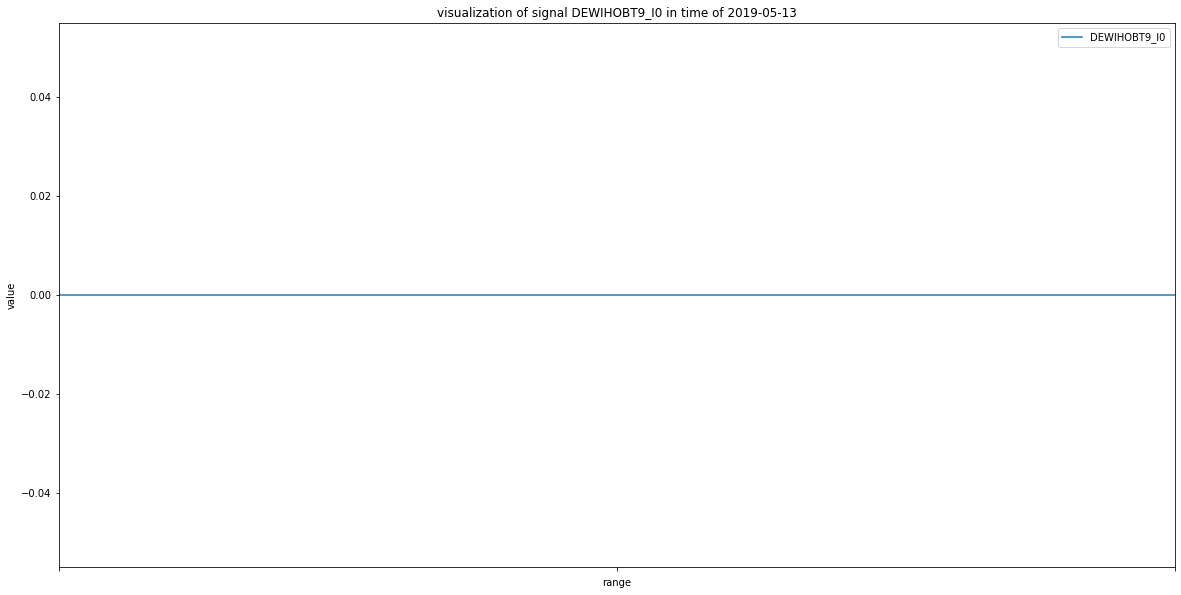

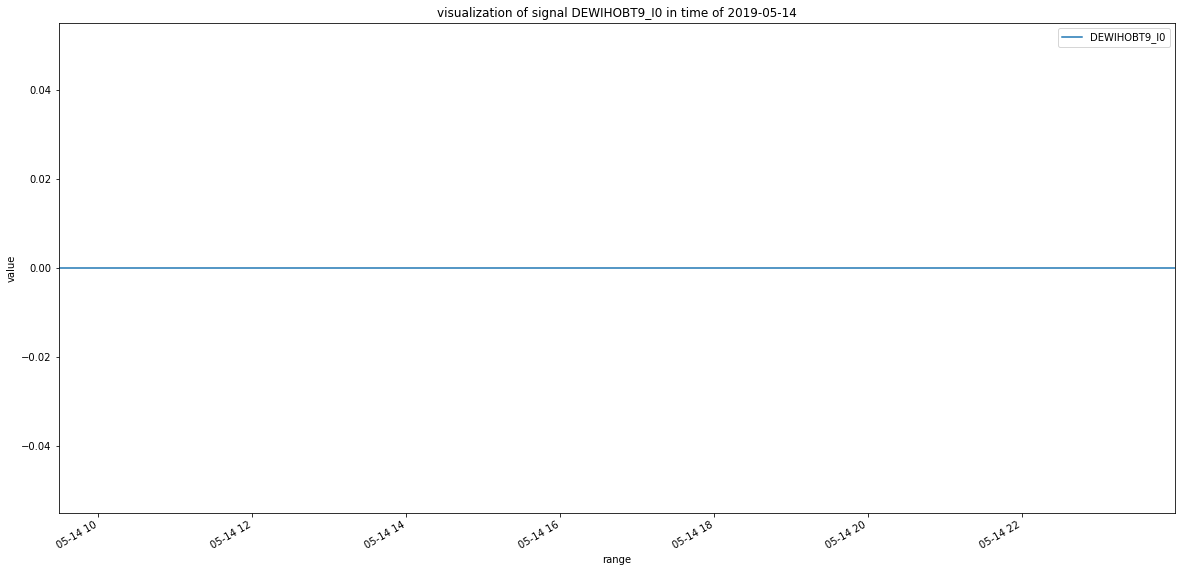

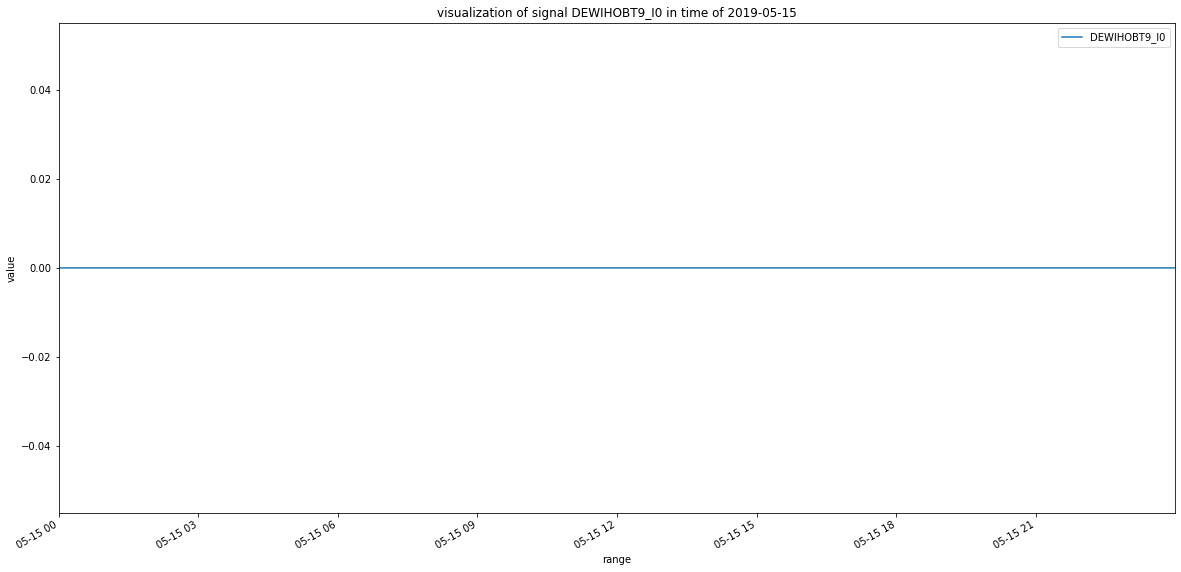

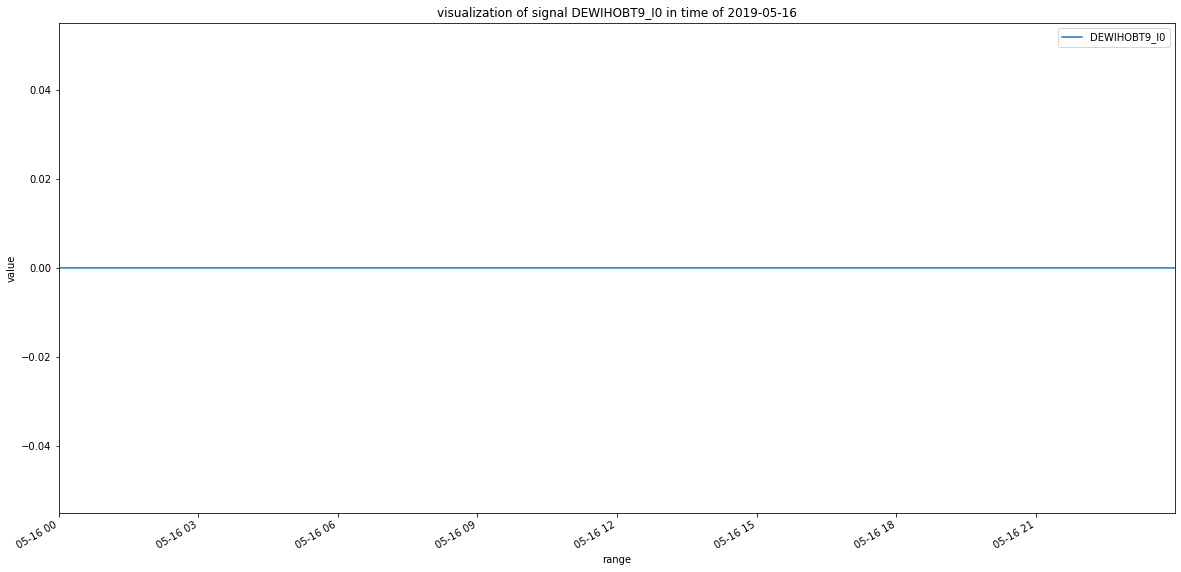

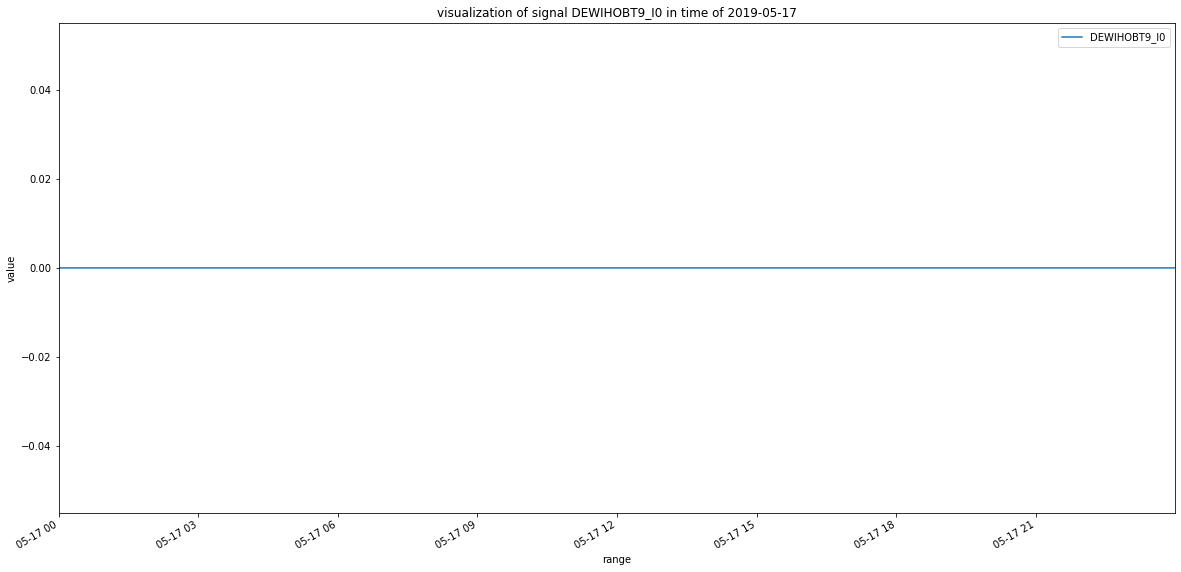

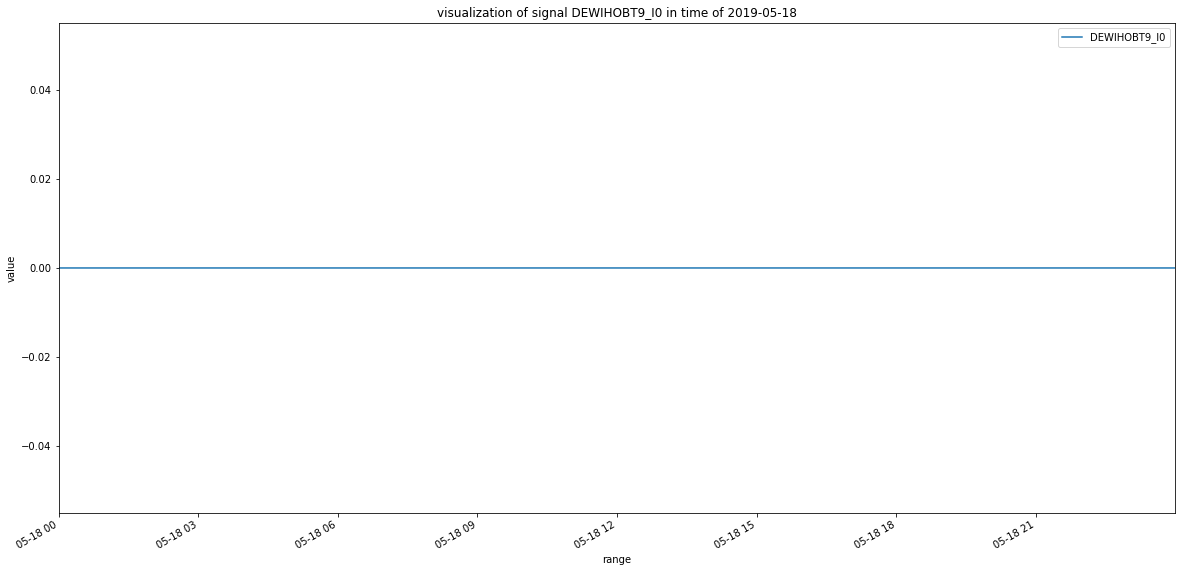

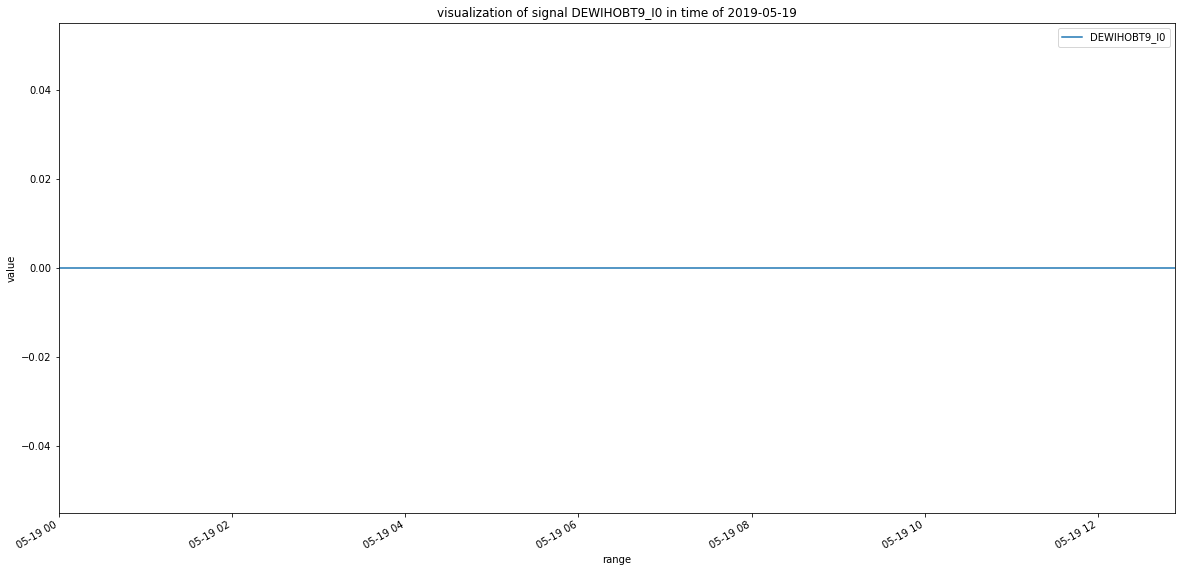

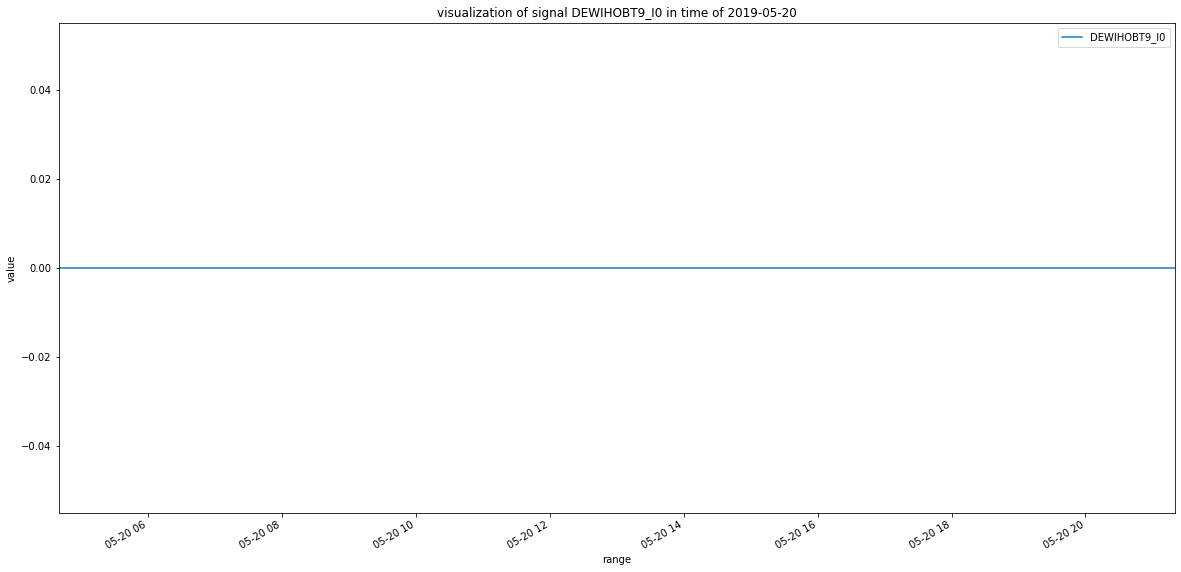

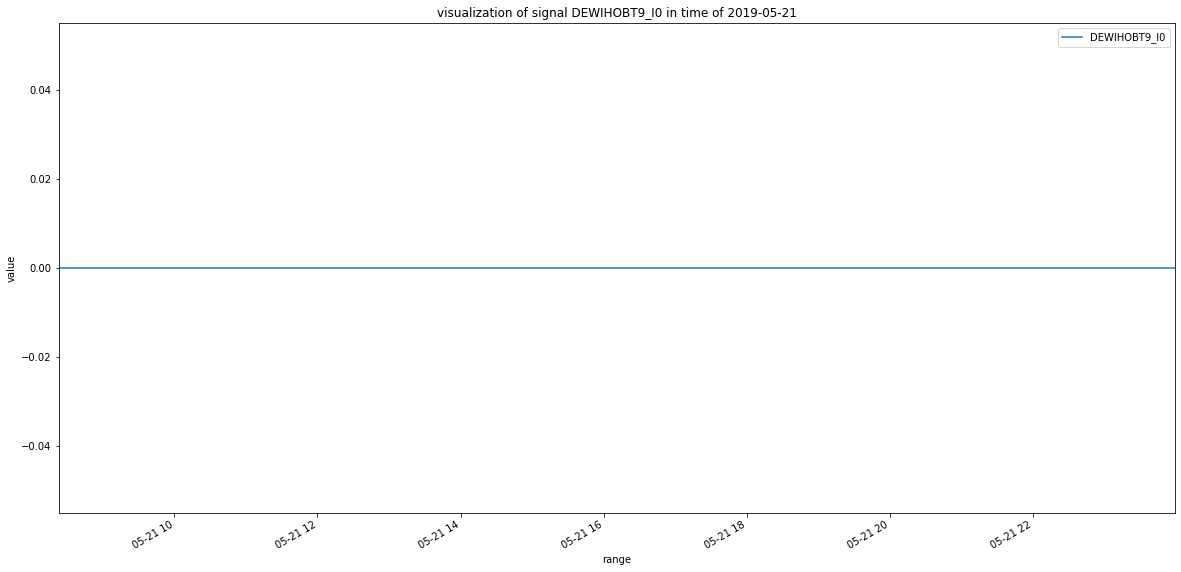

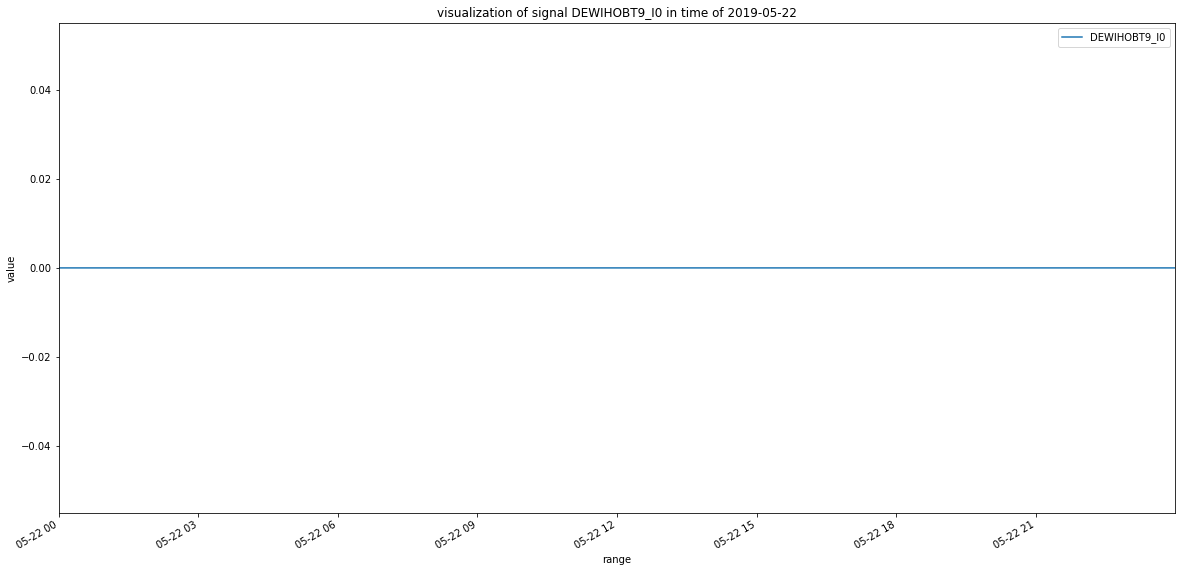

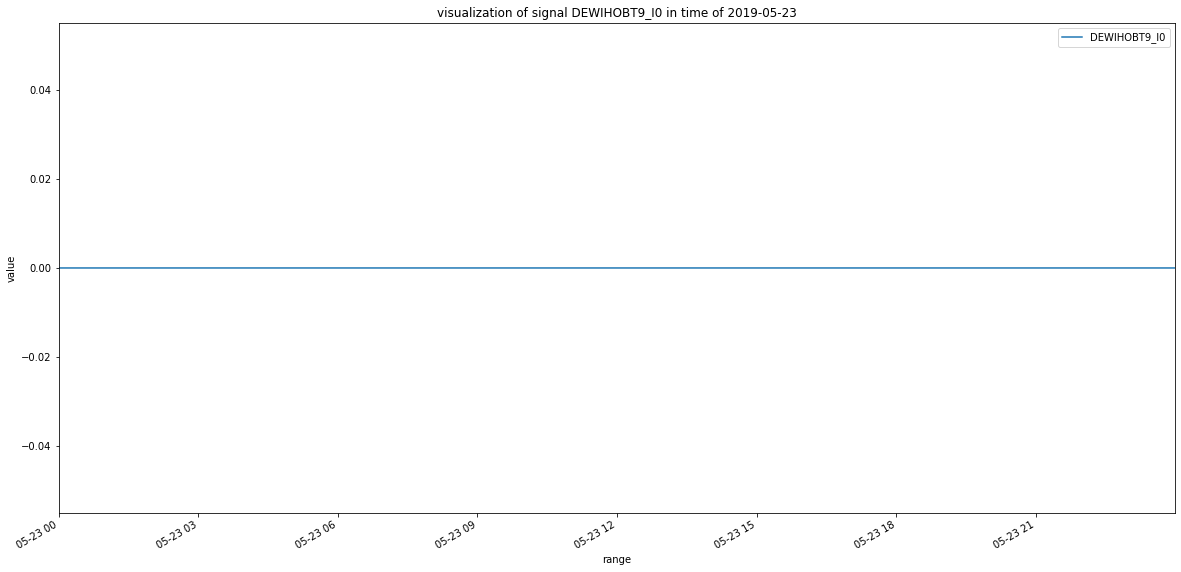

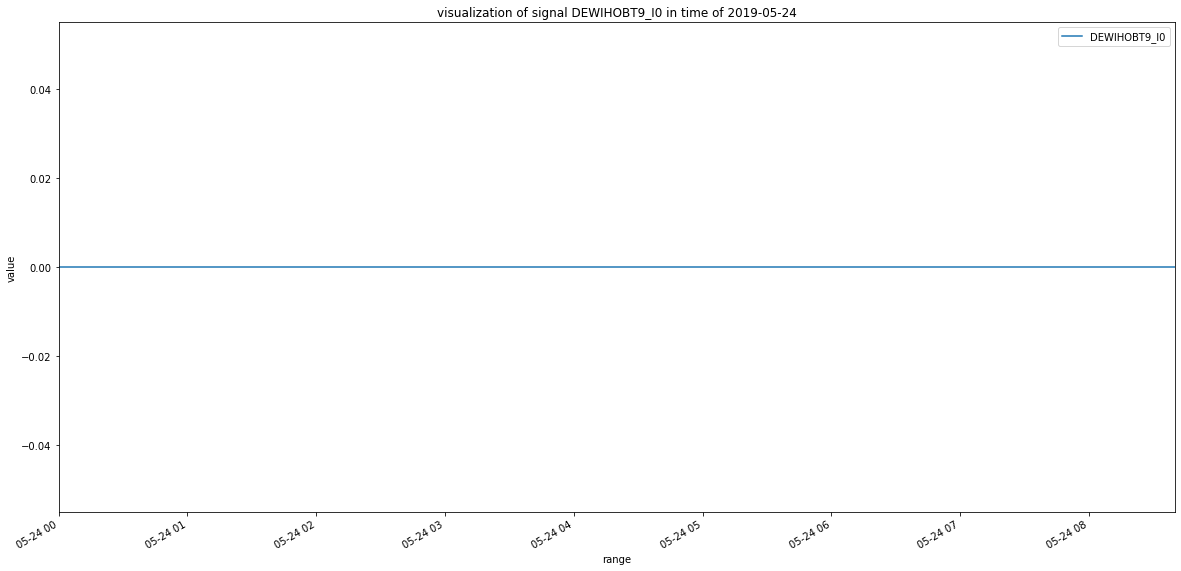

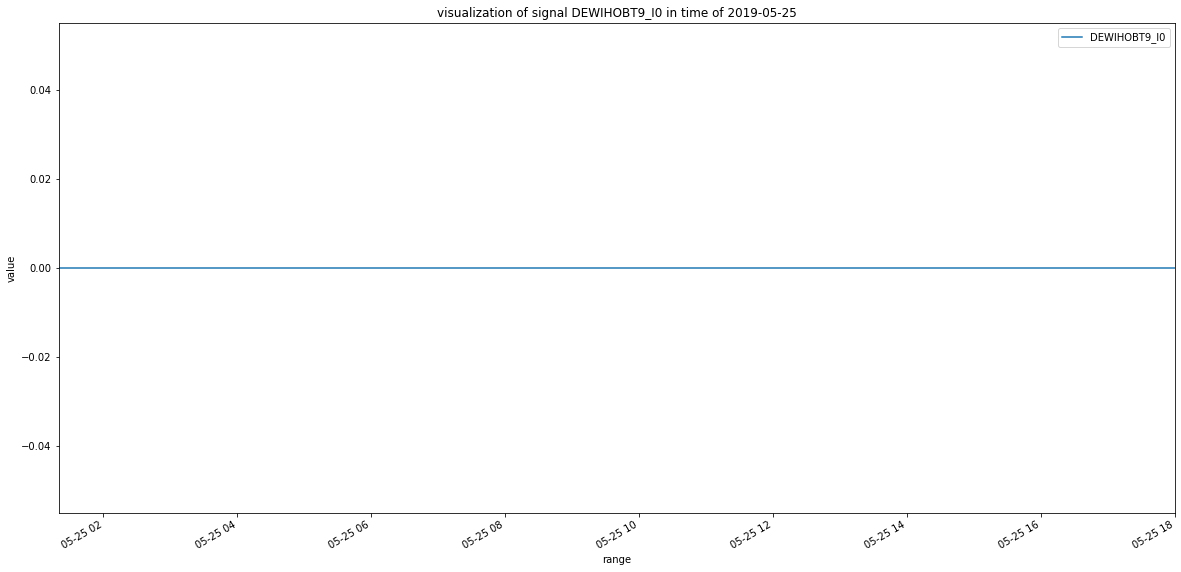

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737205.4444444445 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


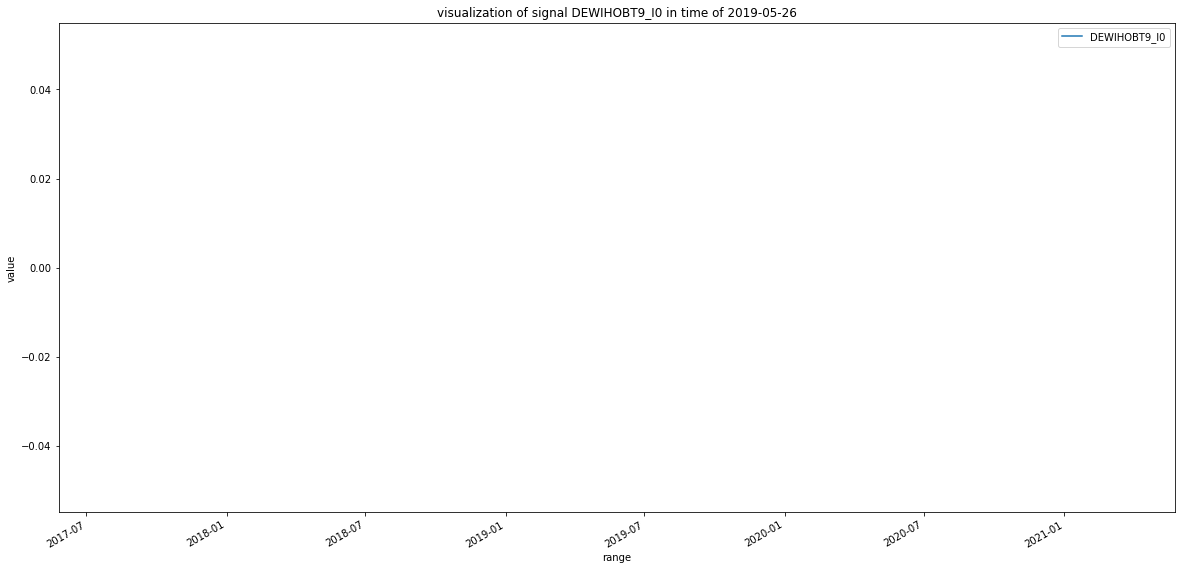

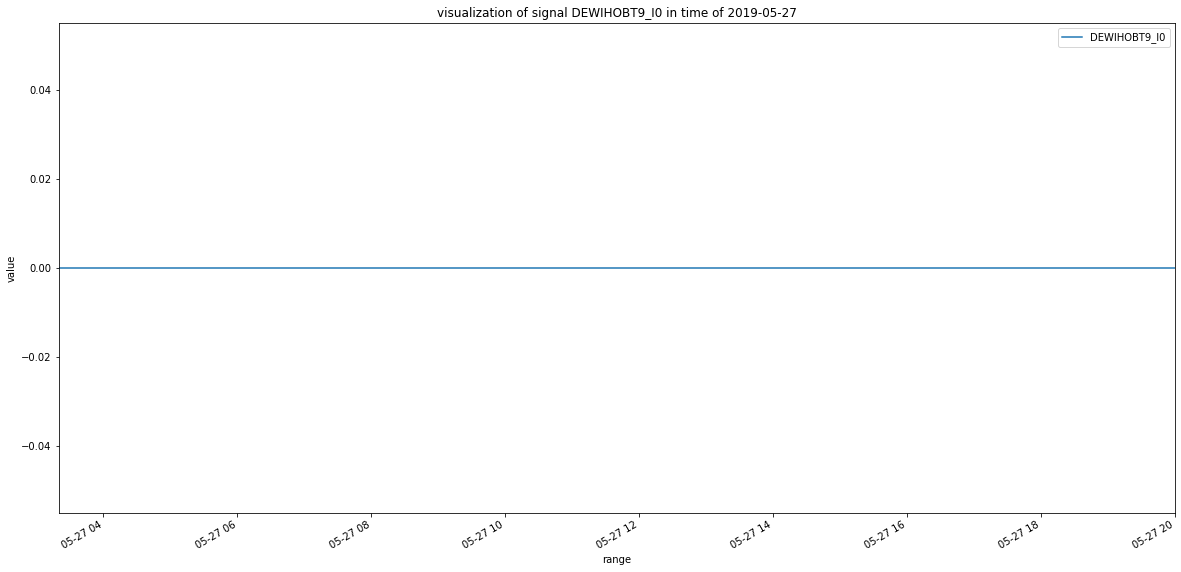

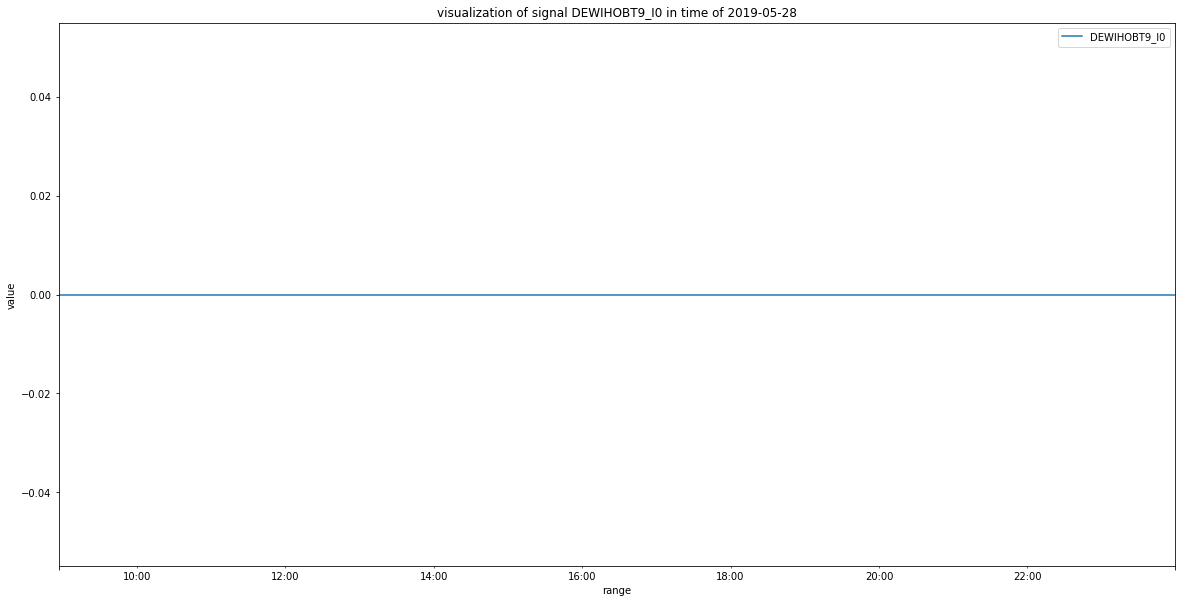

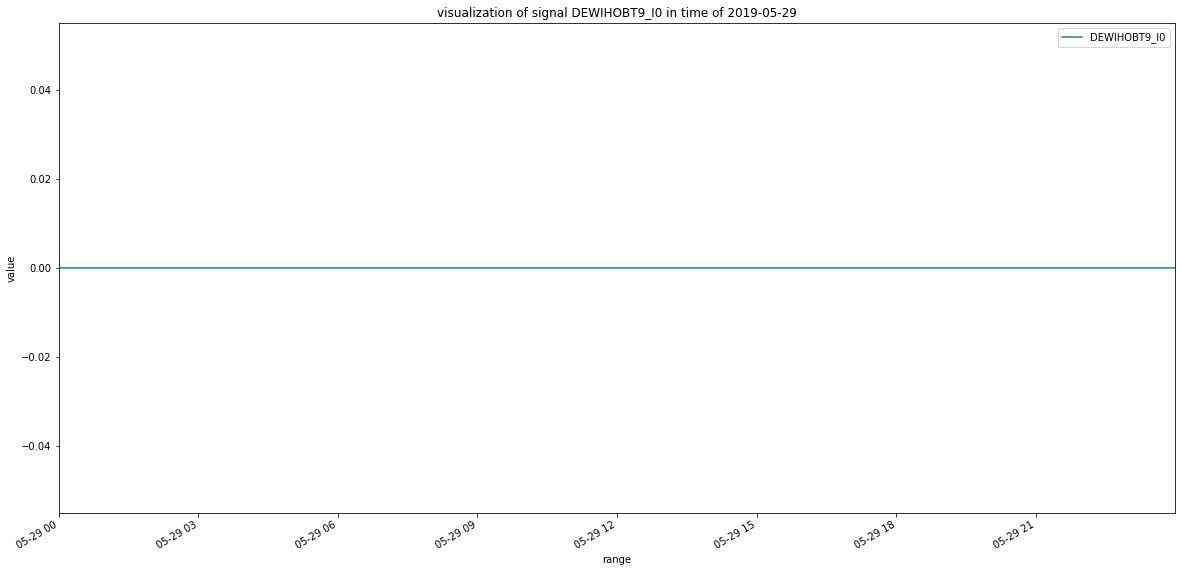

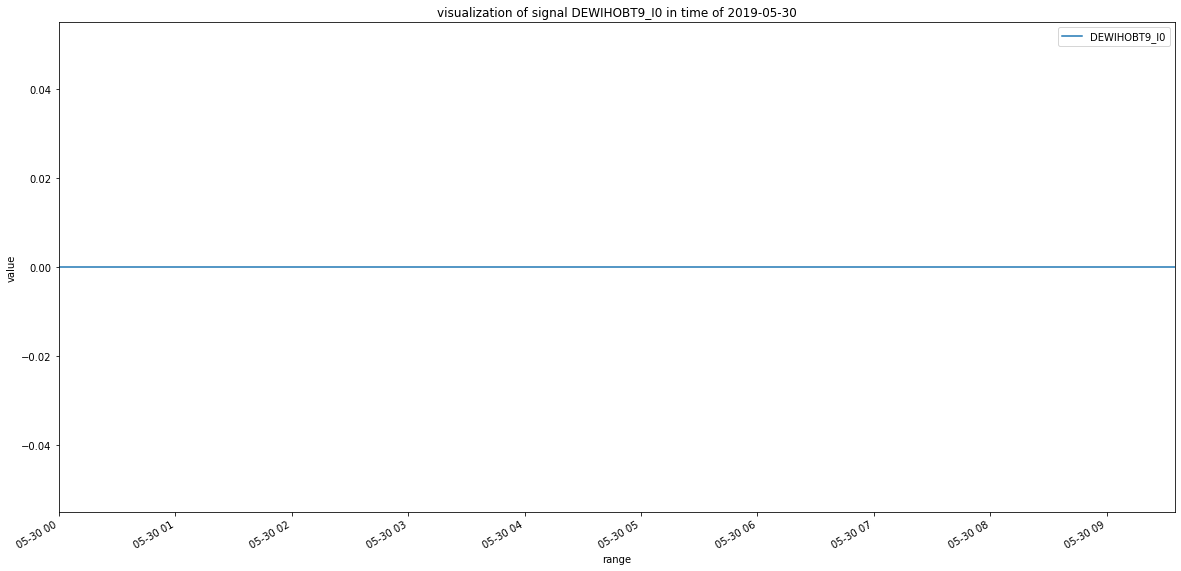

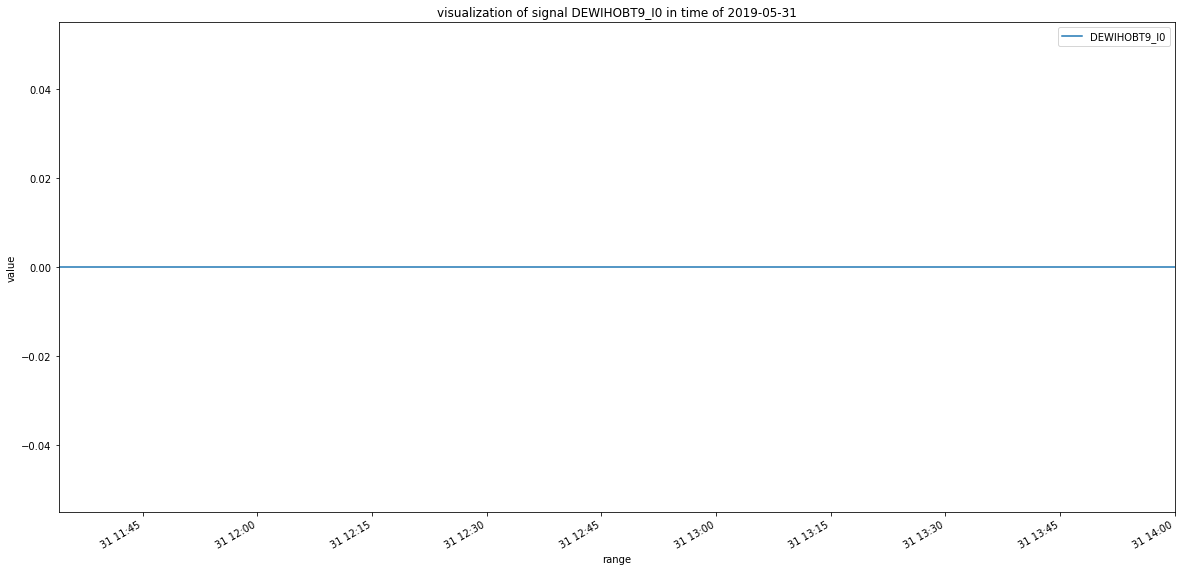

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737211.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


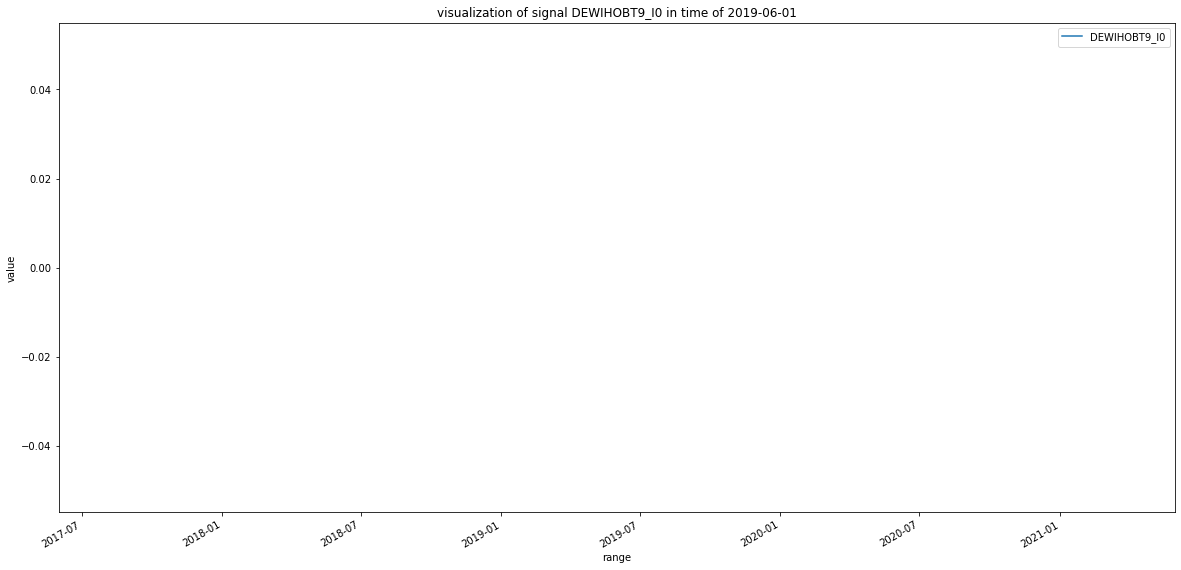

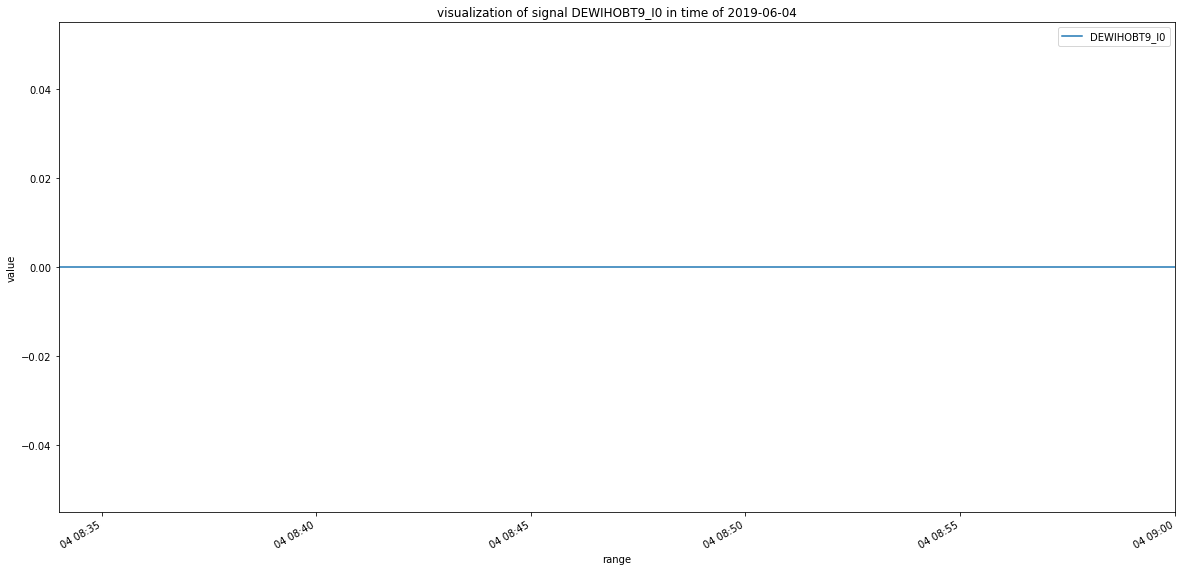

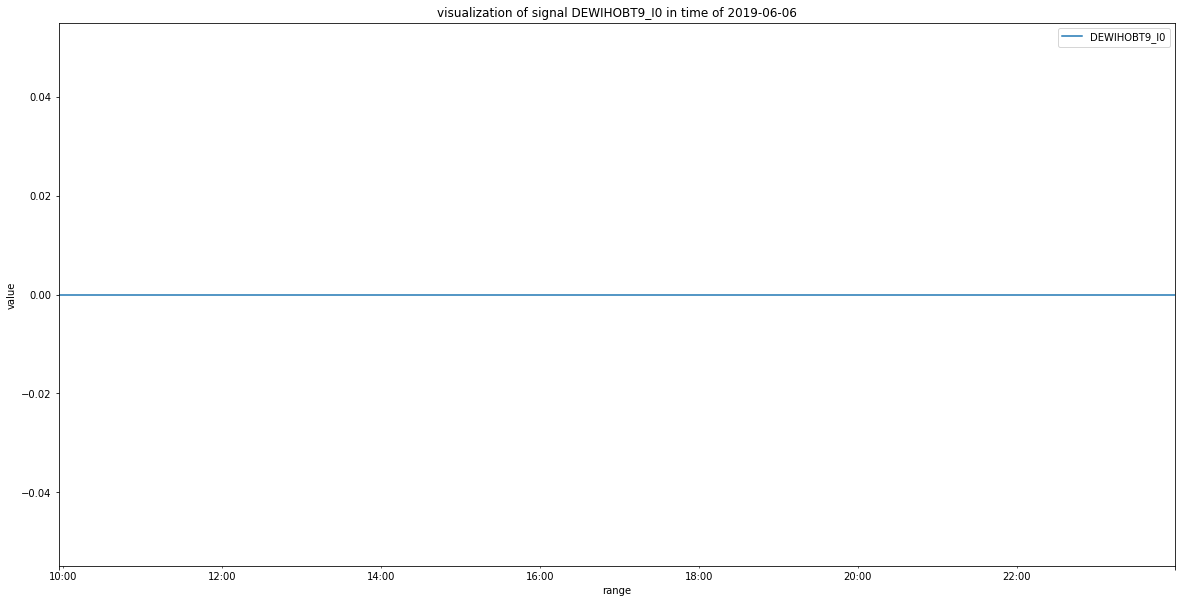

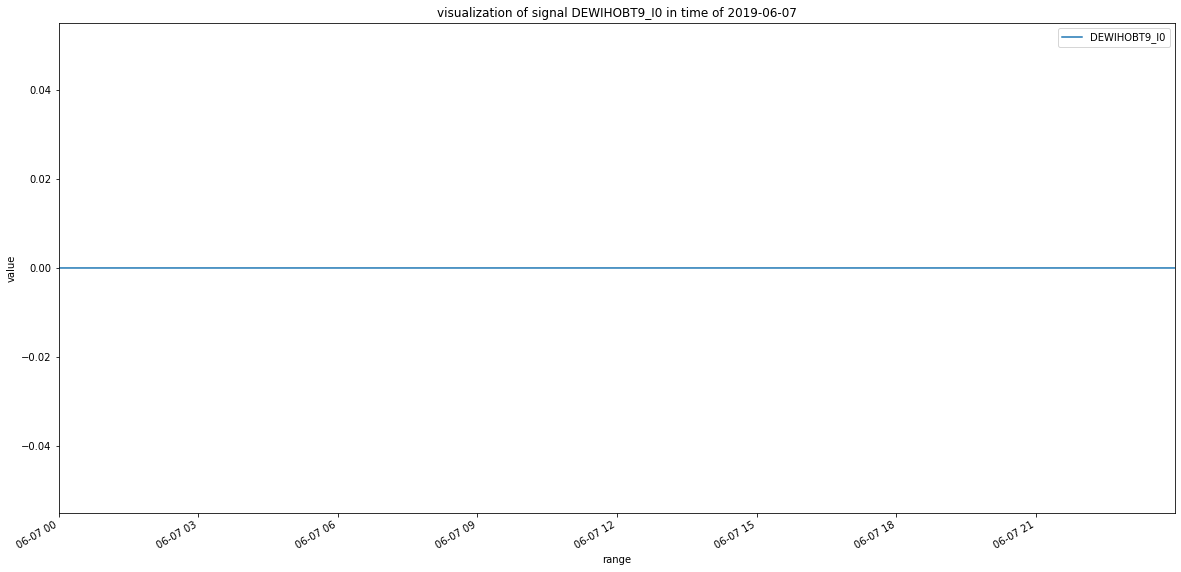

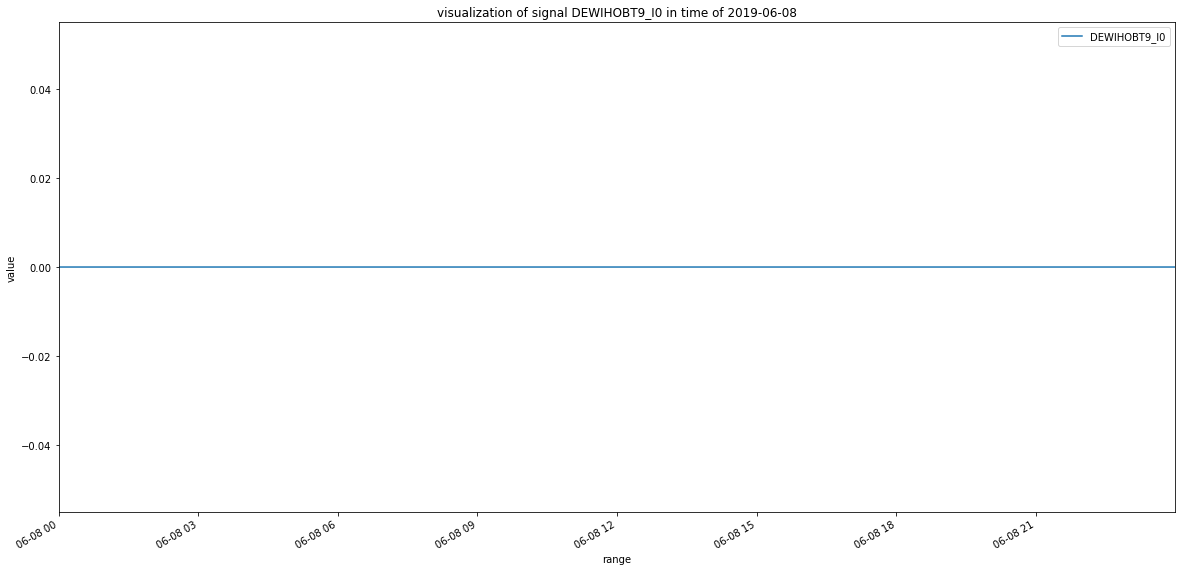

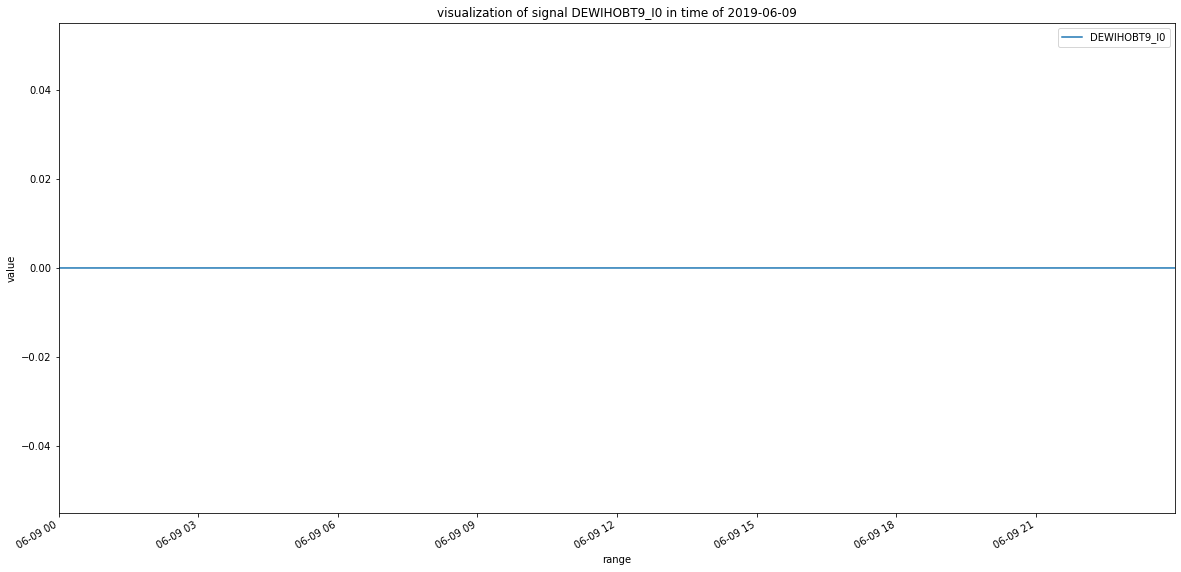

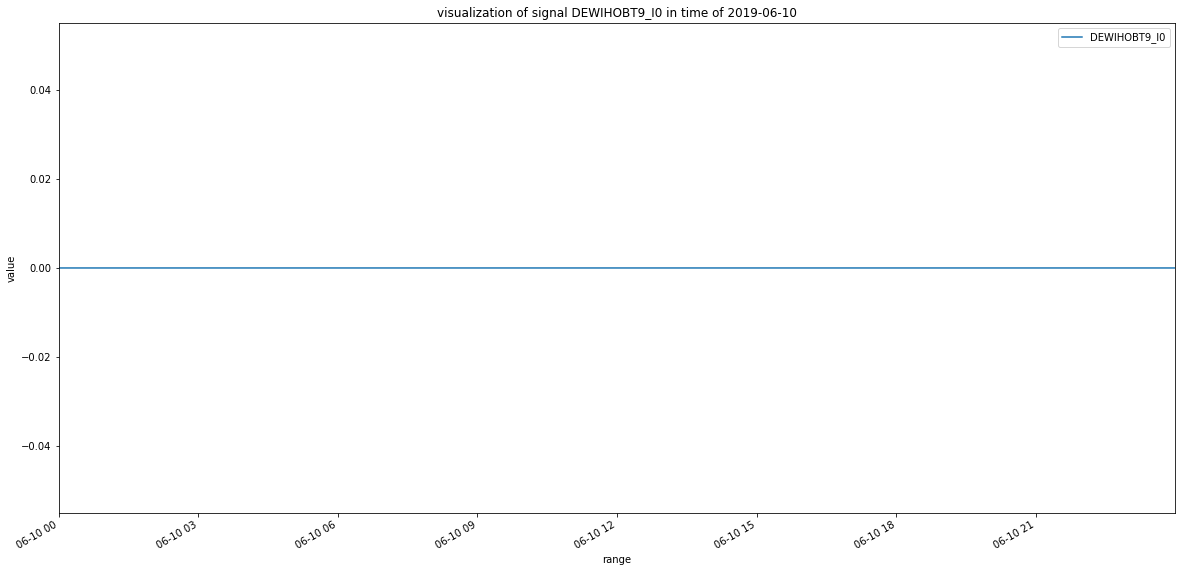

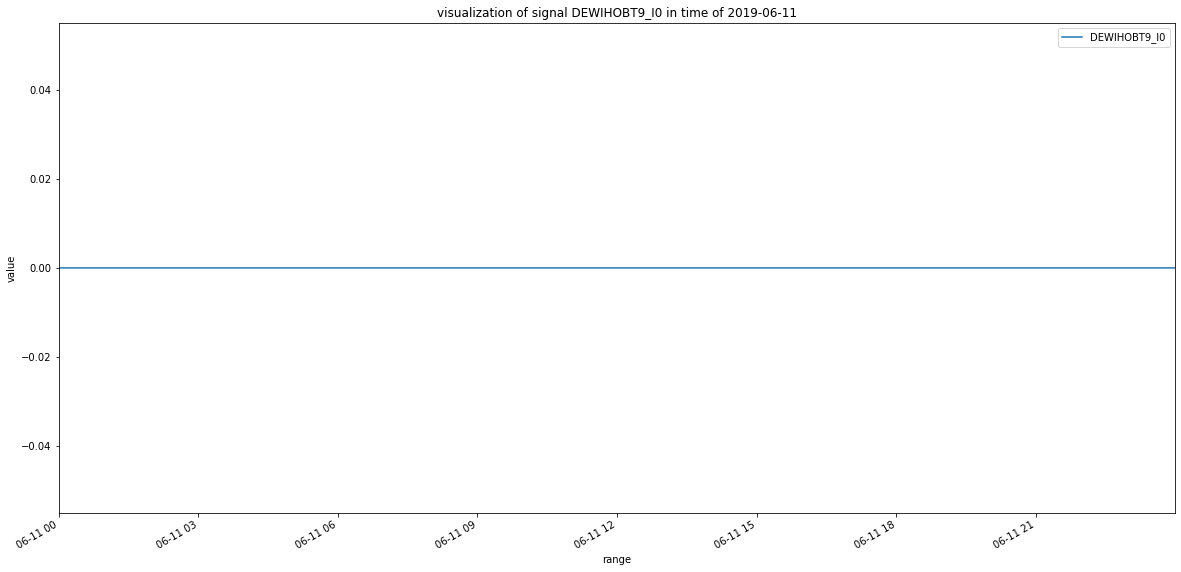

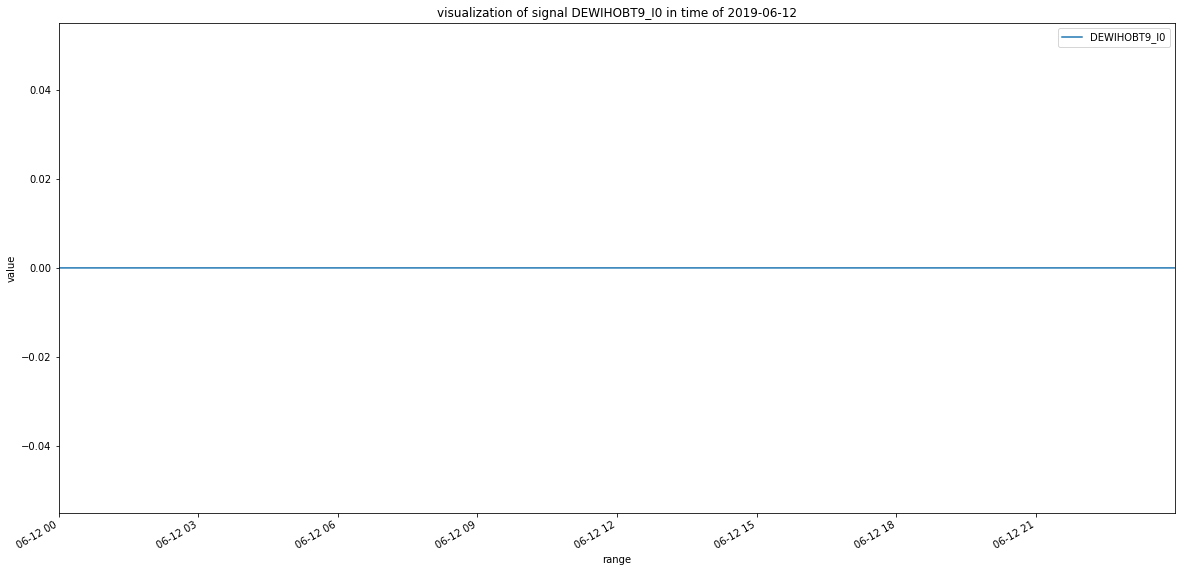

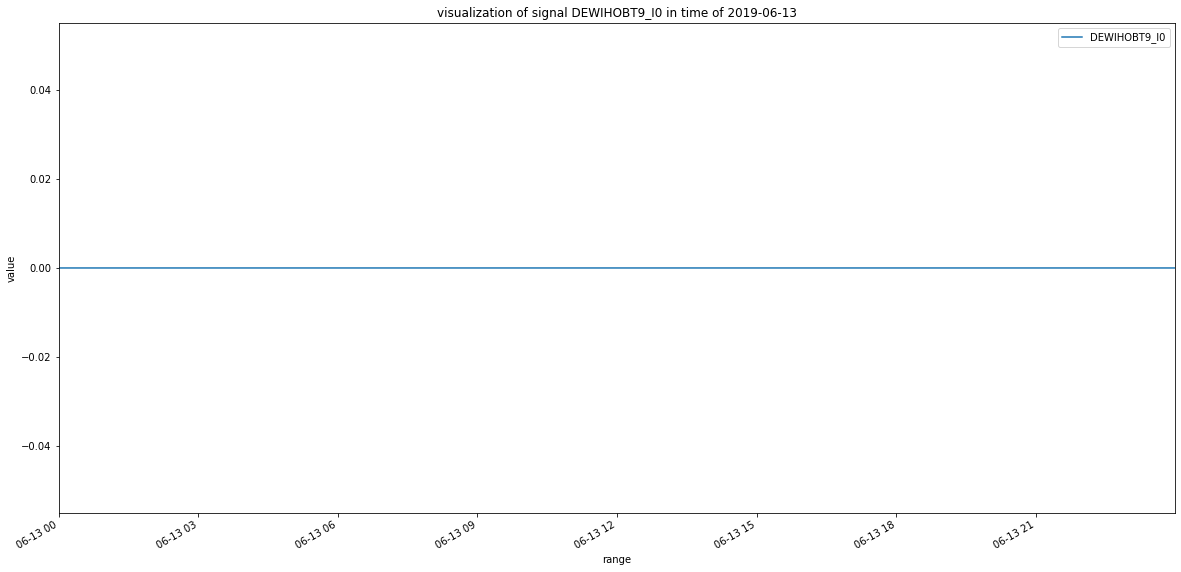

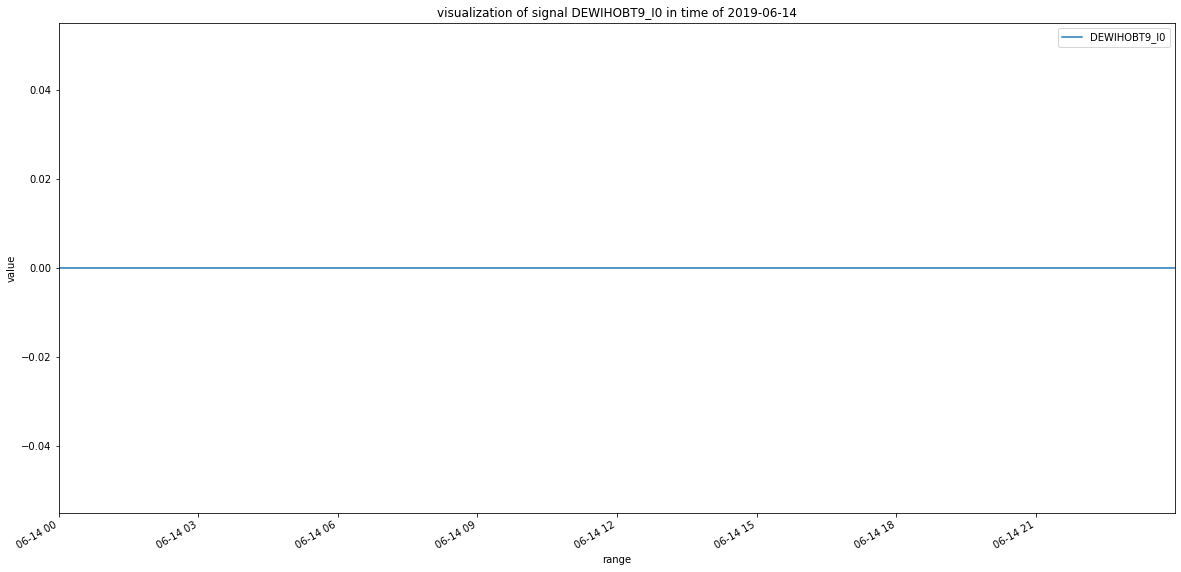

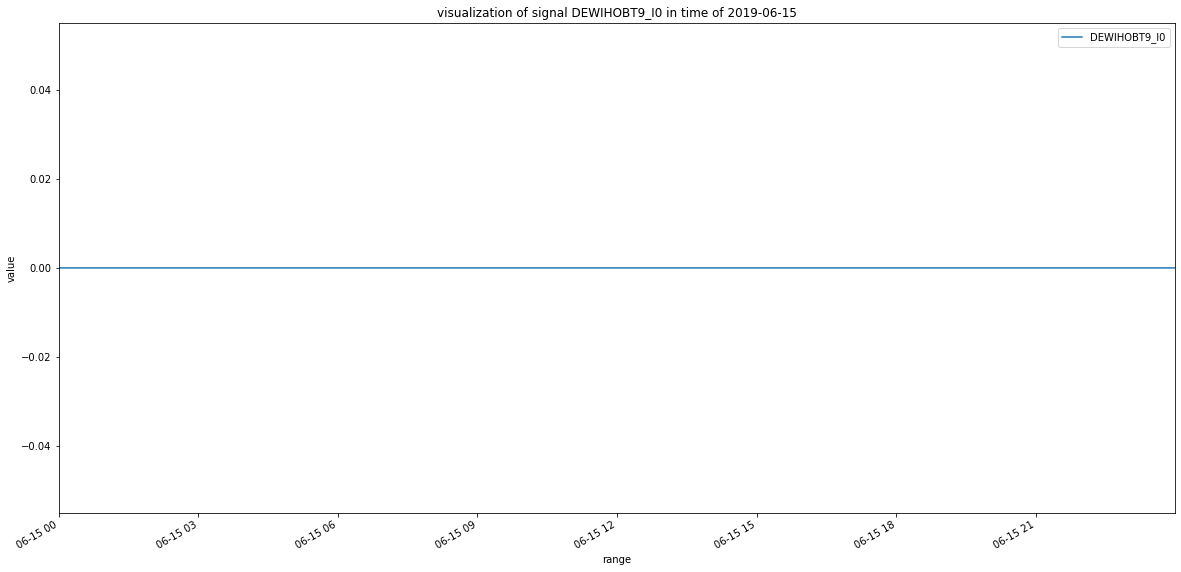

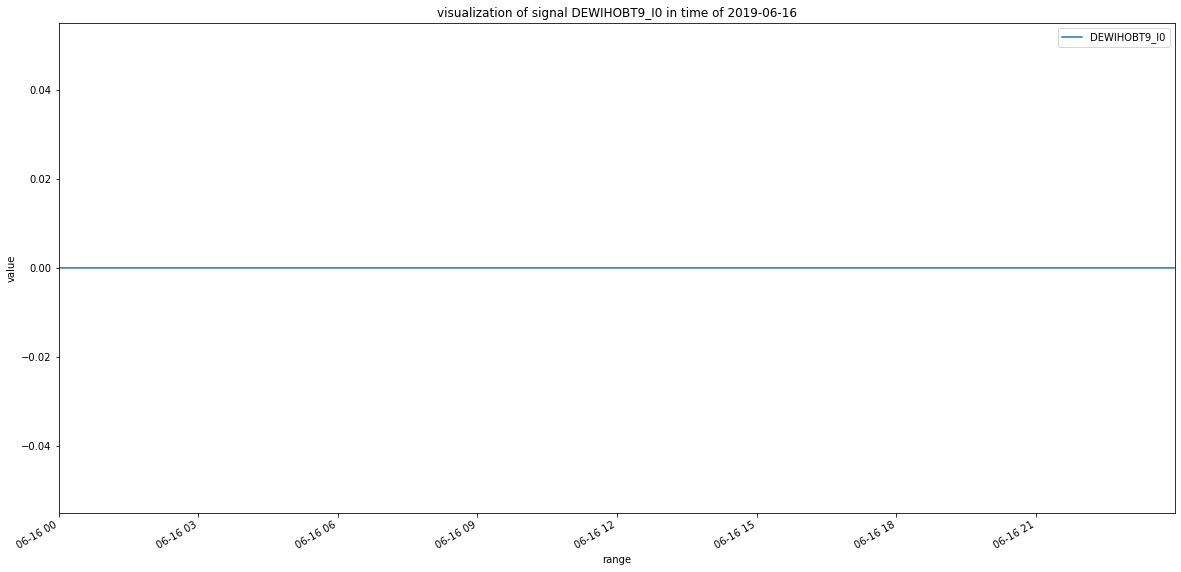

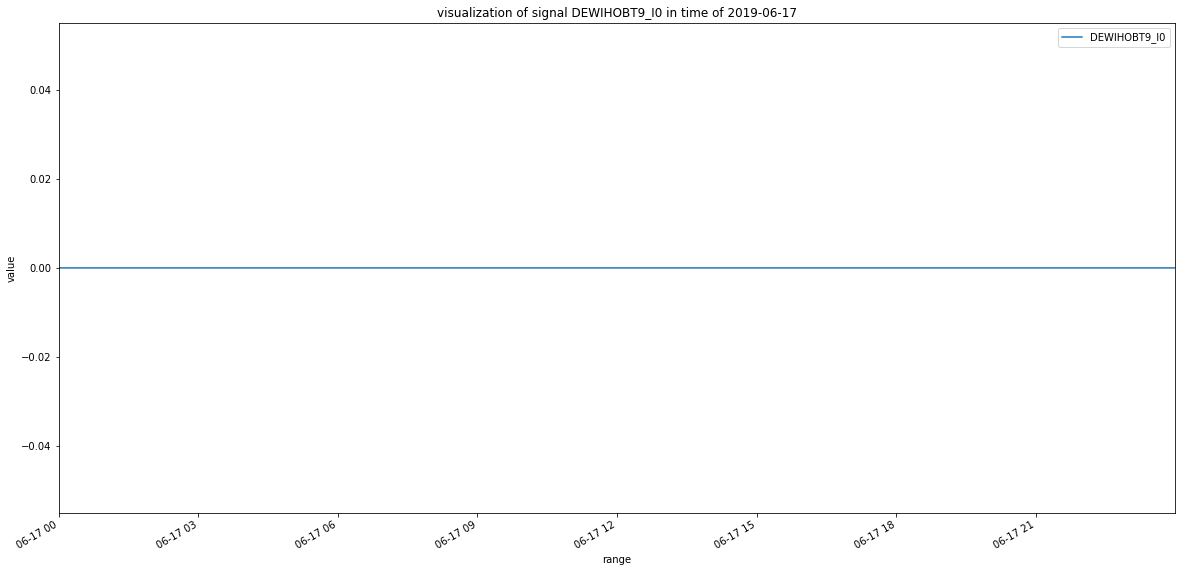

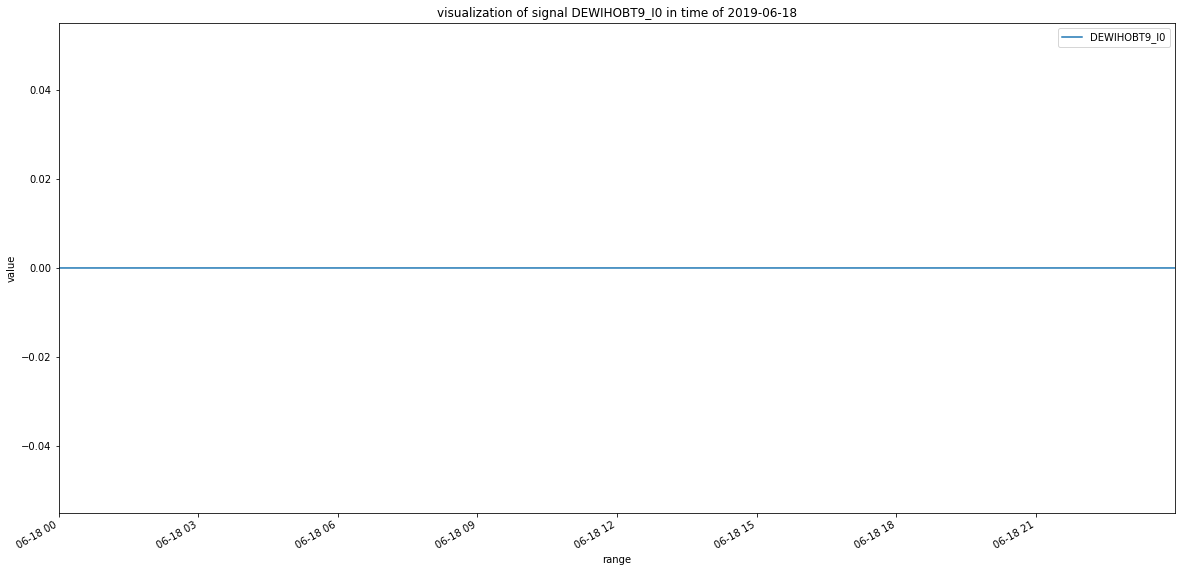

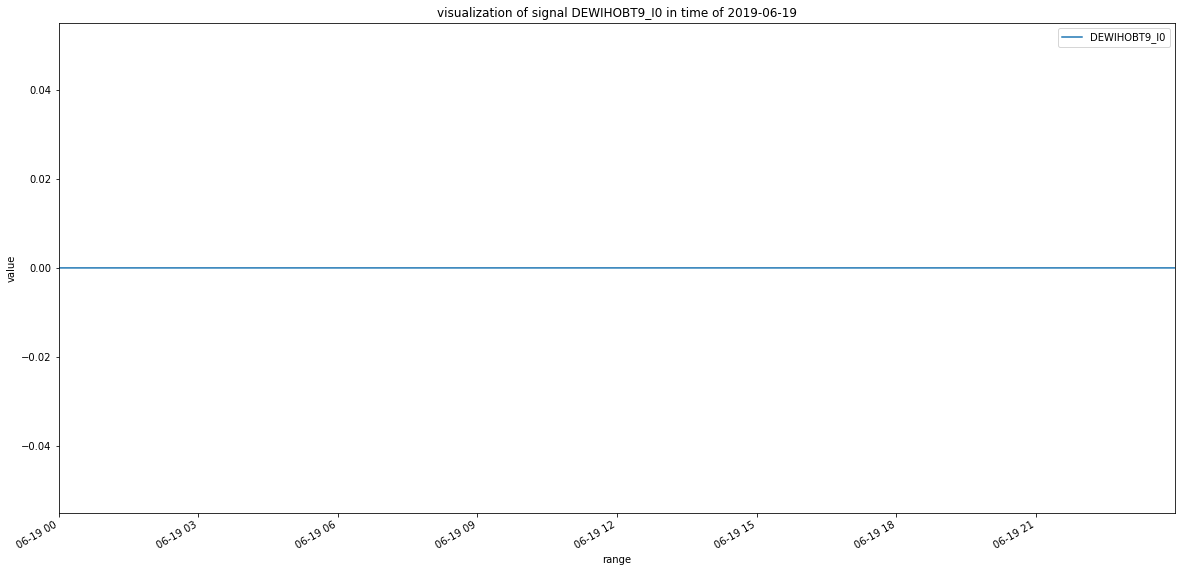

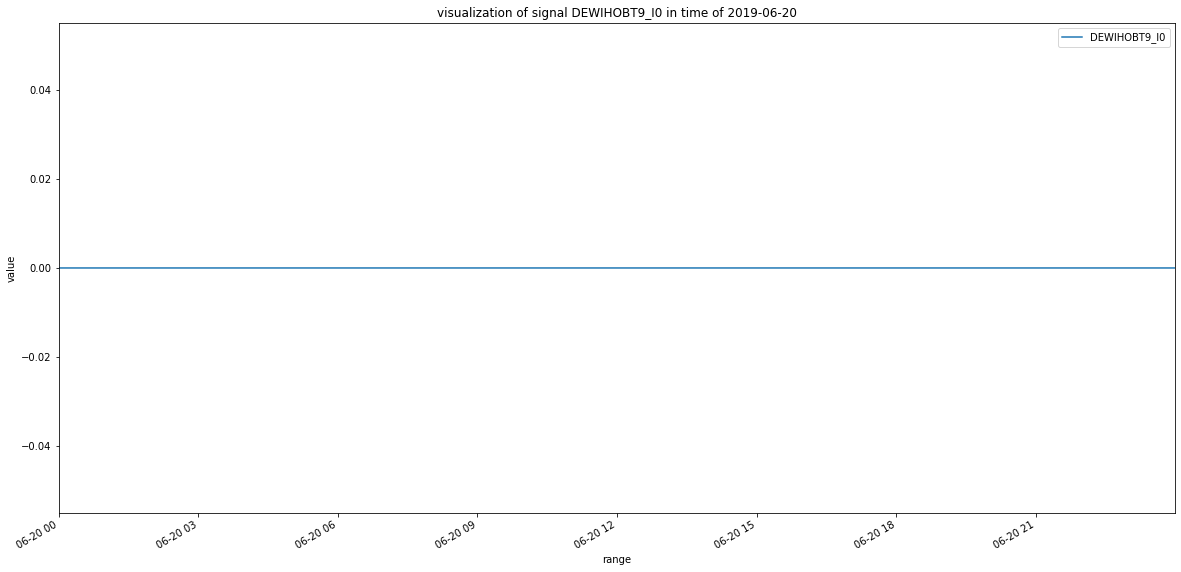

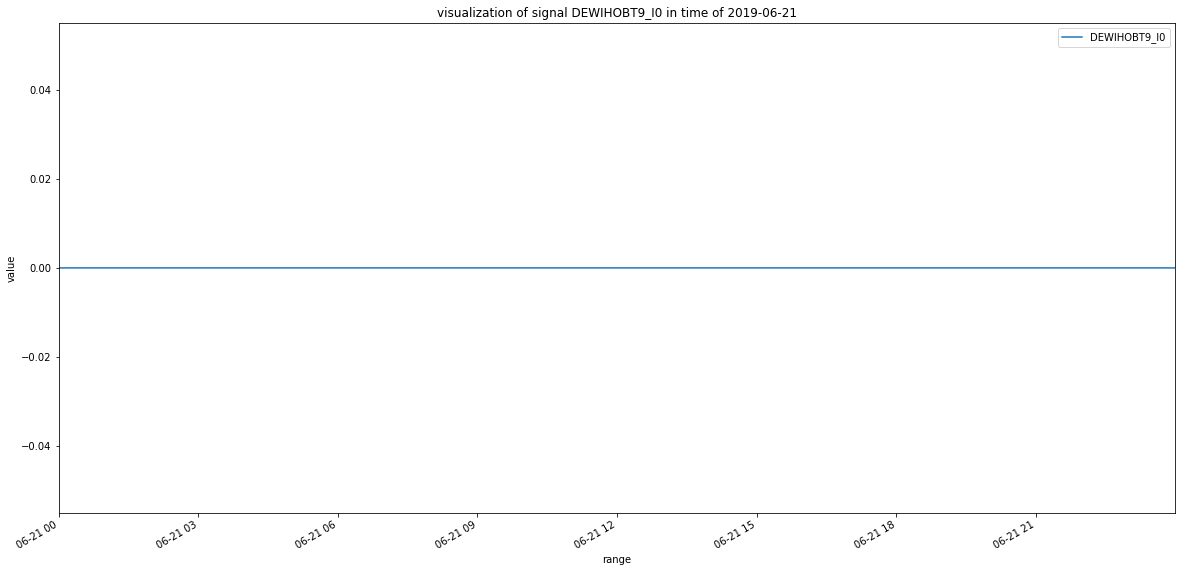

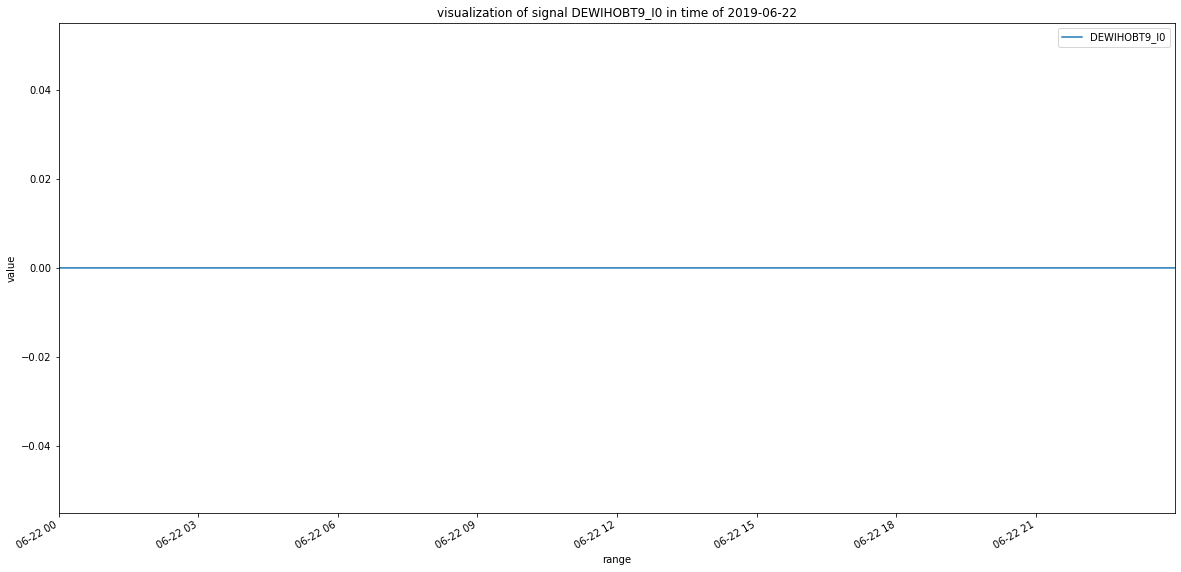

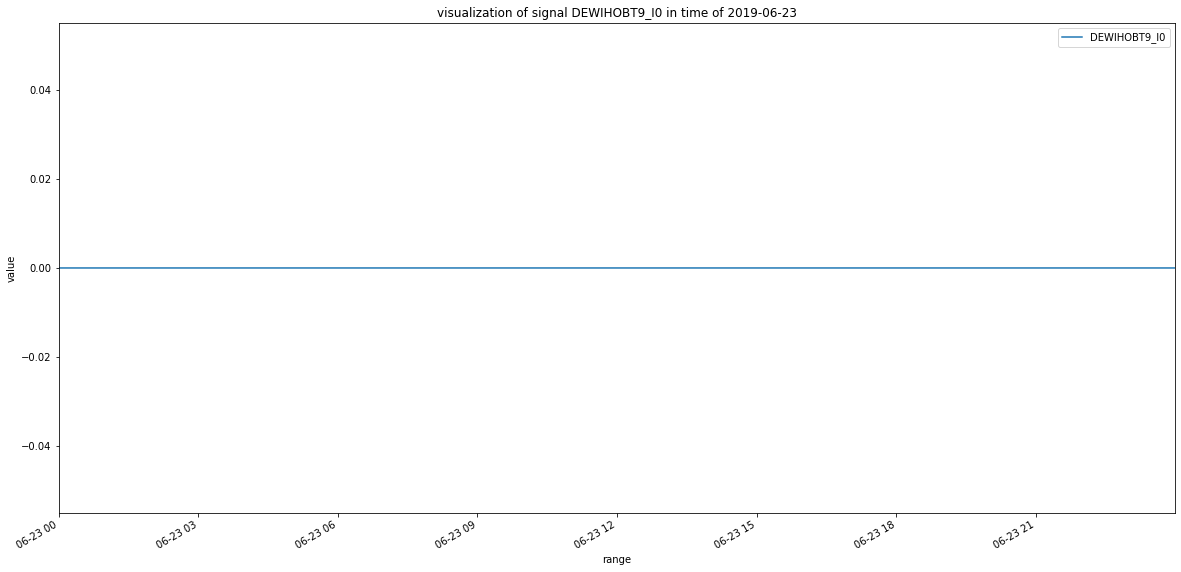

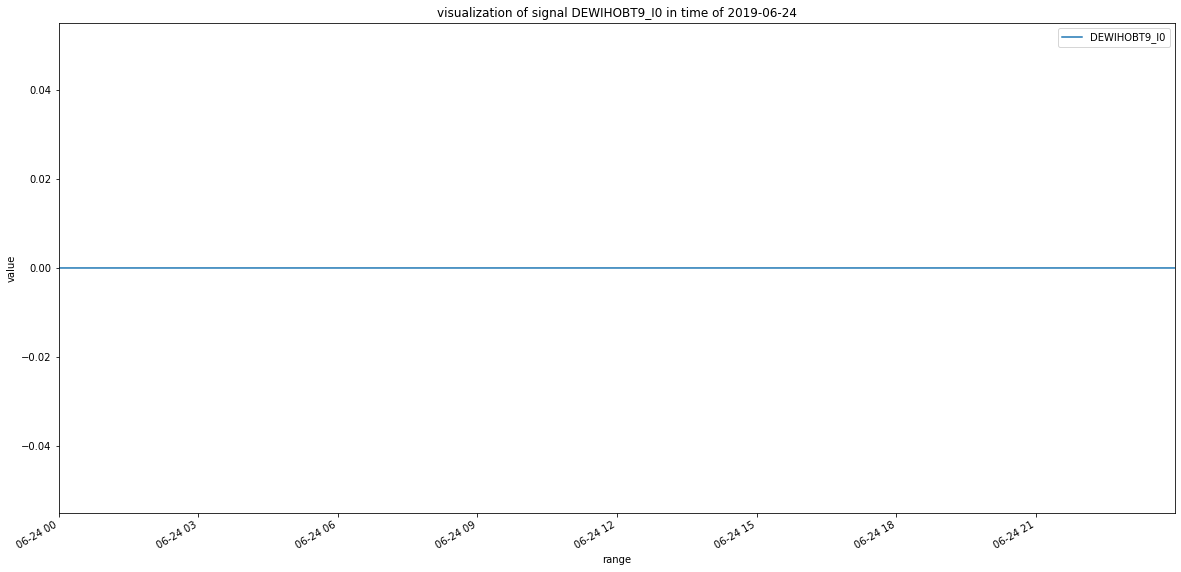

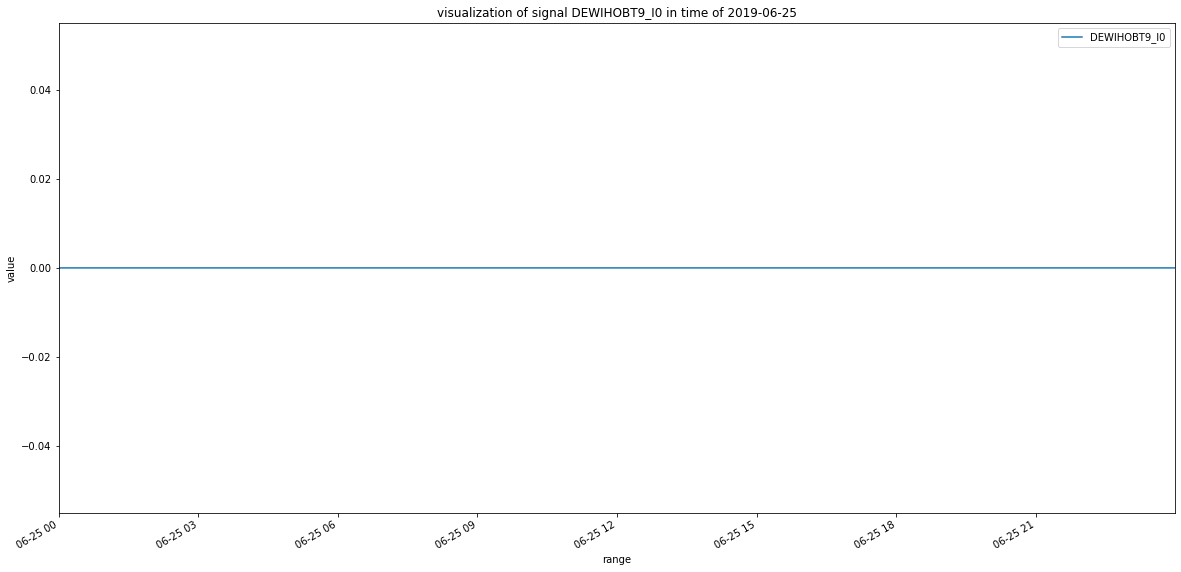

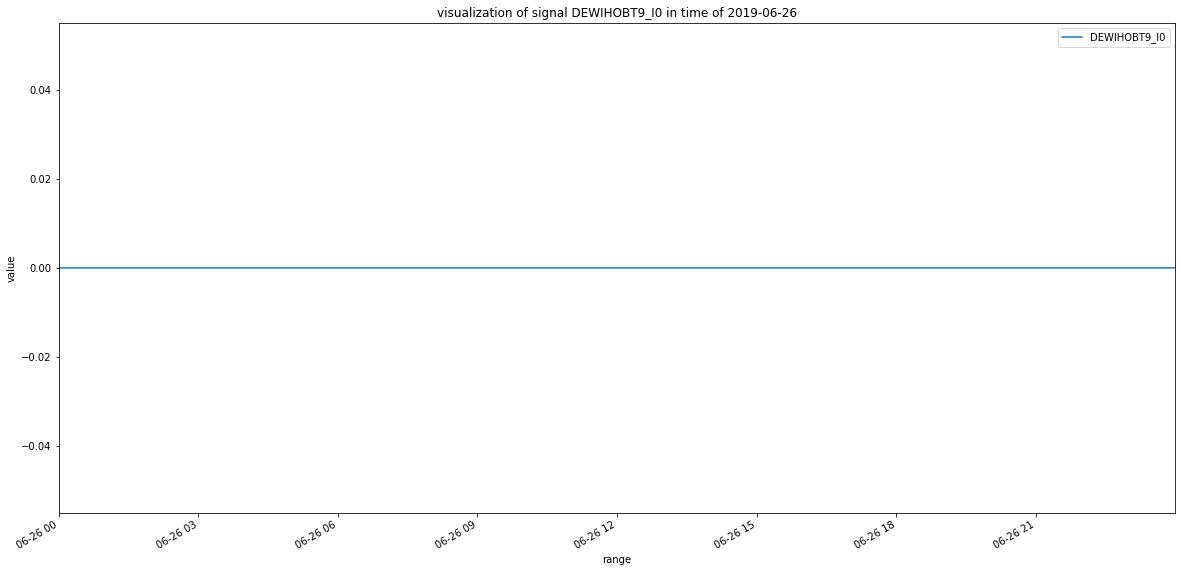

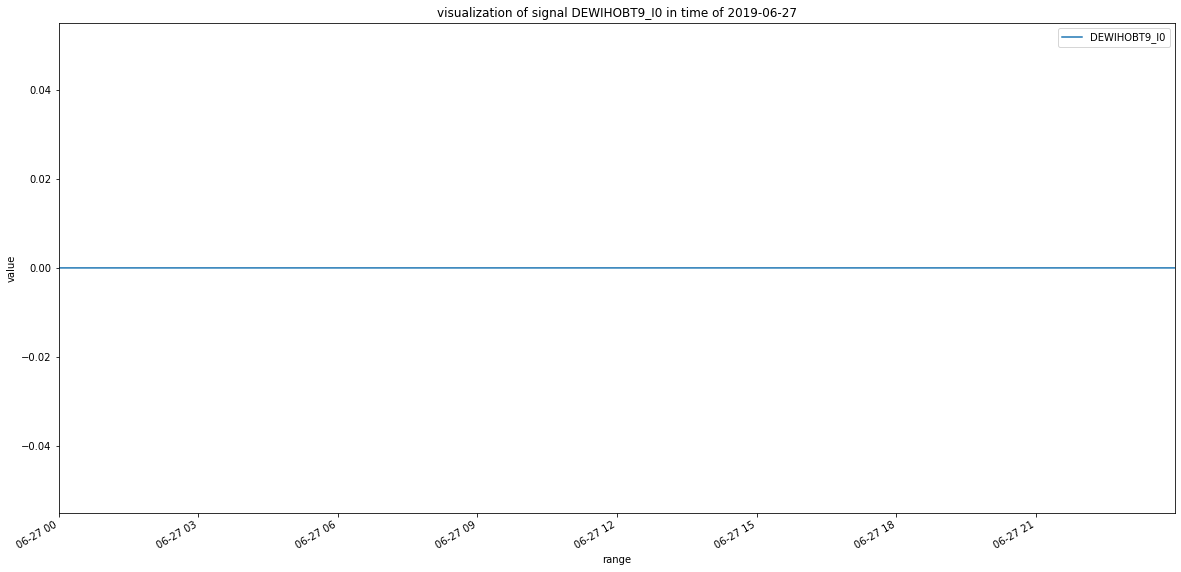

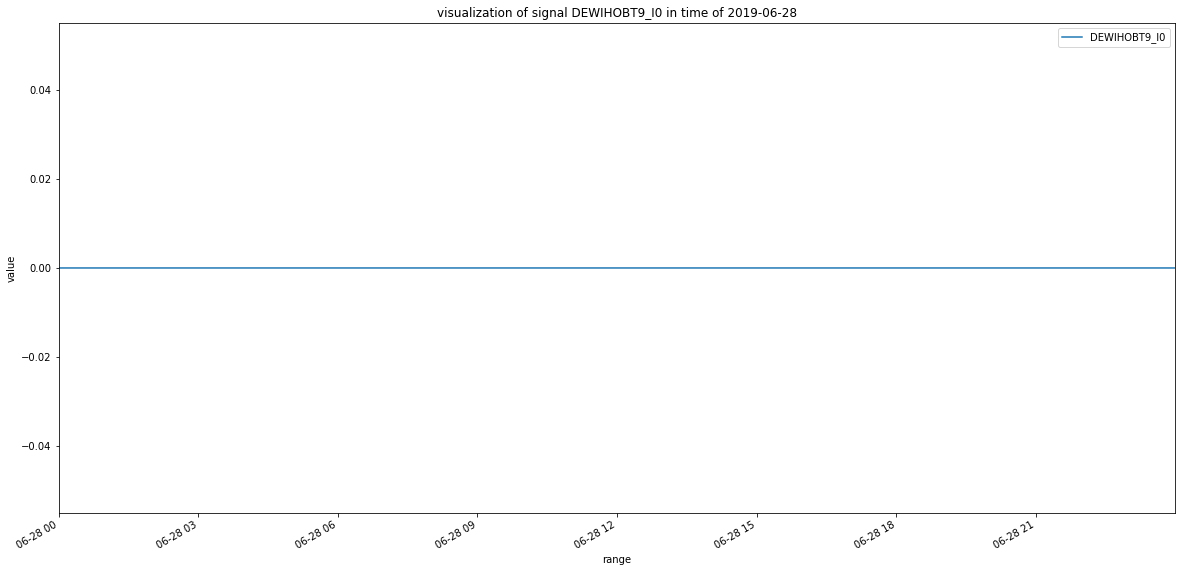

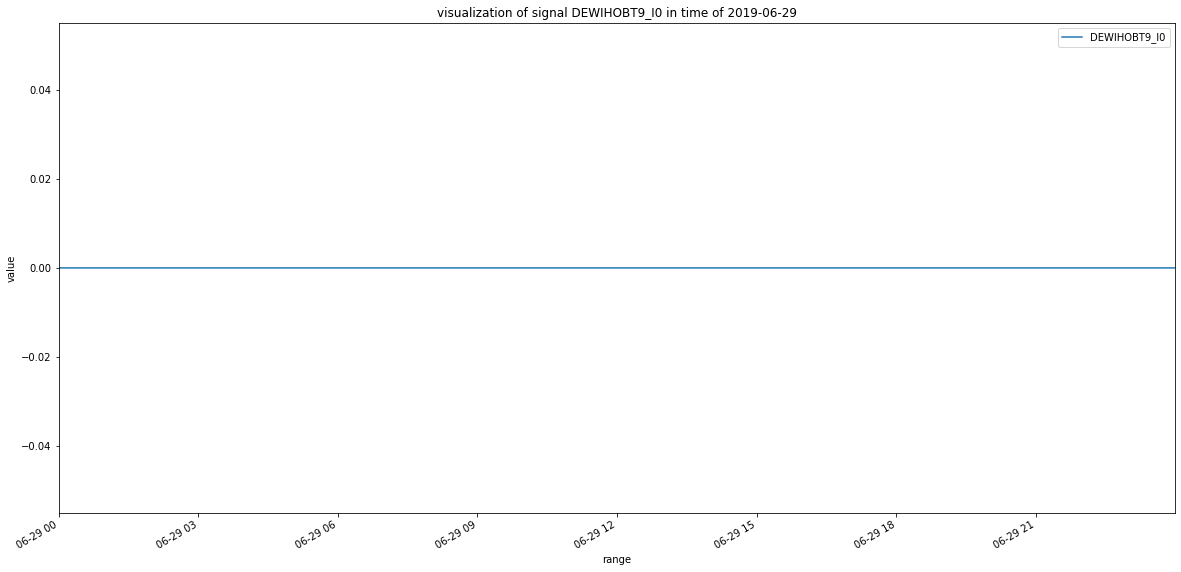

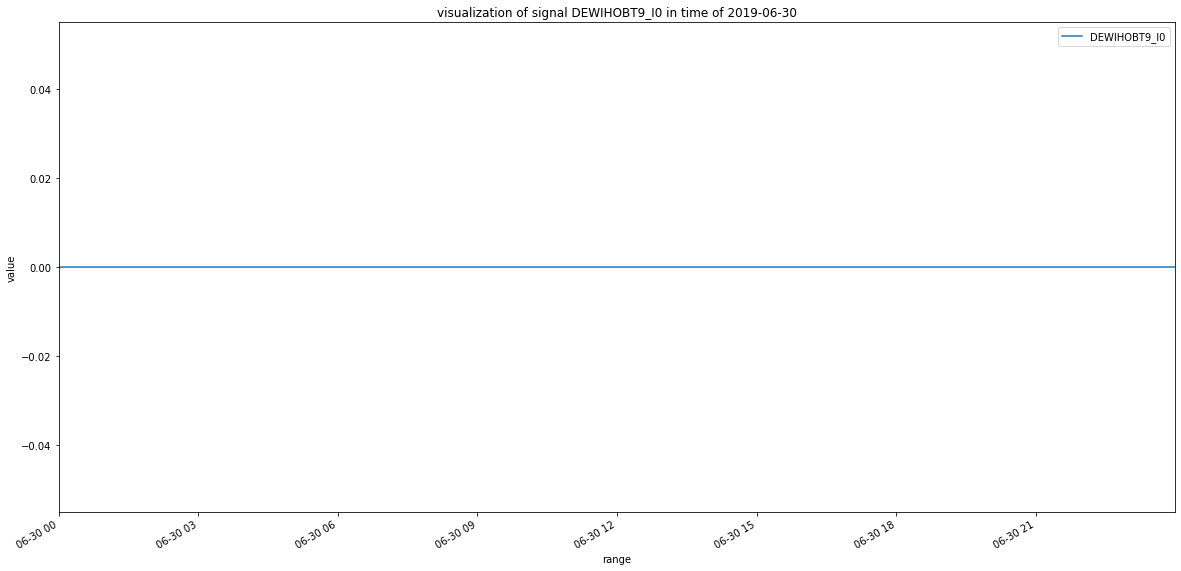

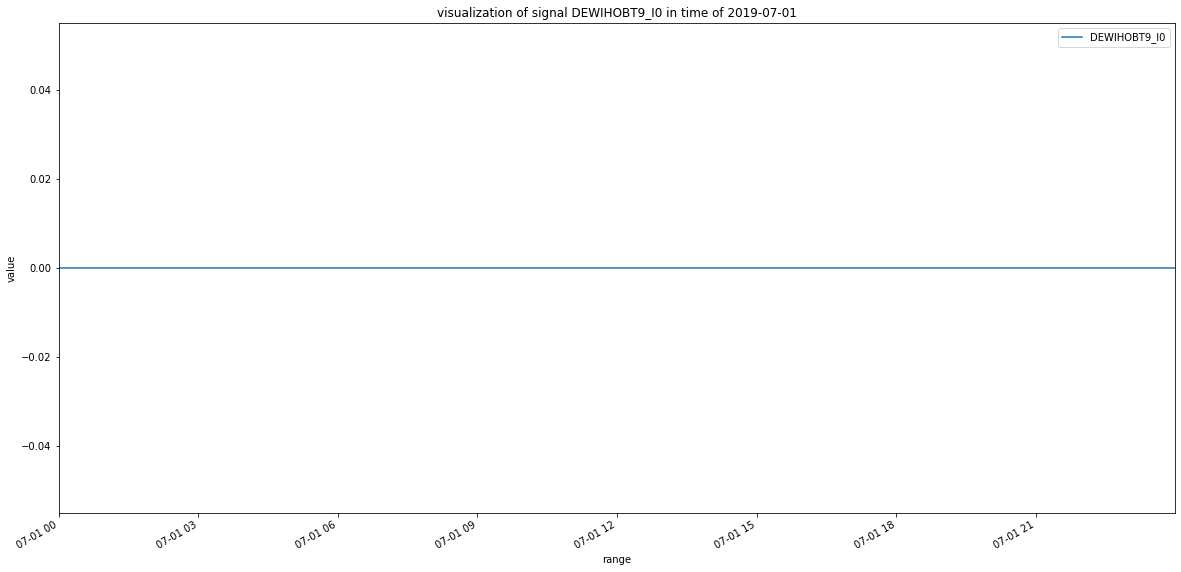

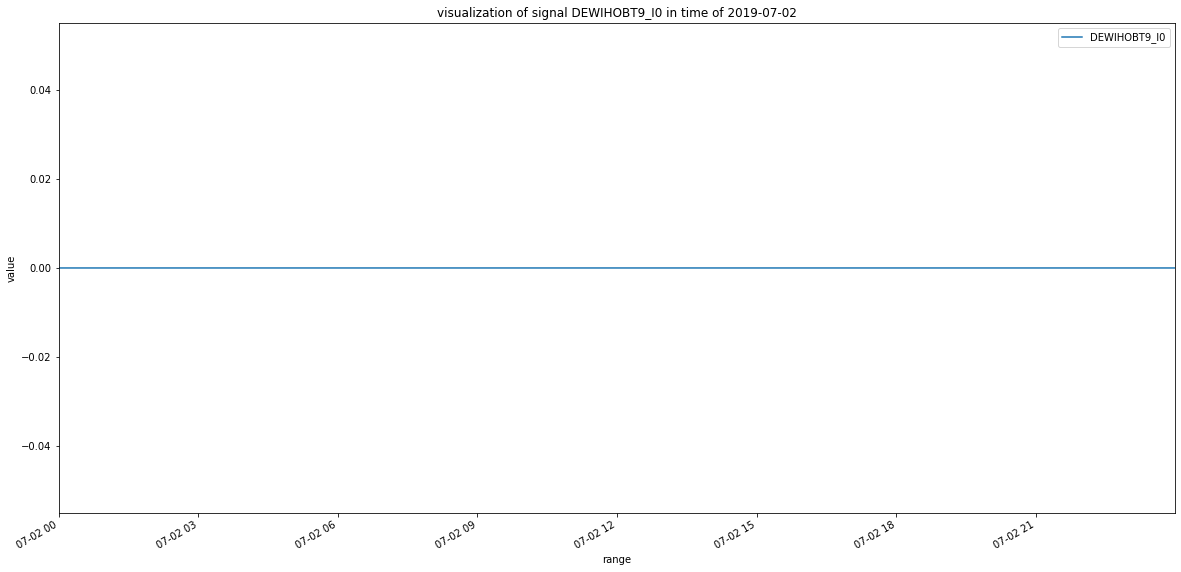

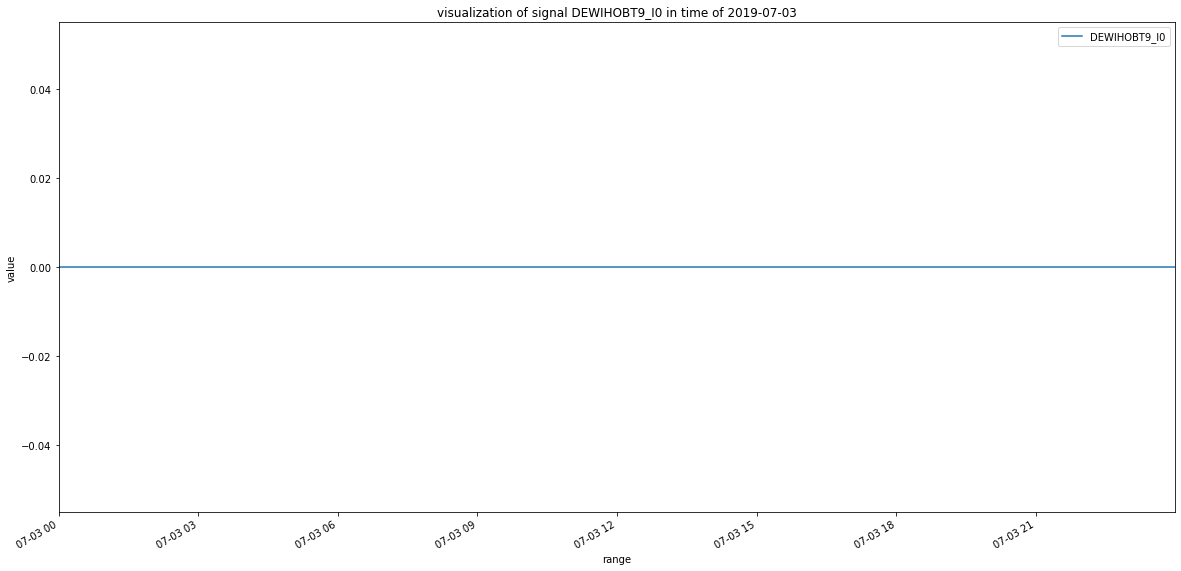

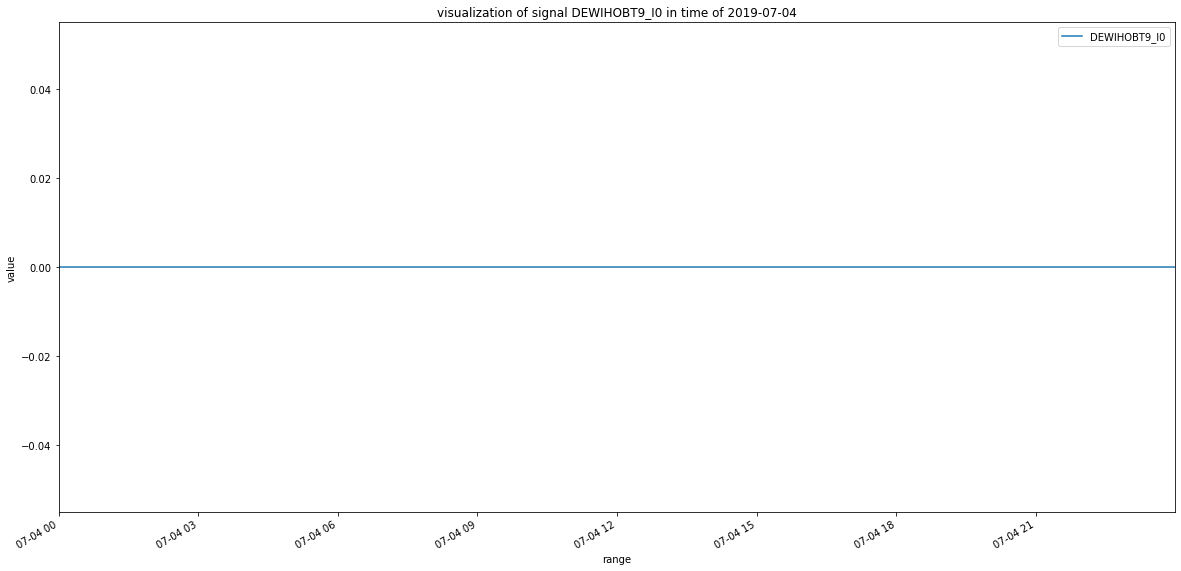

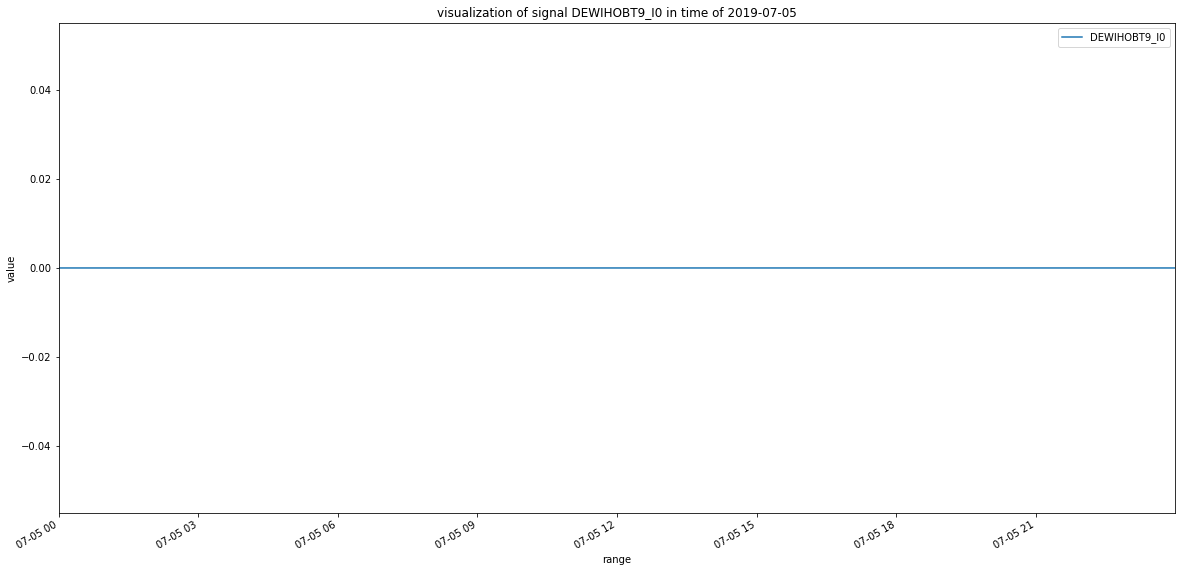

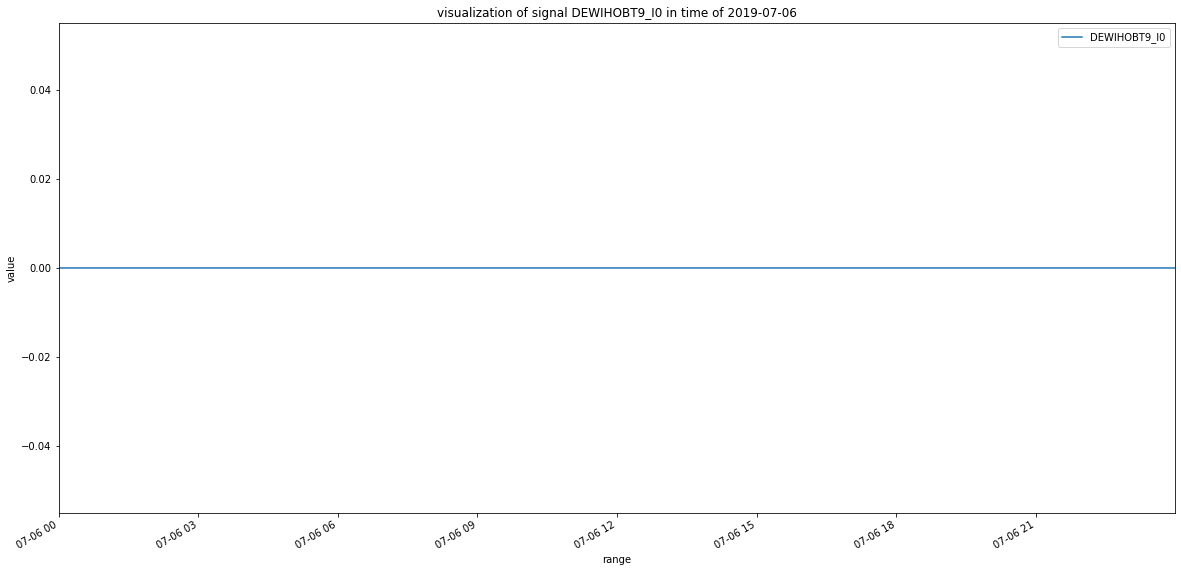

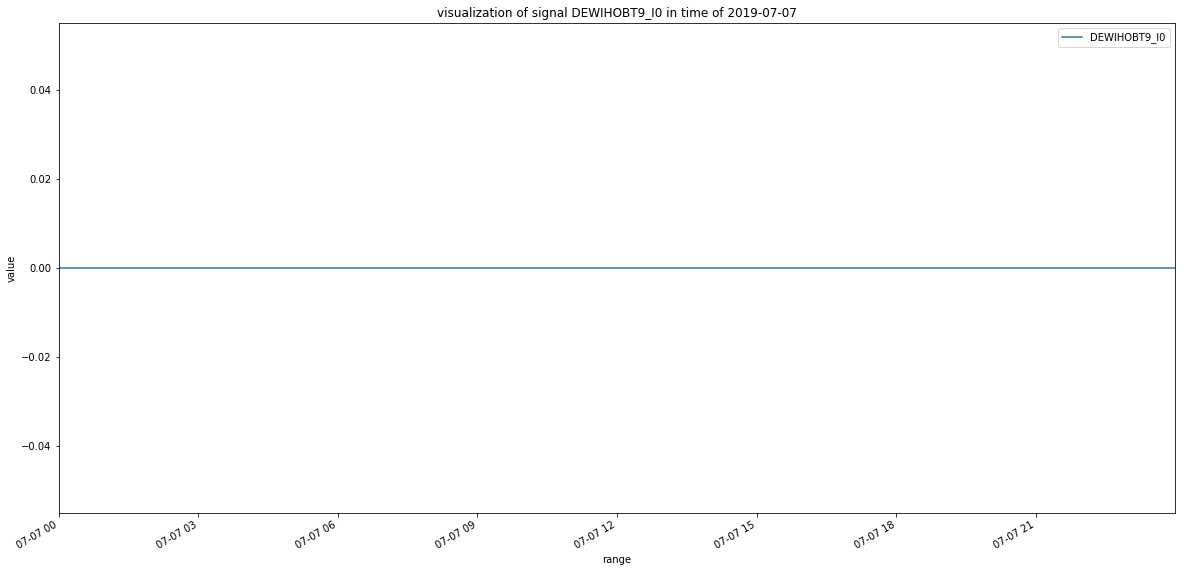

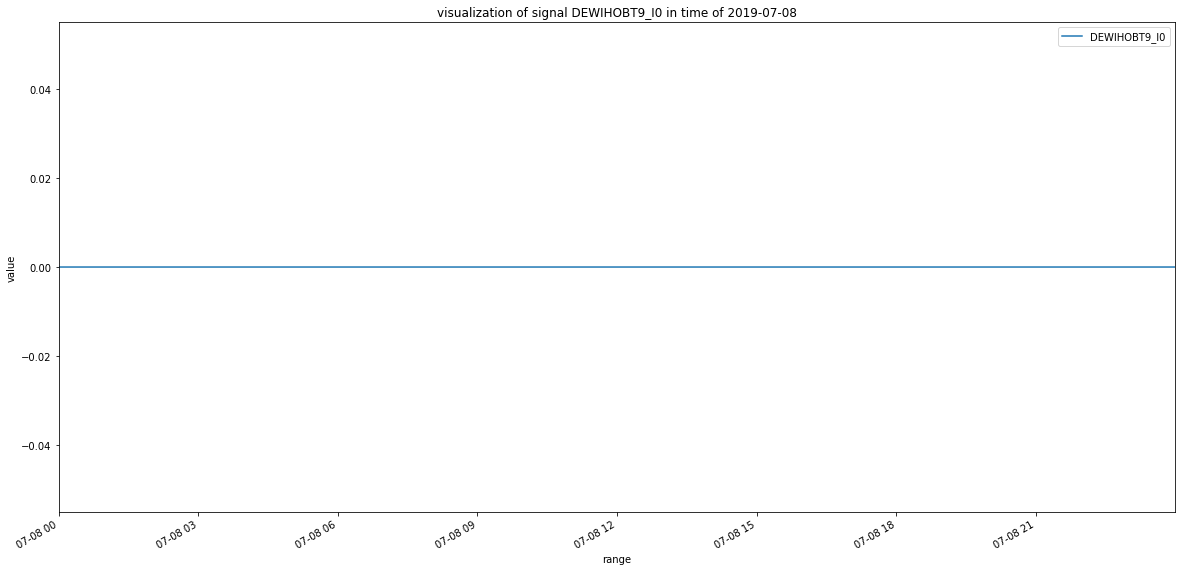

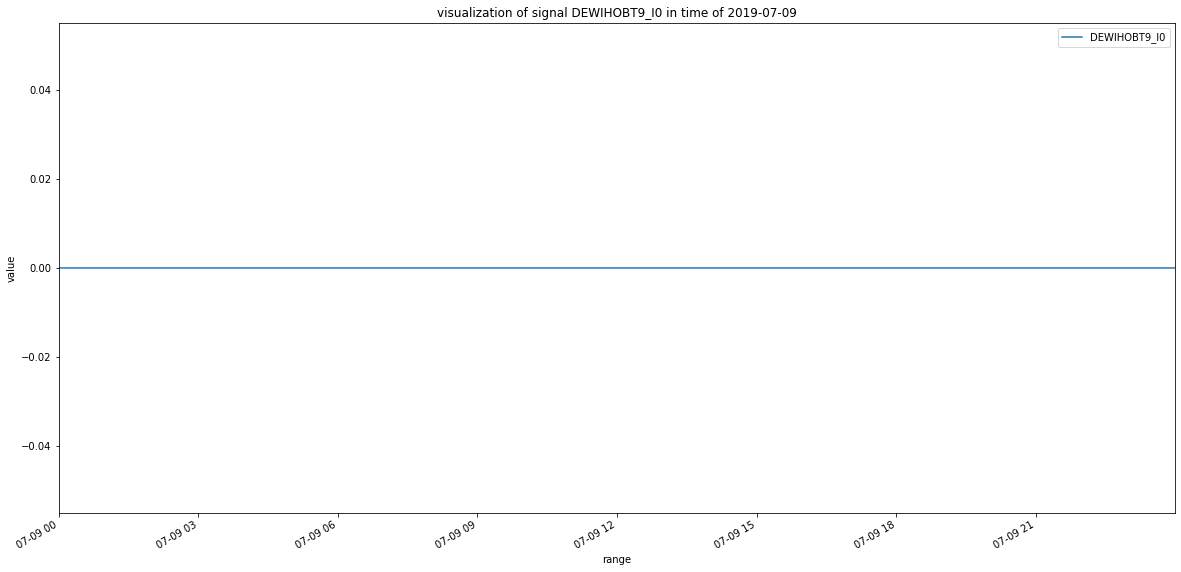

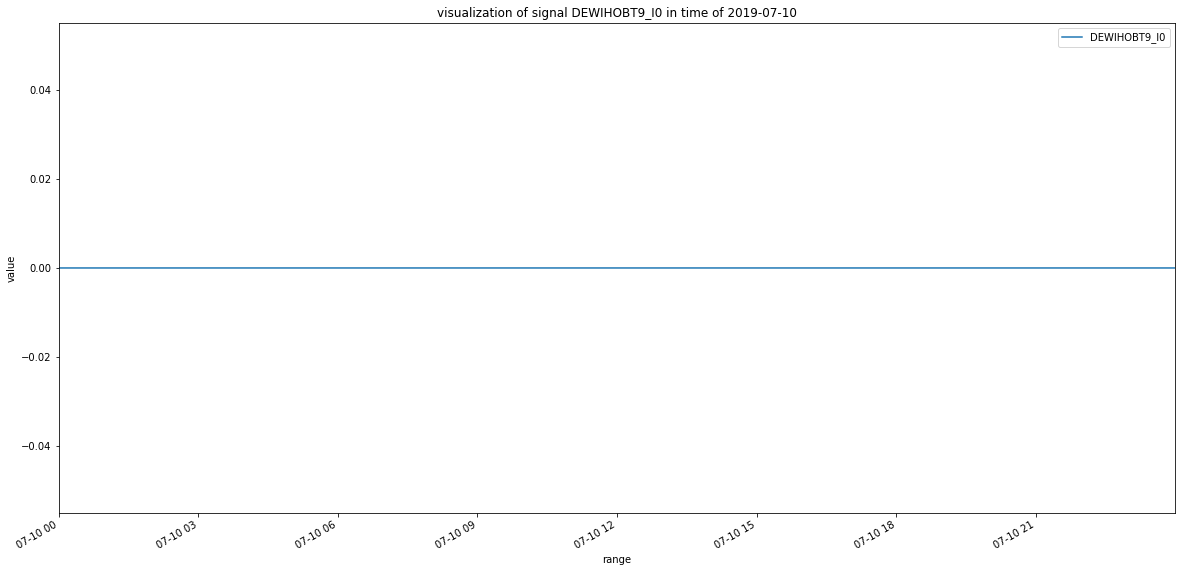

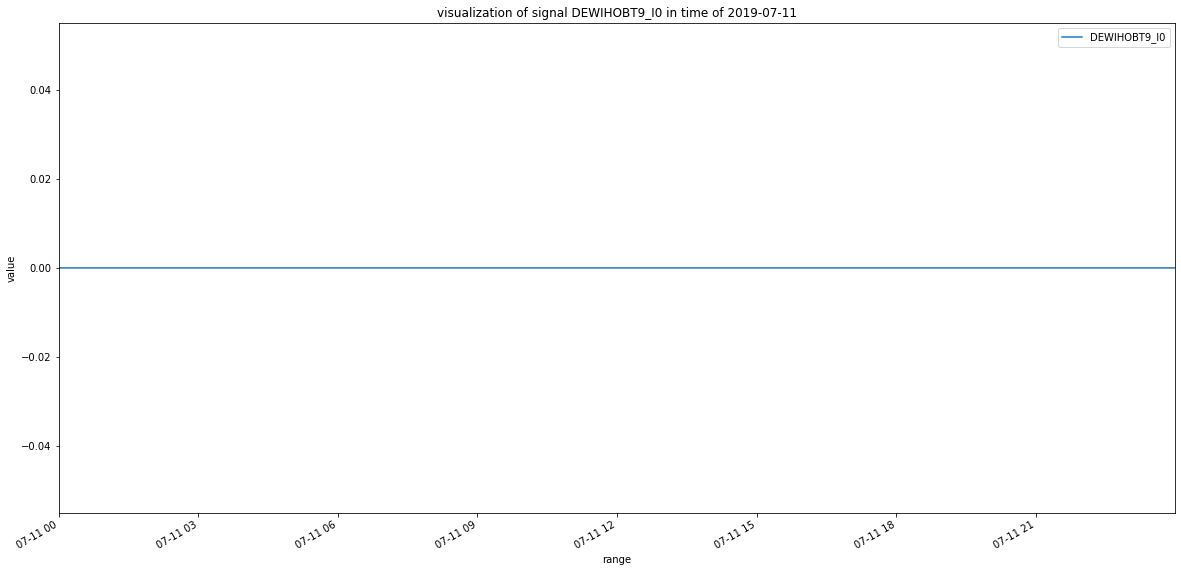

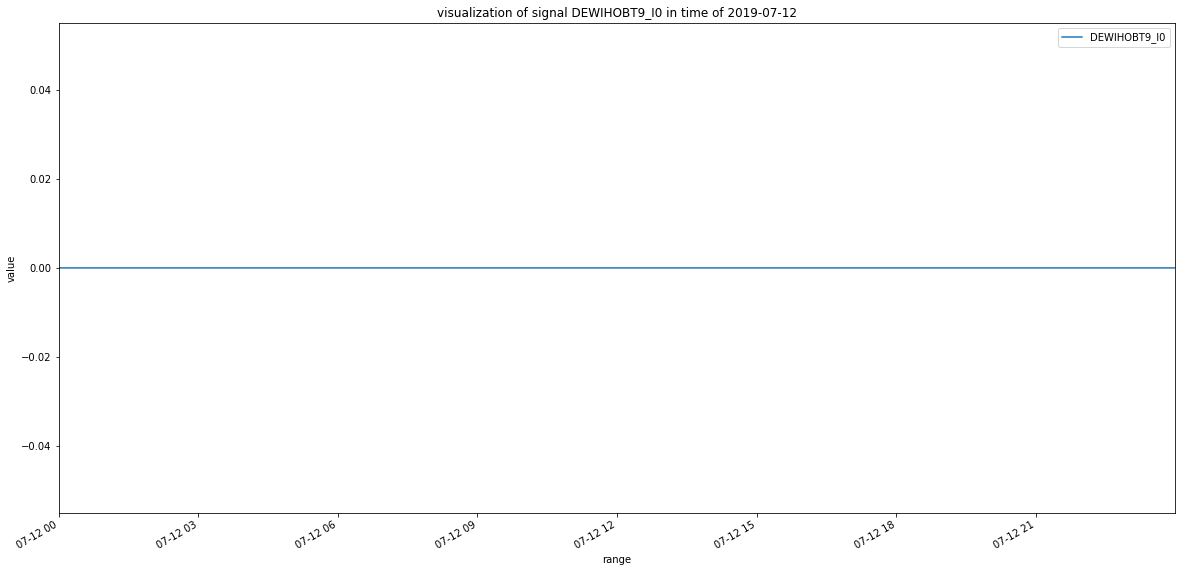

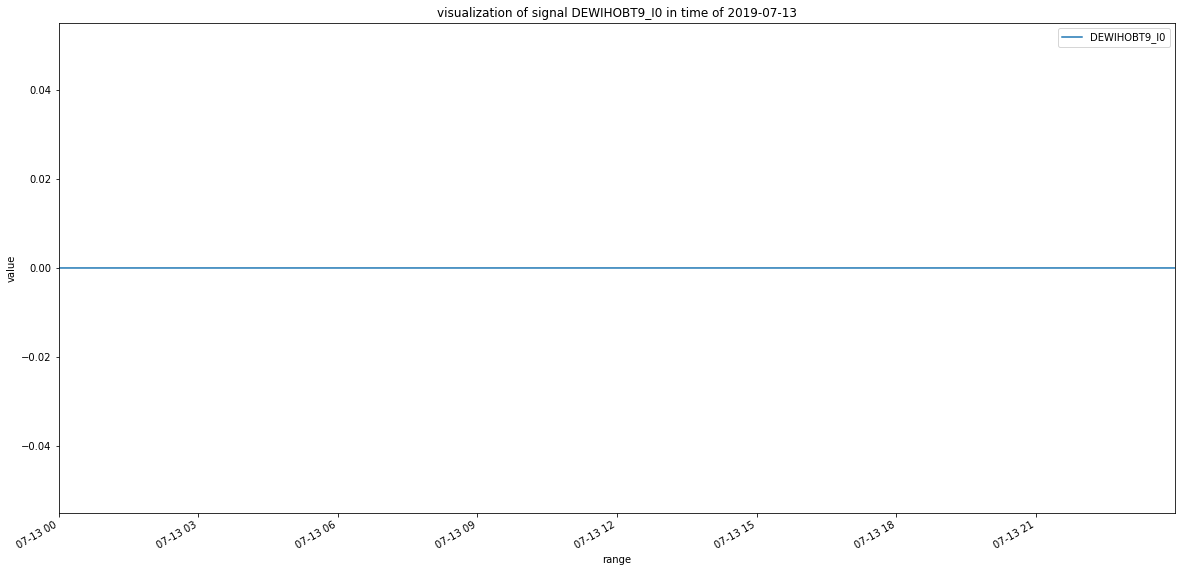

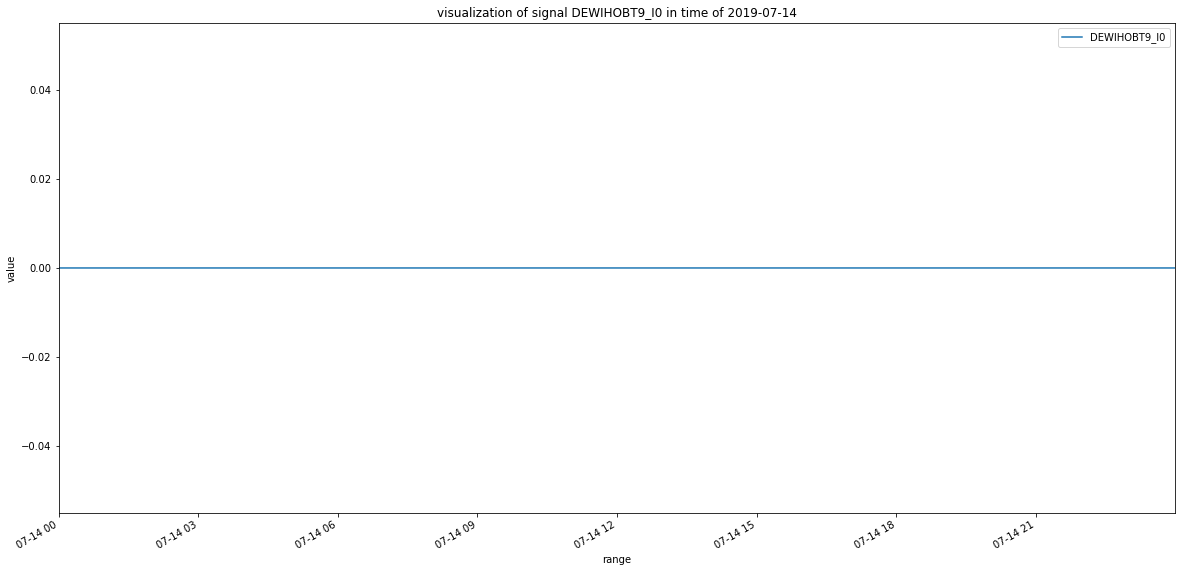

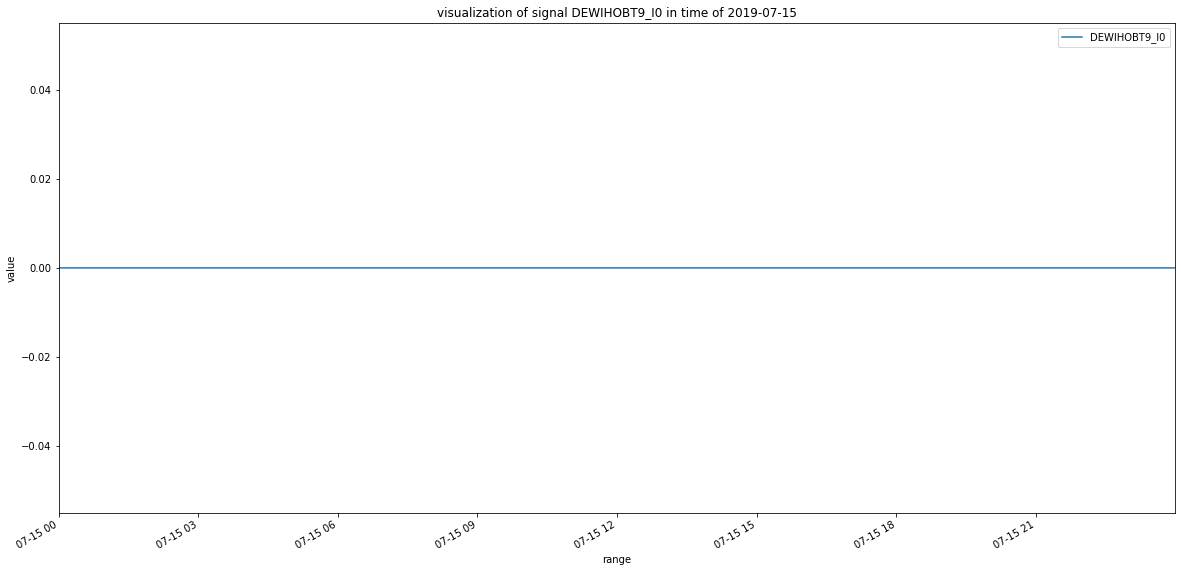

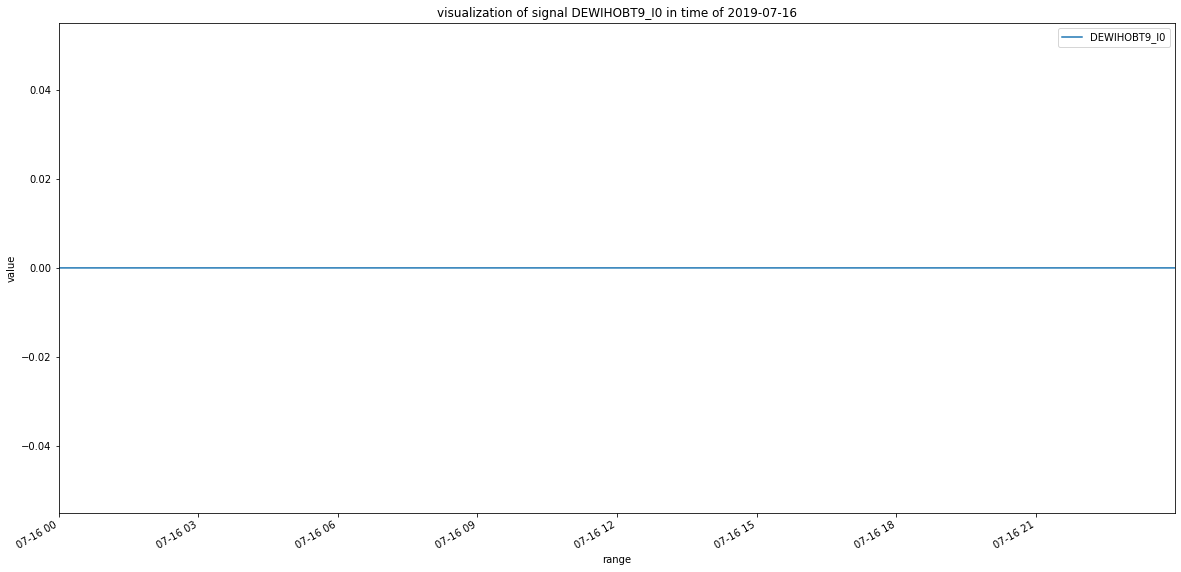

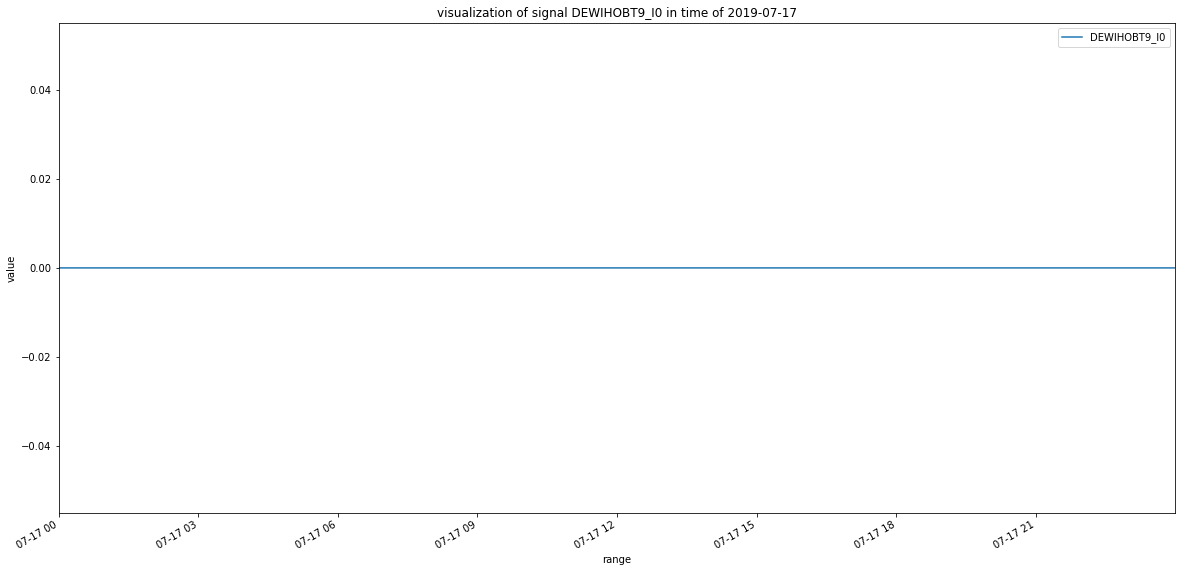

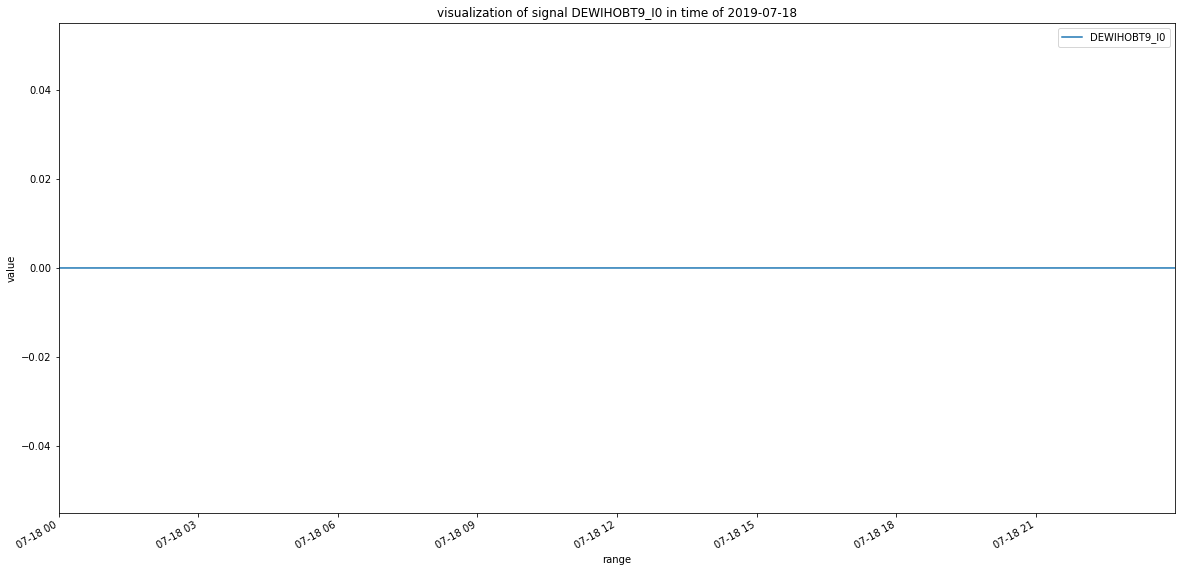

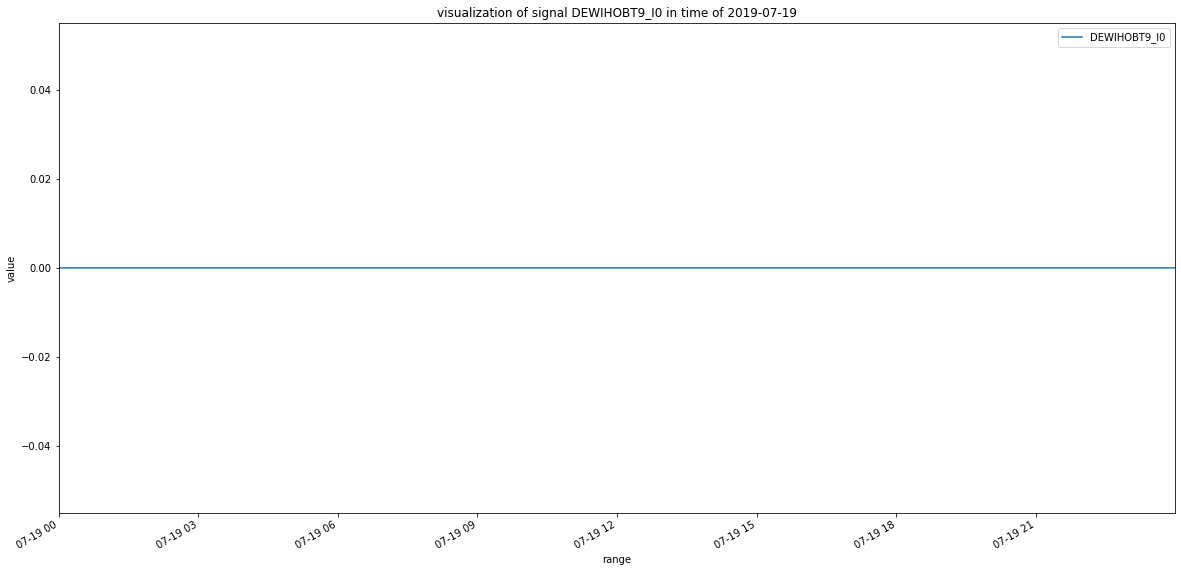

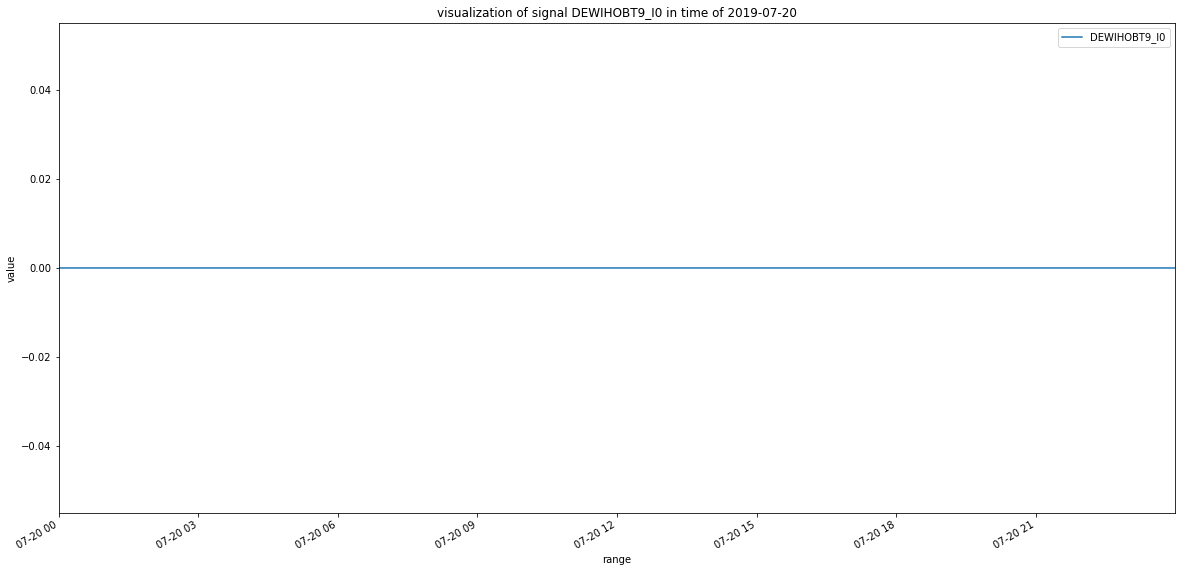

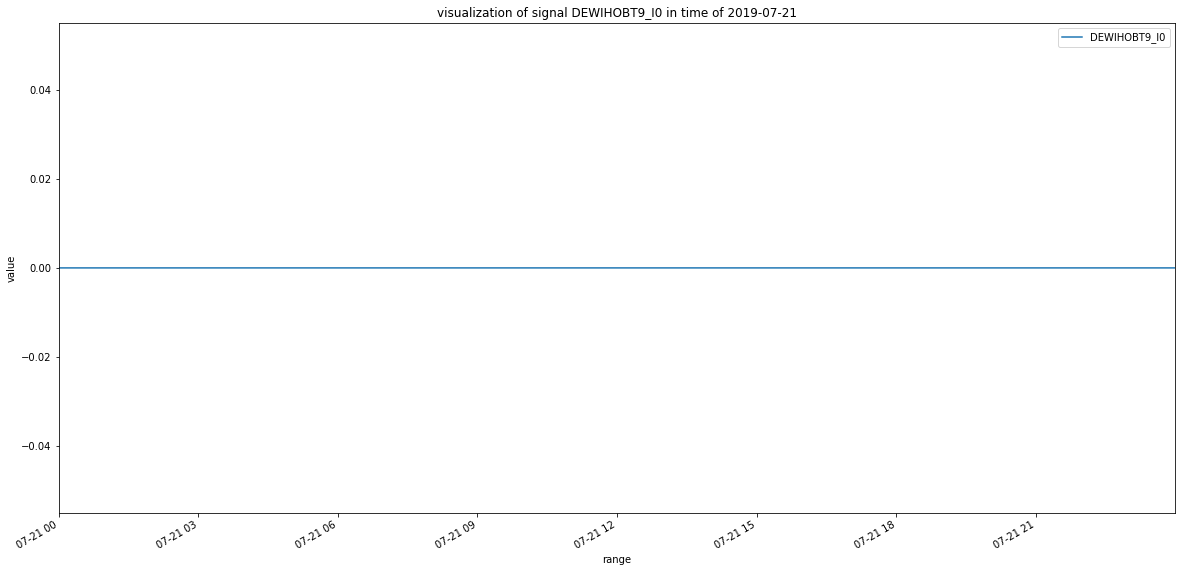

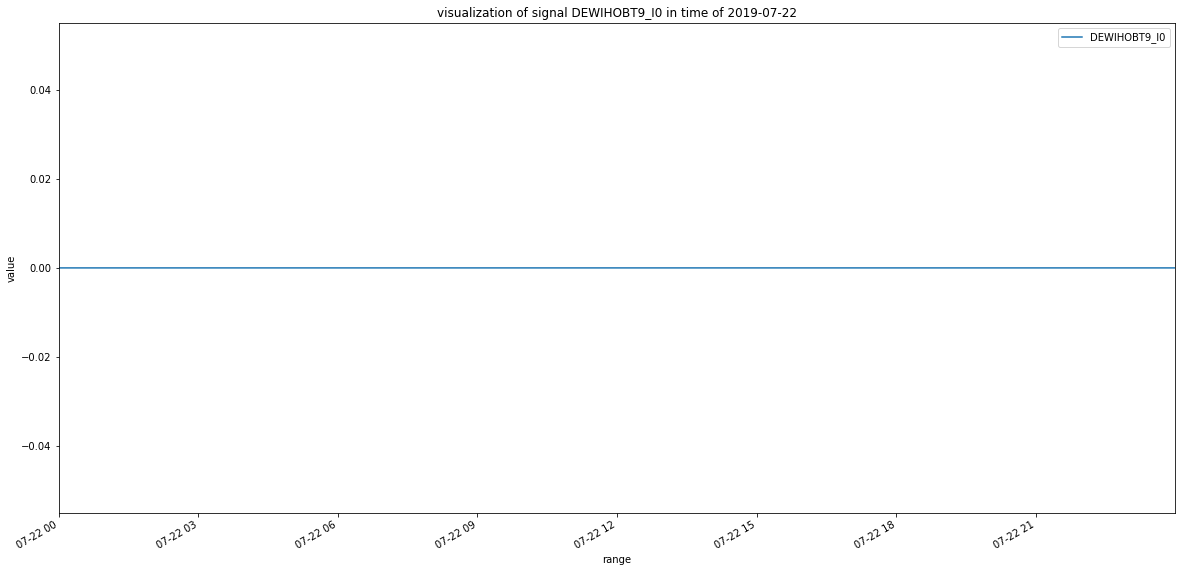

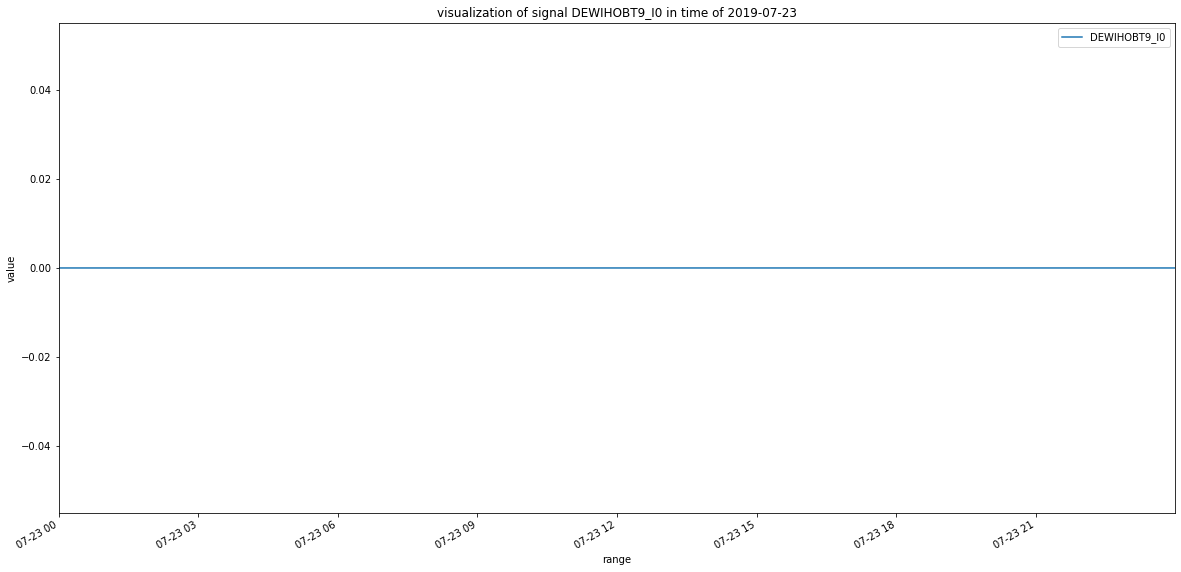

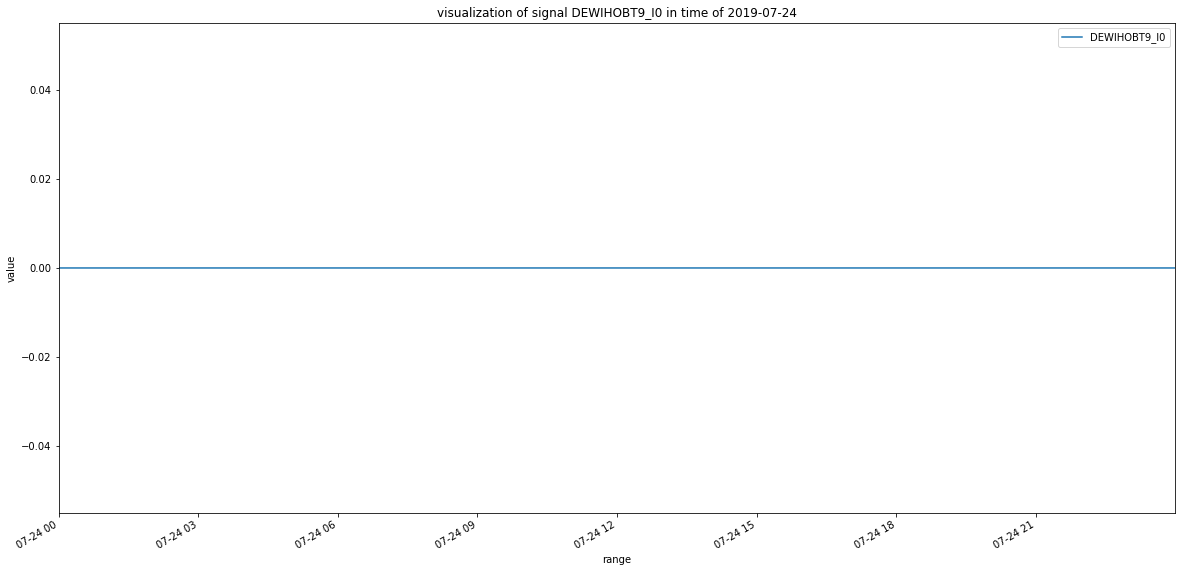

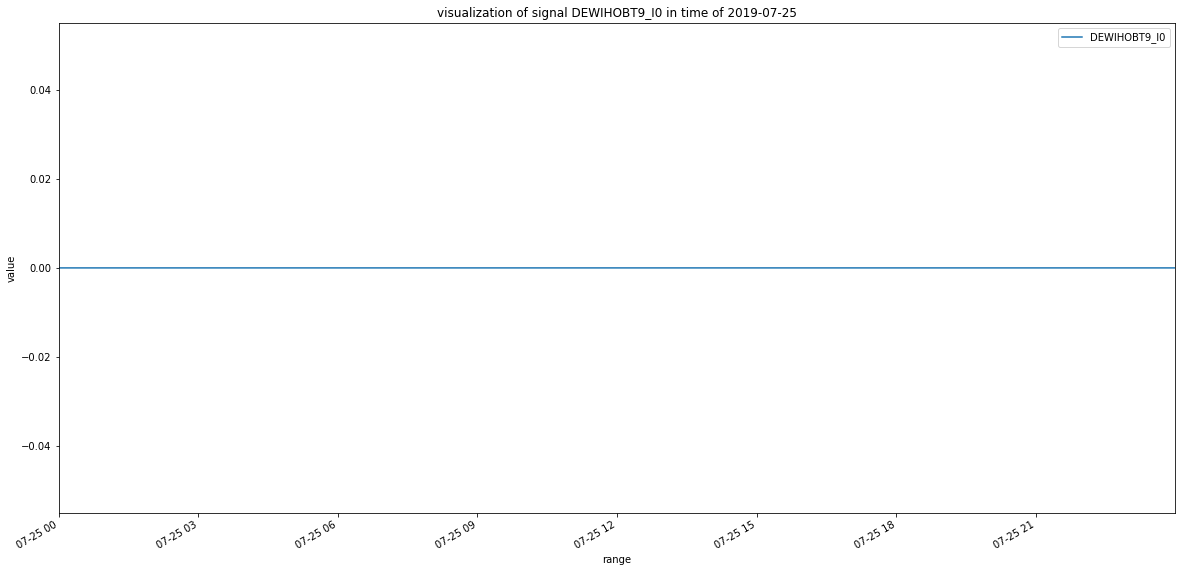

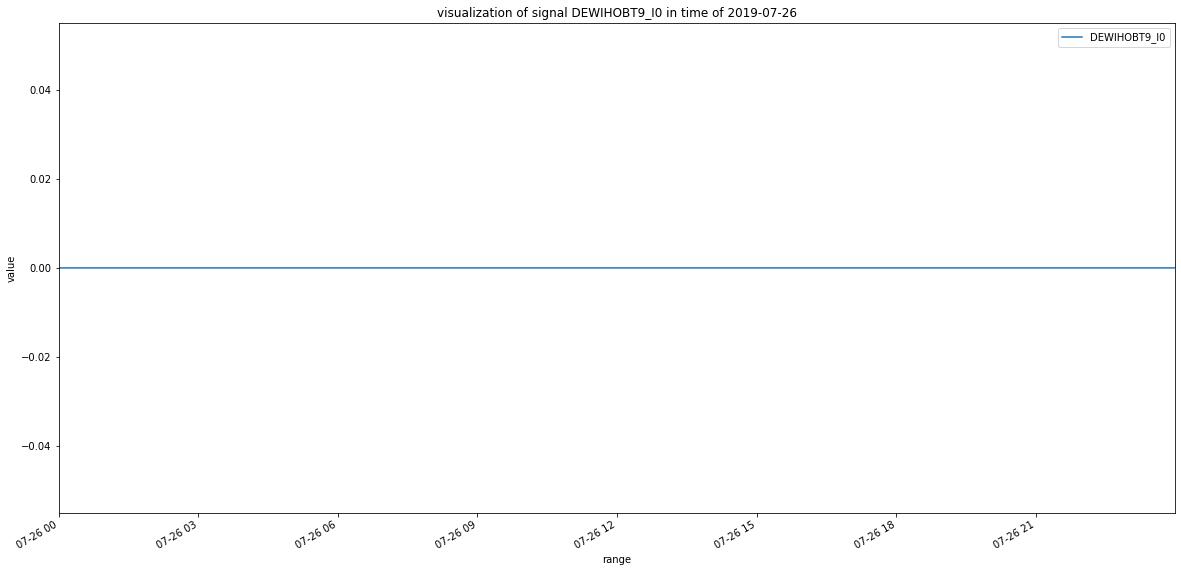

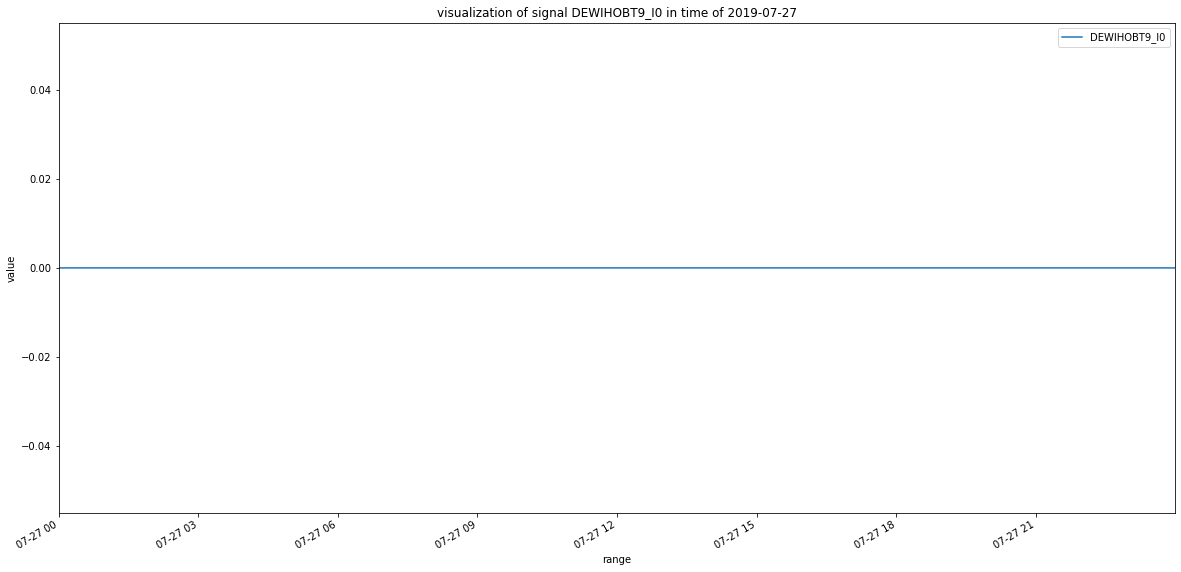

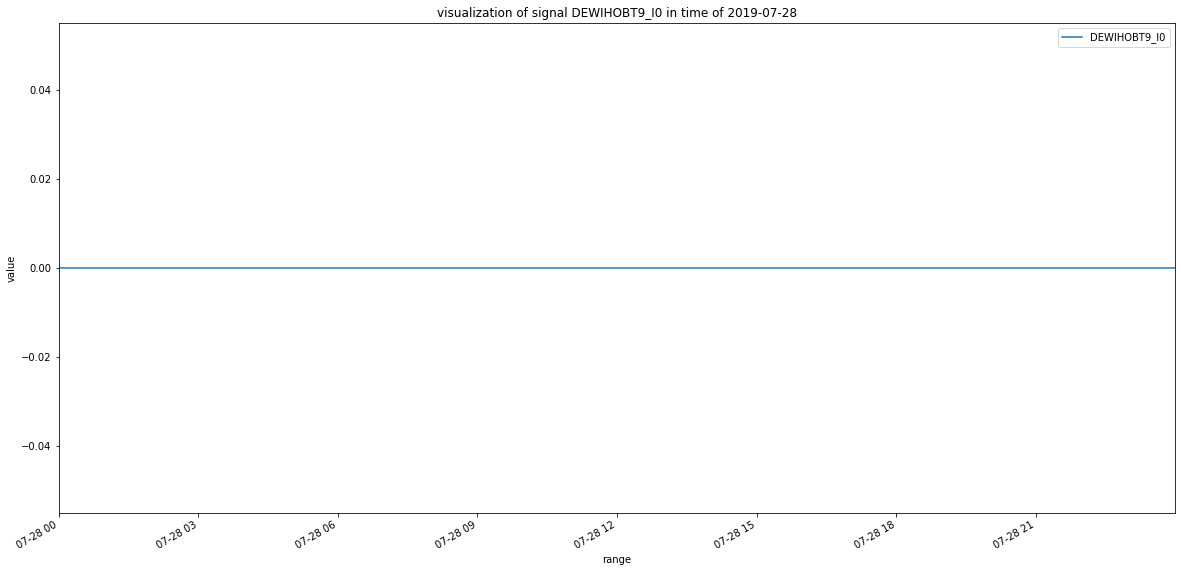

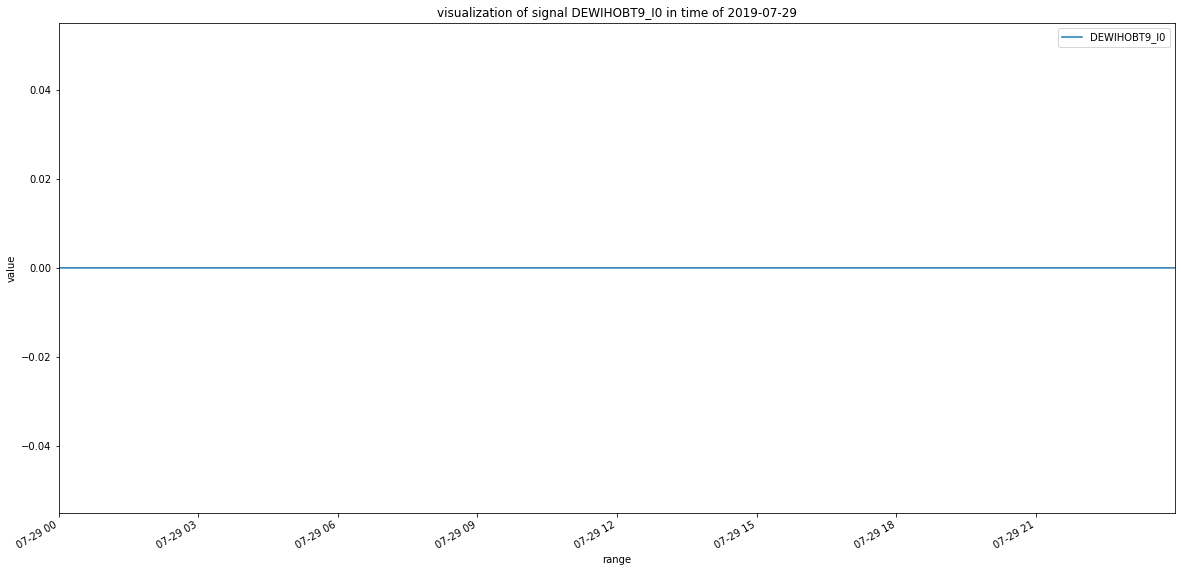

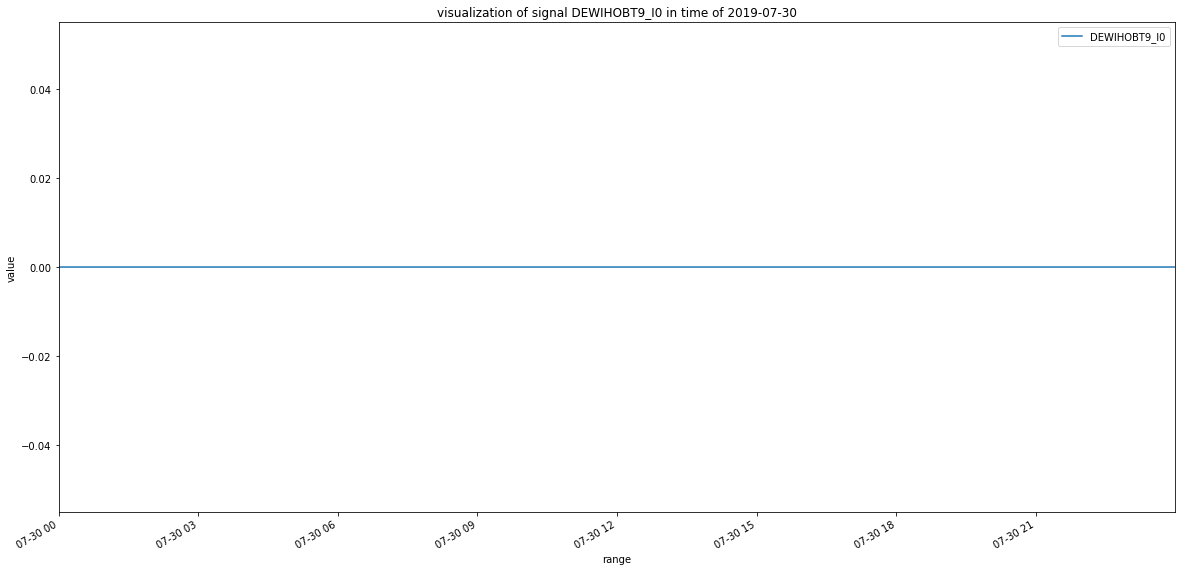

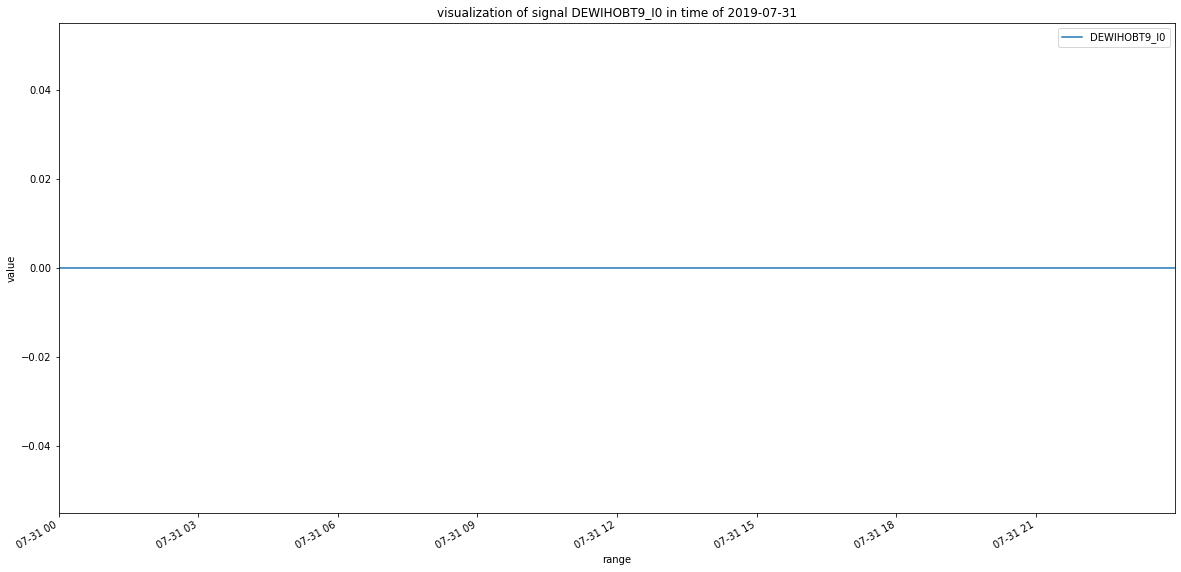

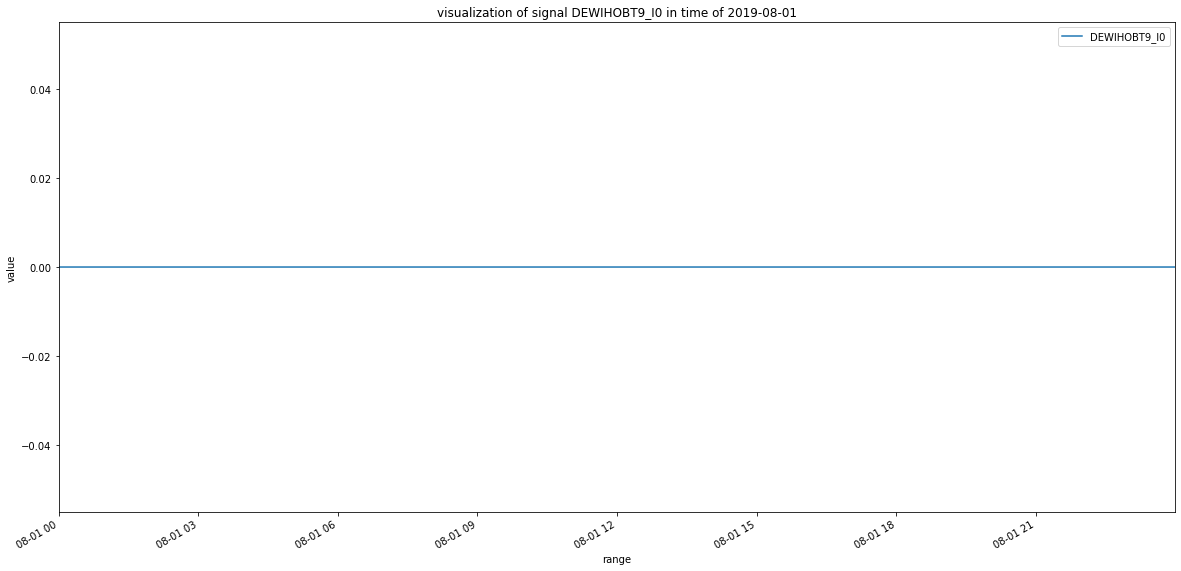

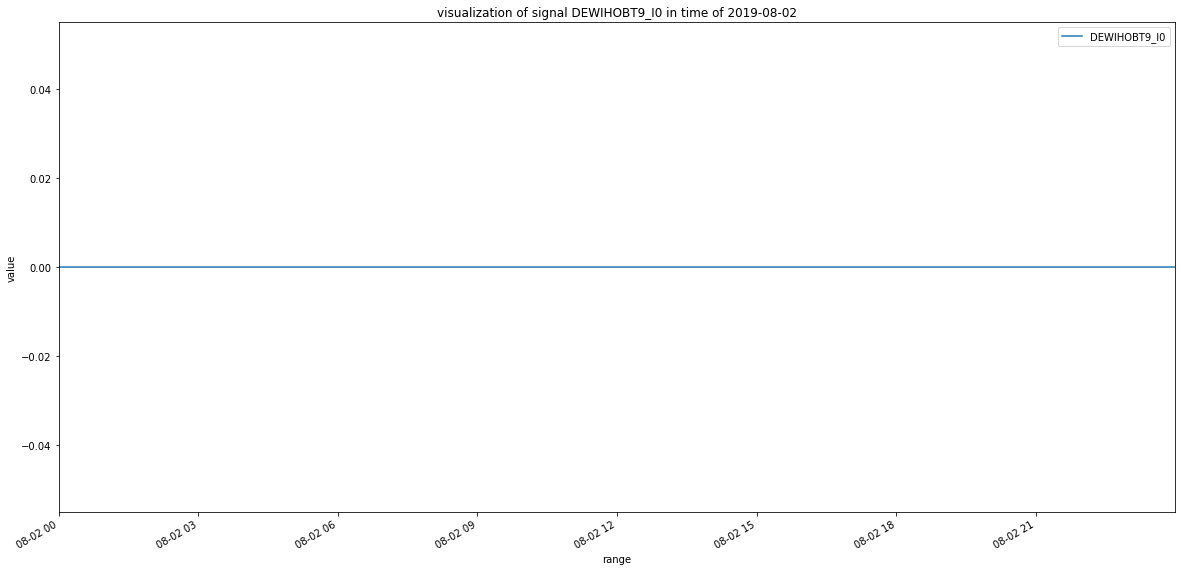

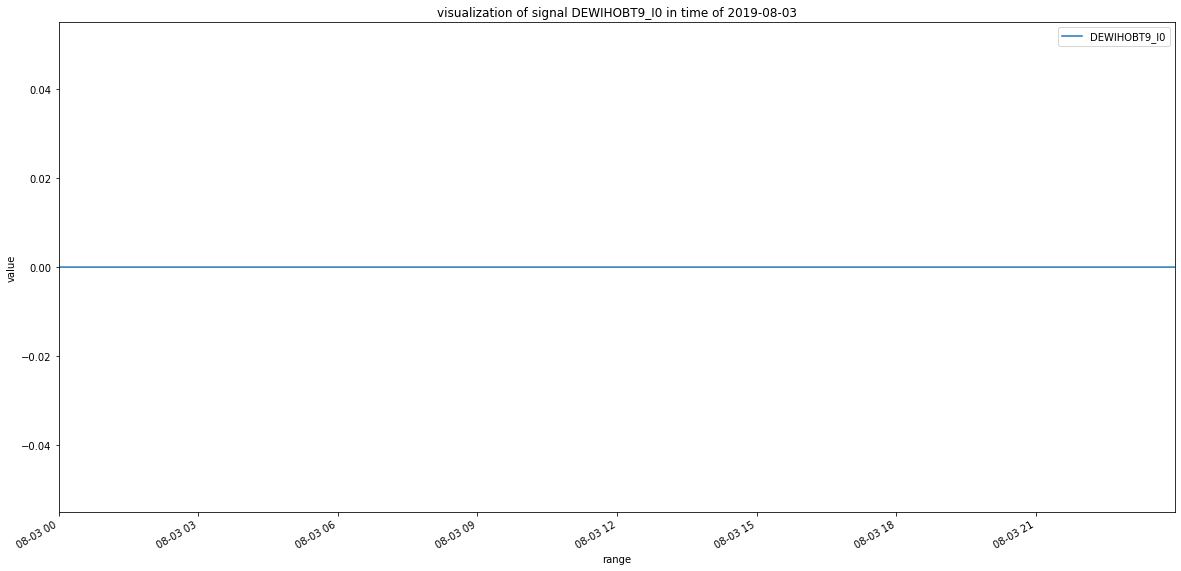

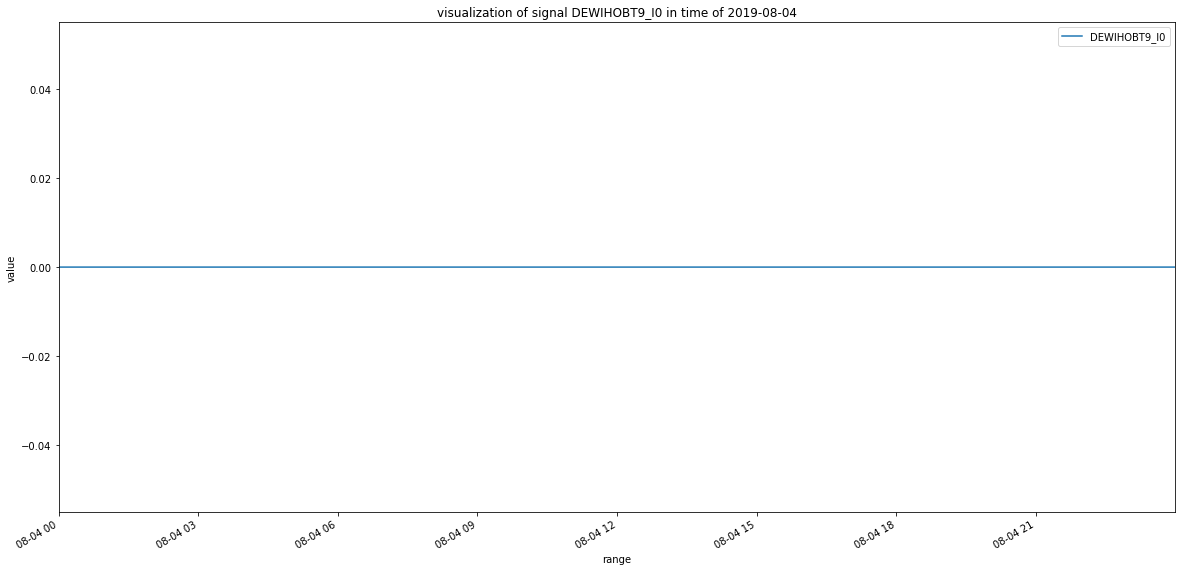

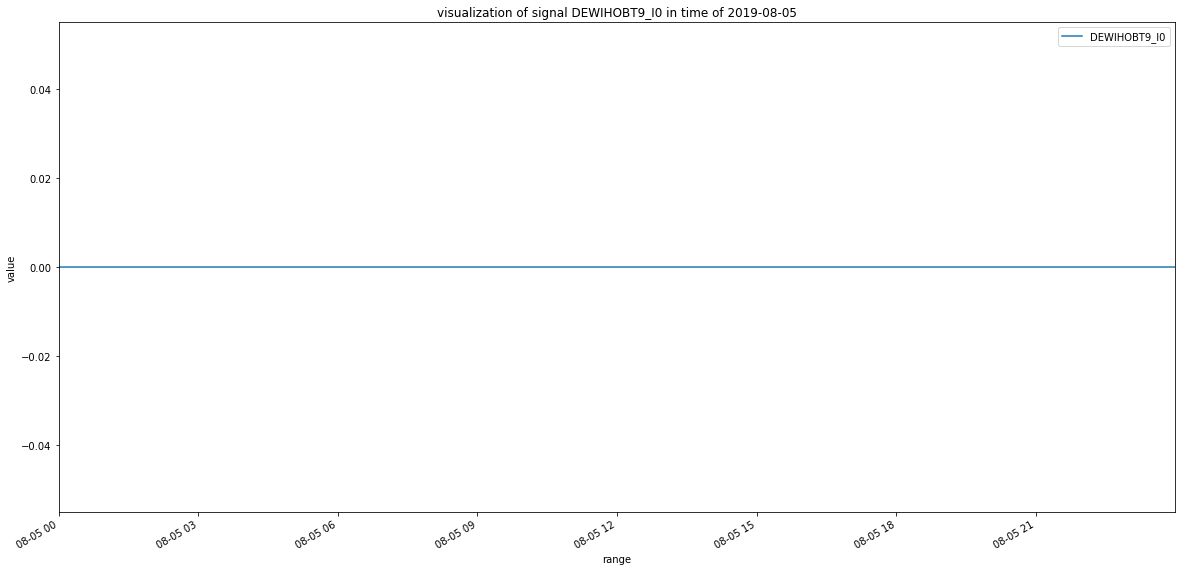

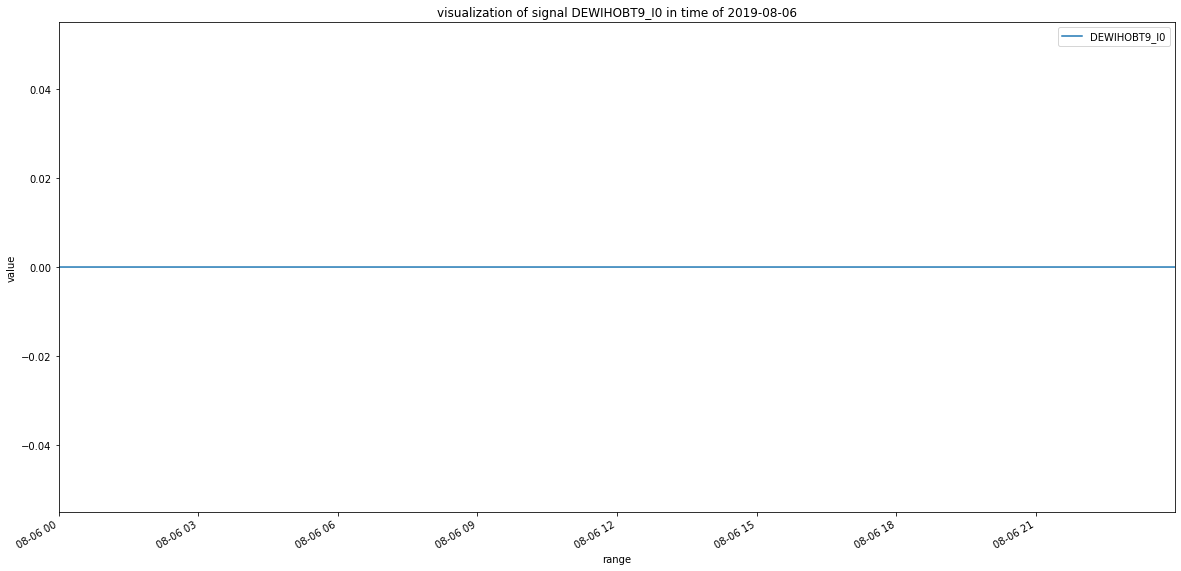

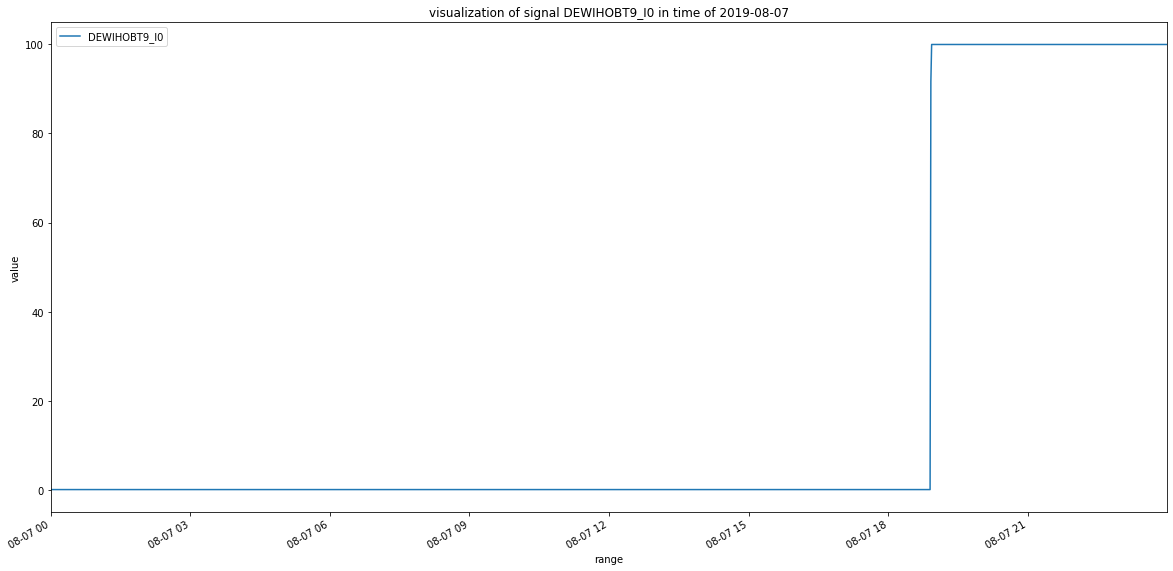

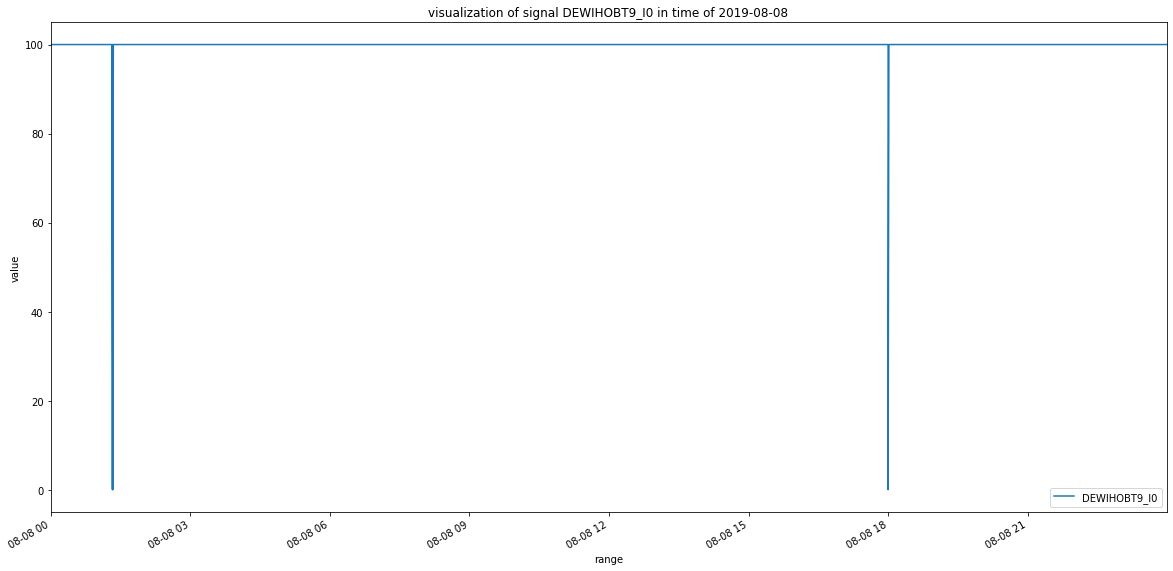

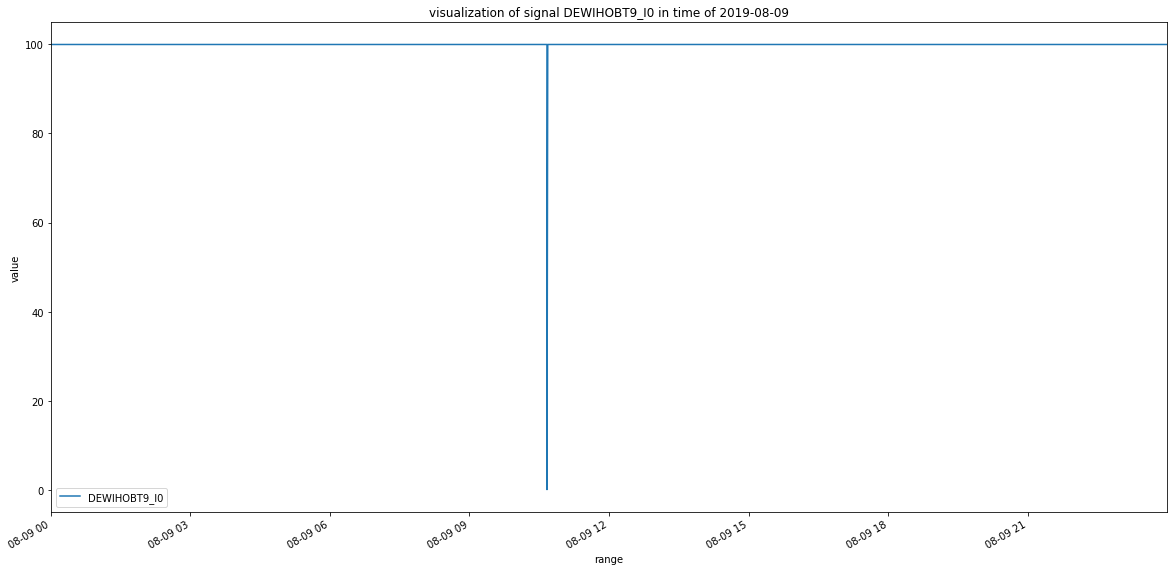

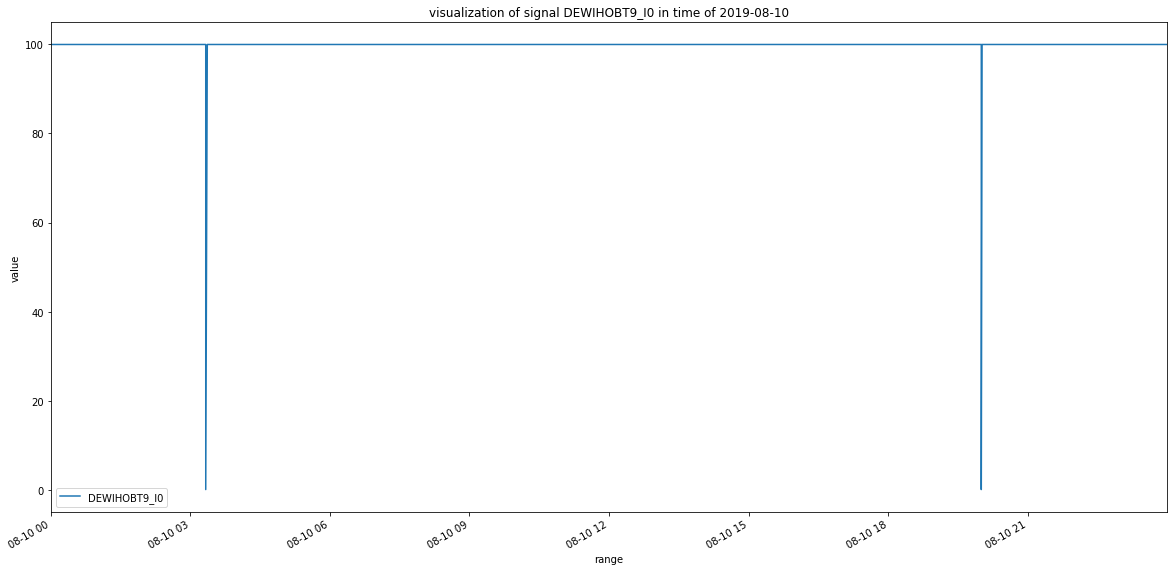

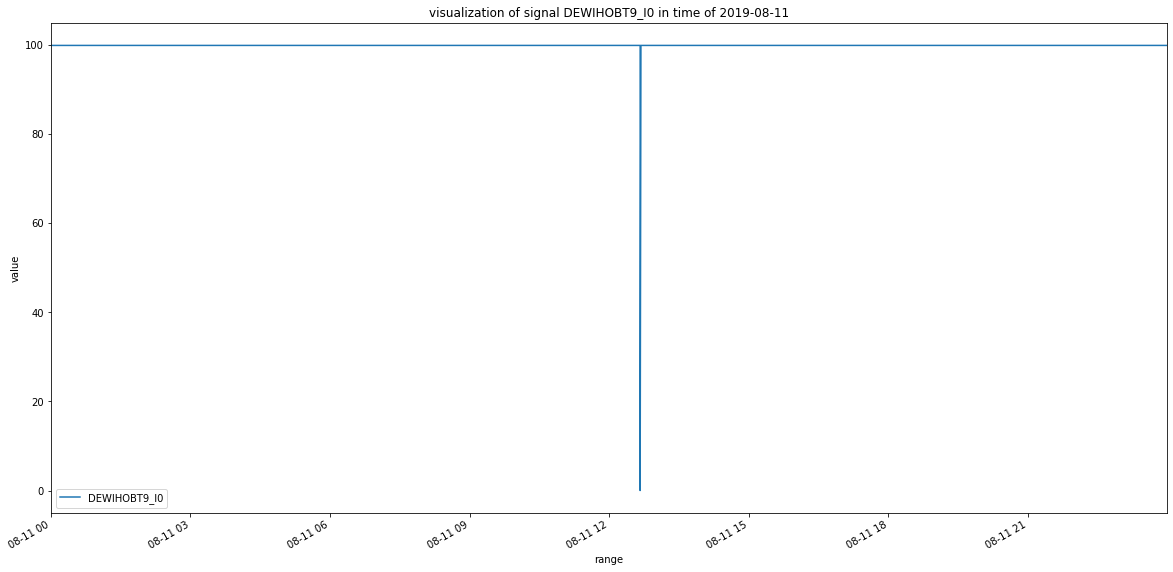

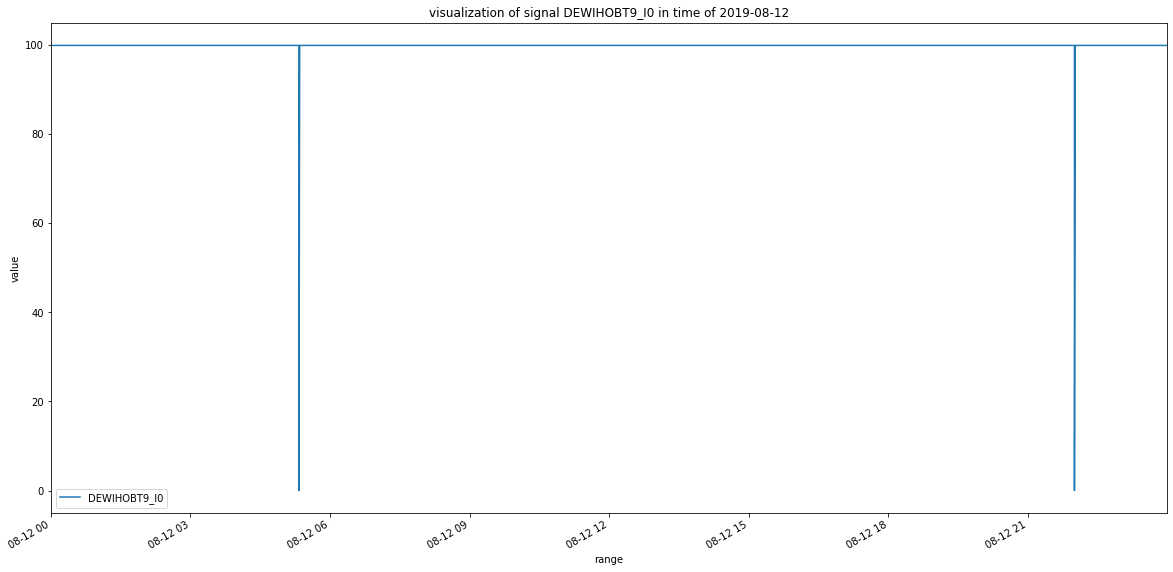

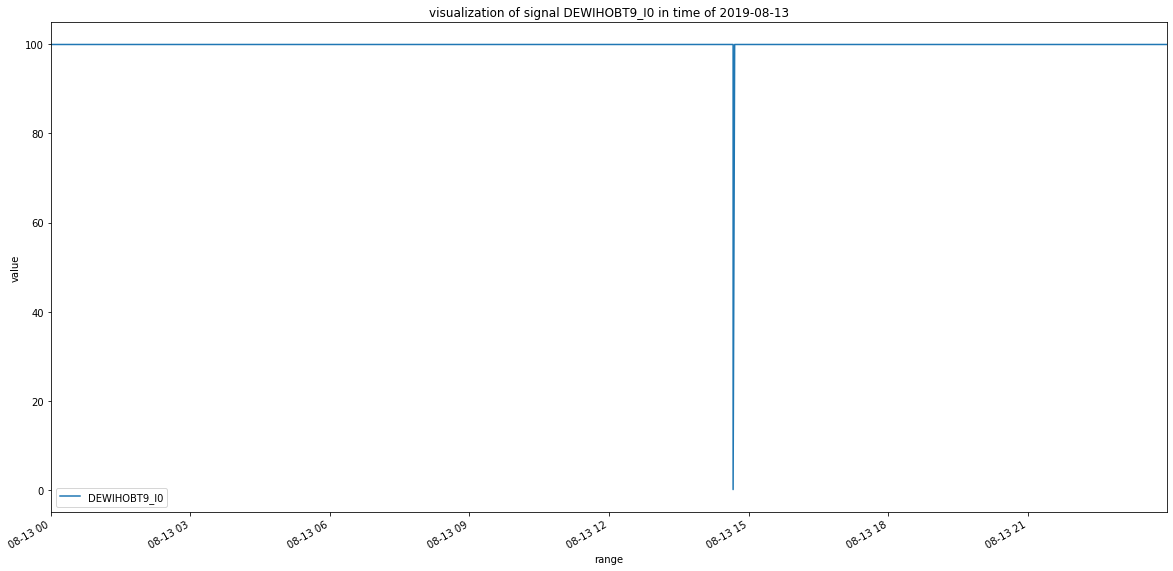

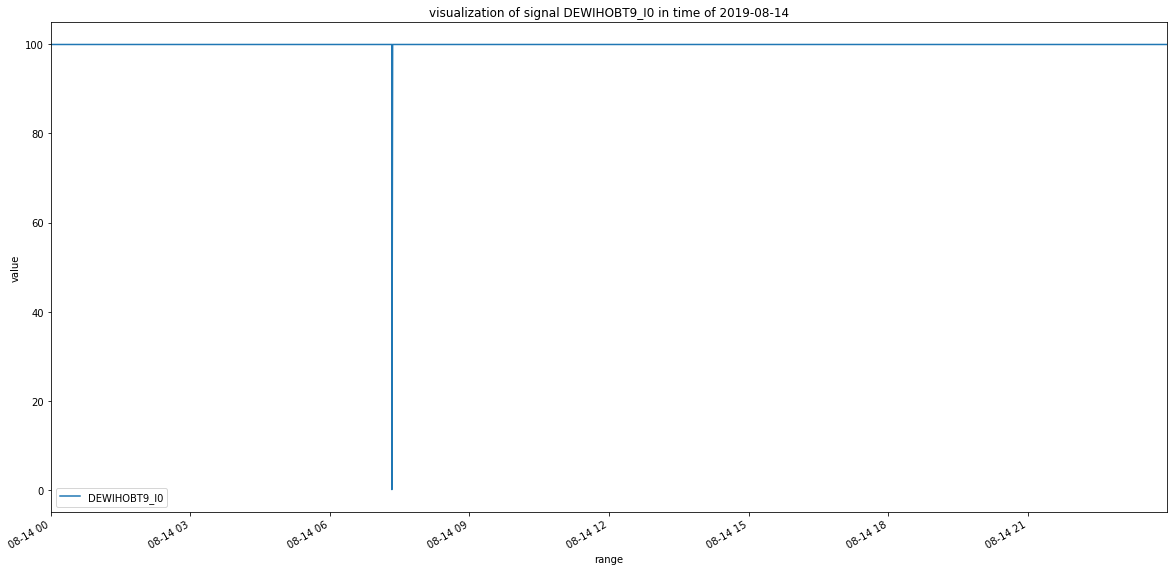

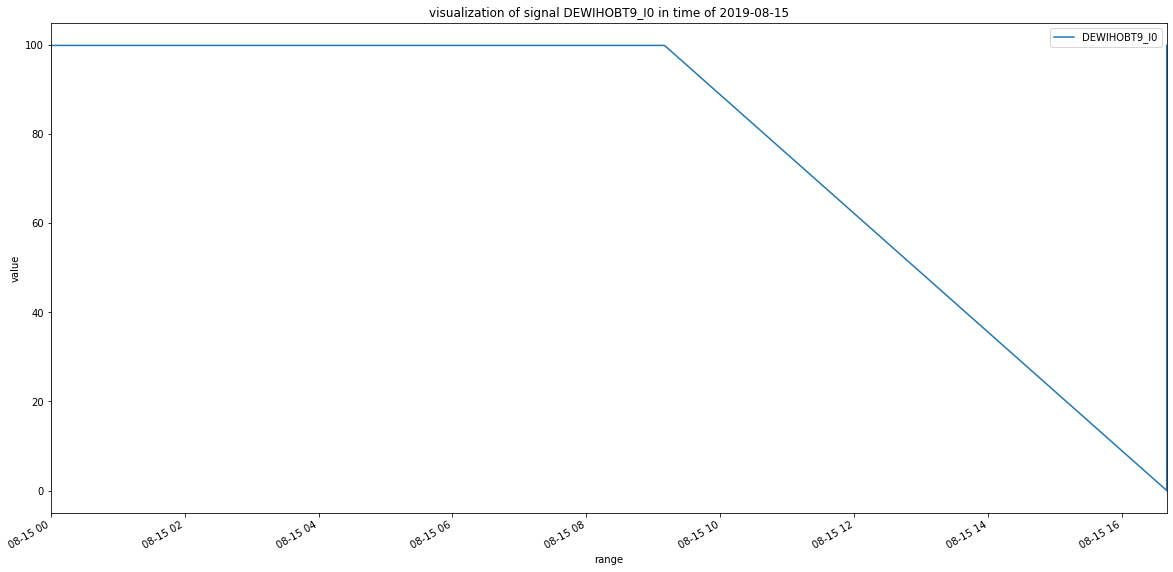

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737287.3888888889 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


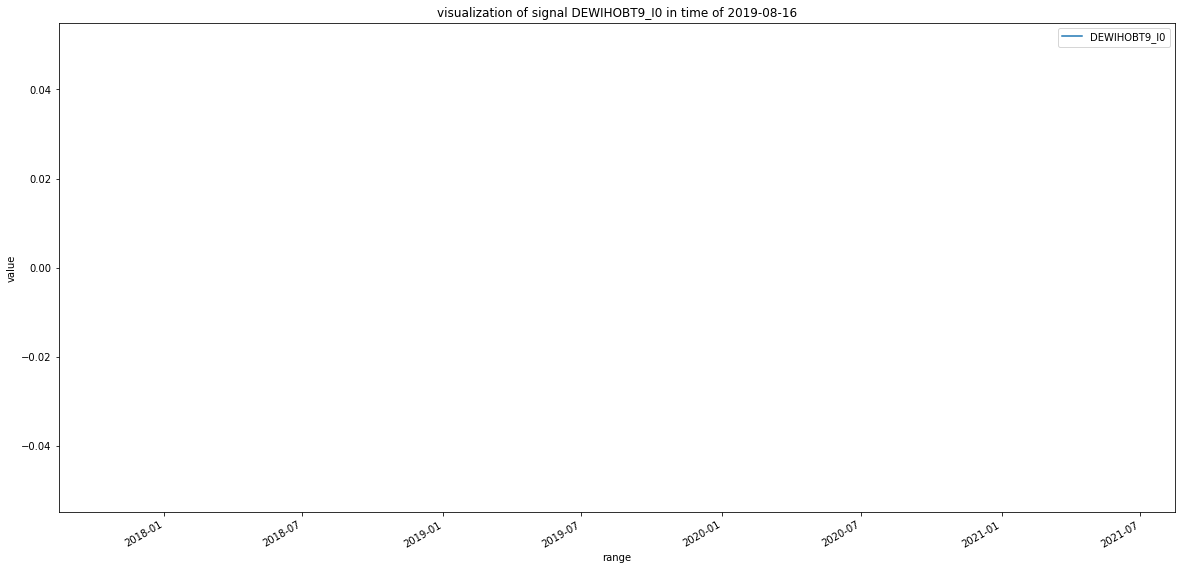

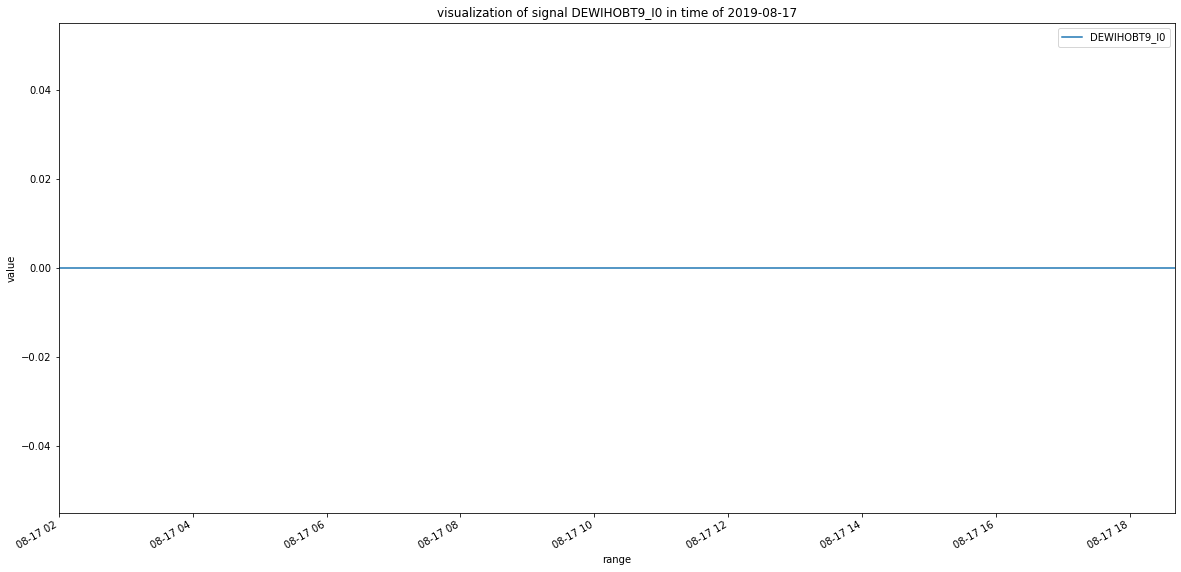

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737289.4722222222 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


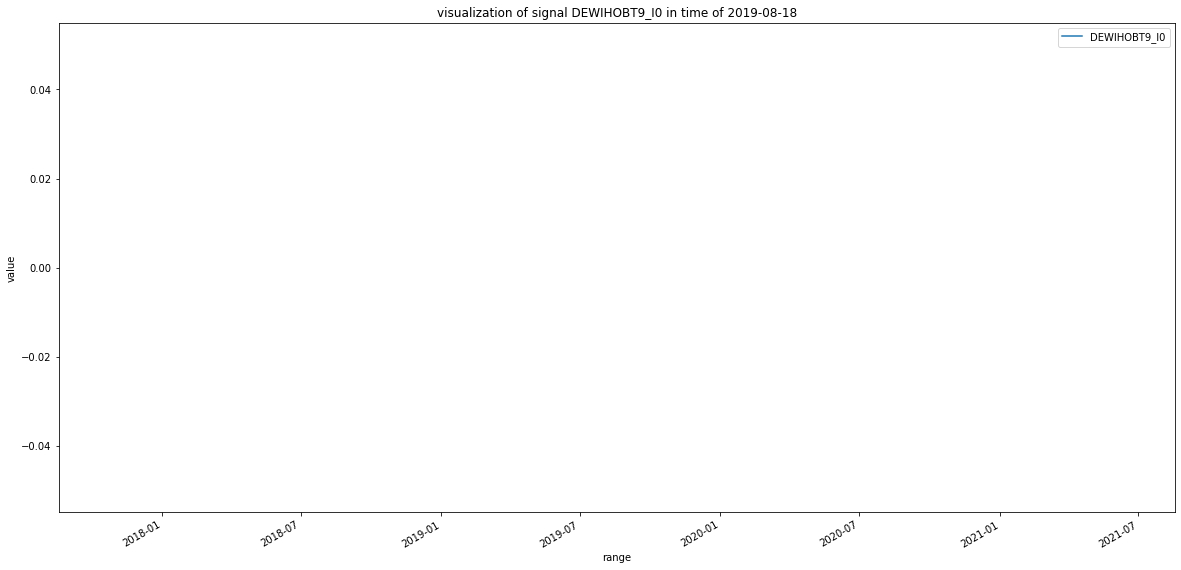

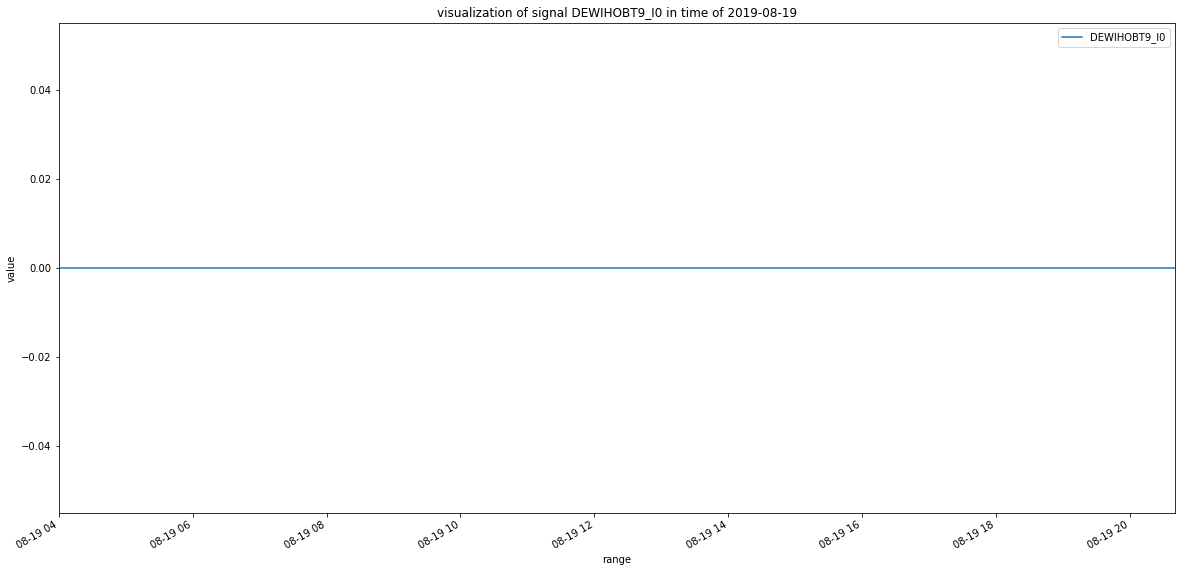

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737291.5555555555 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


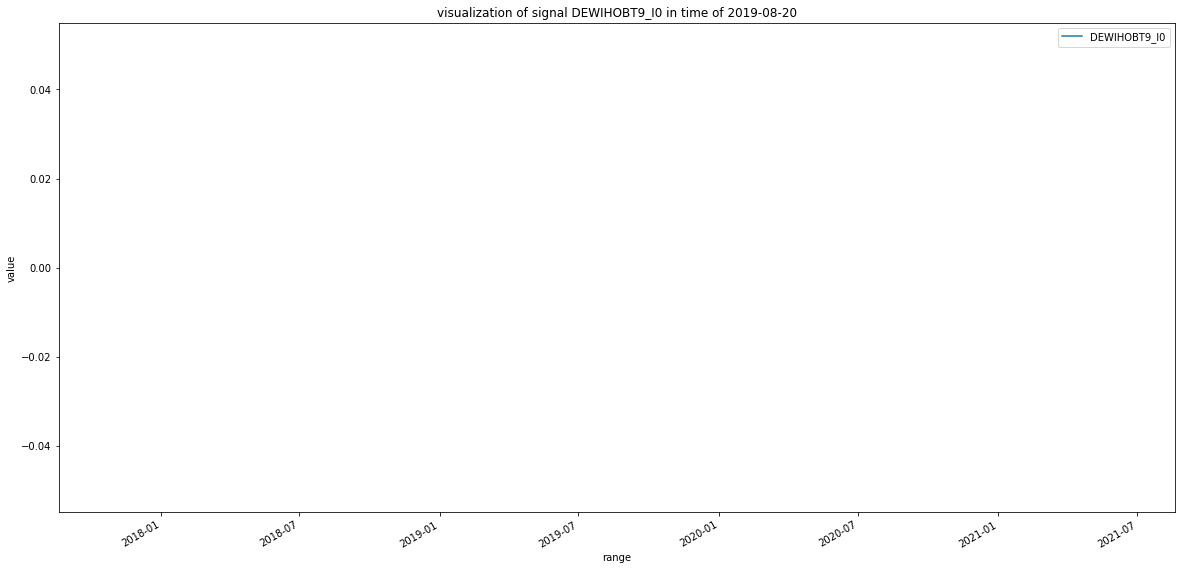

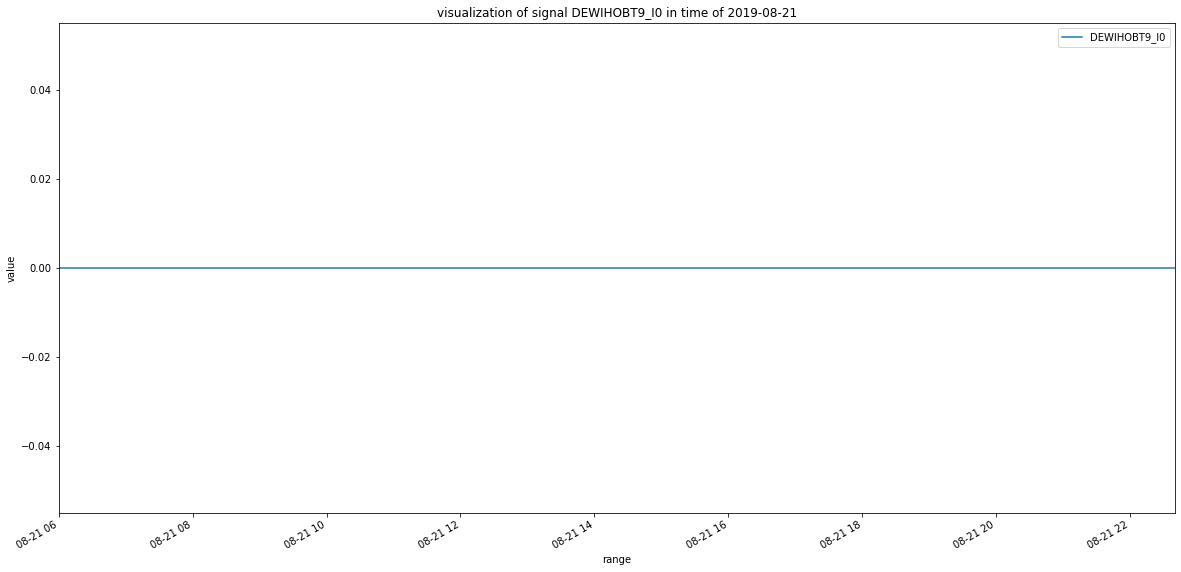

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737293.6388888889 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


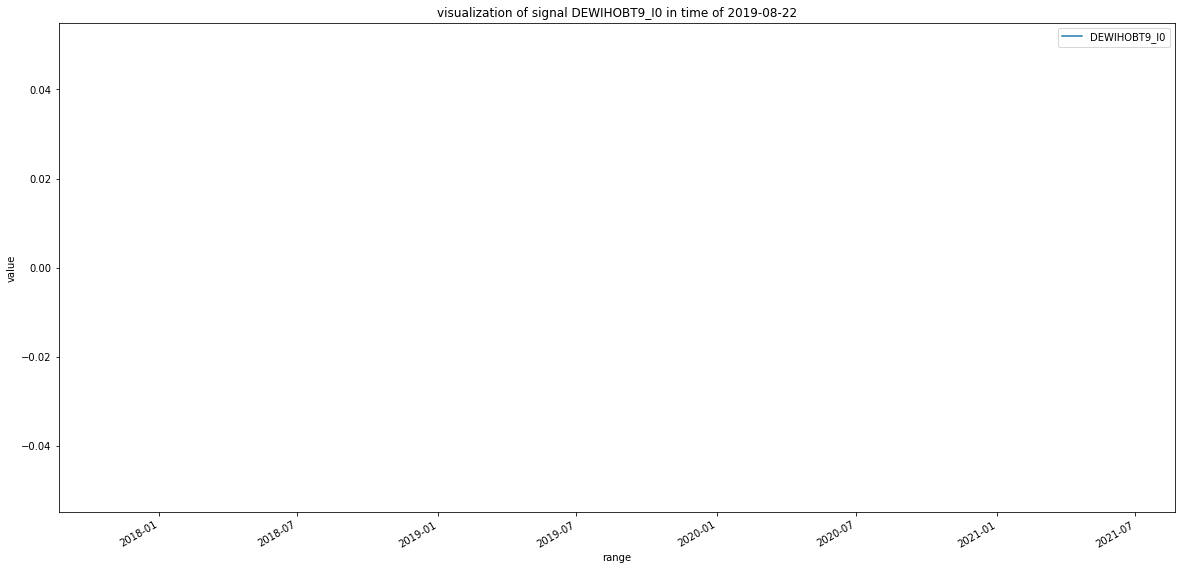

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737294.3333333334 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


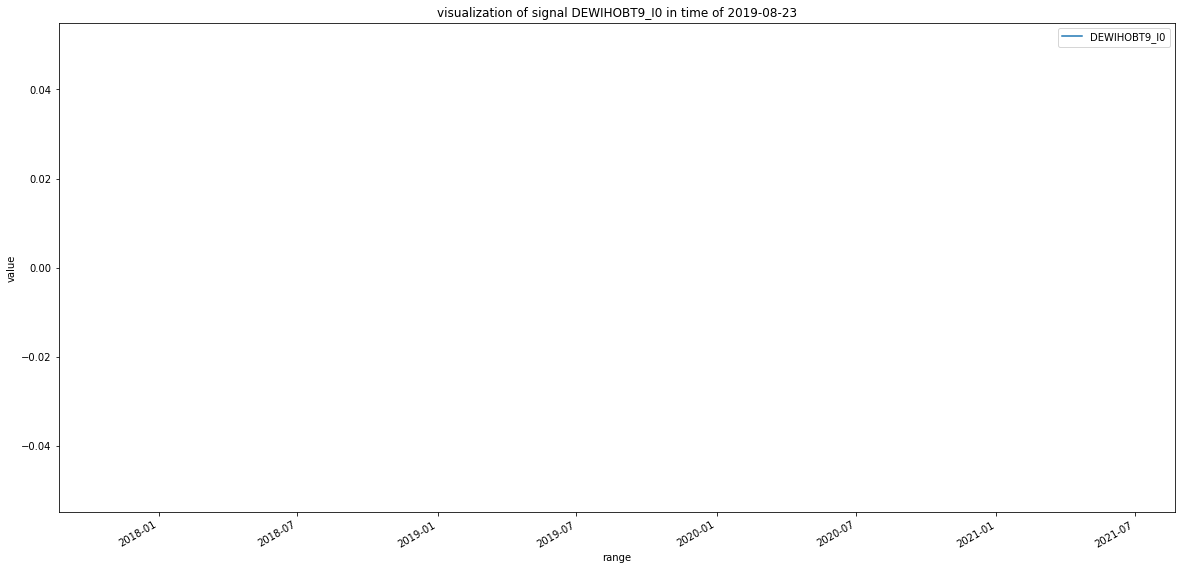

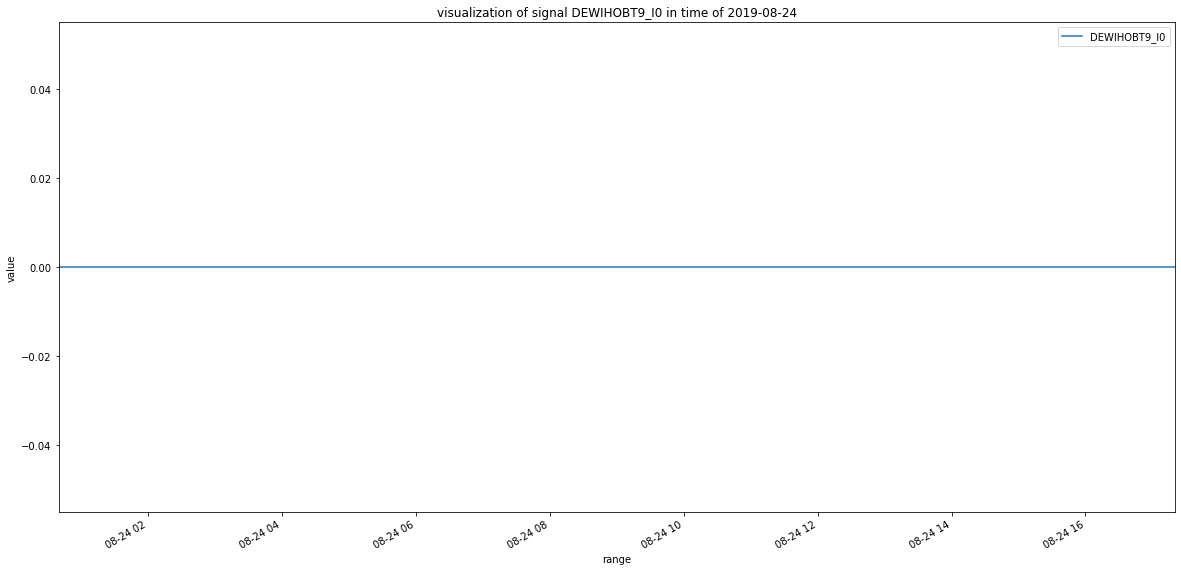

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737296.4166666666 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


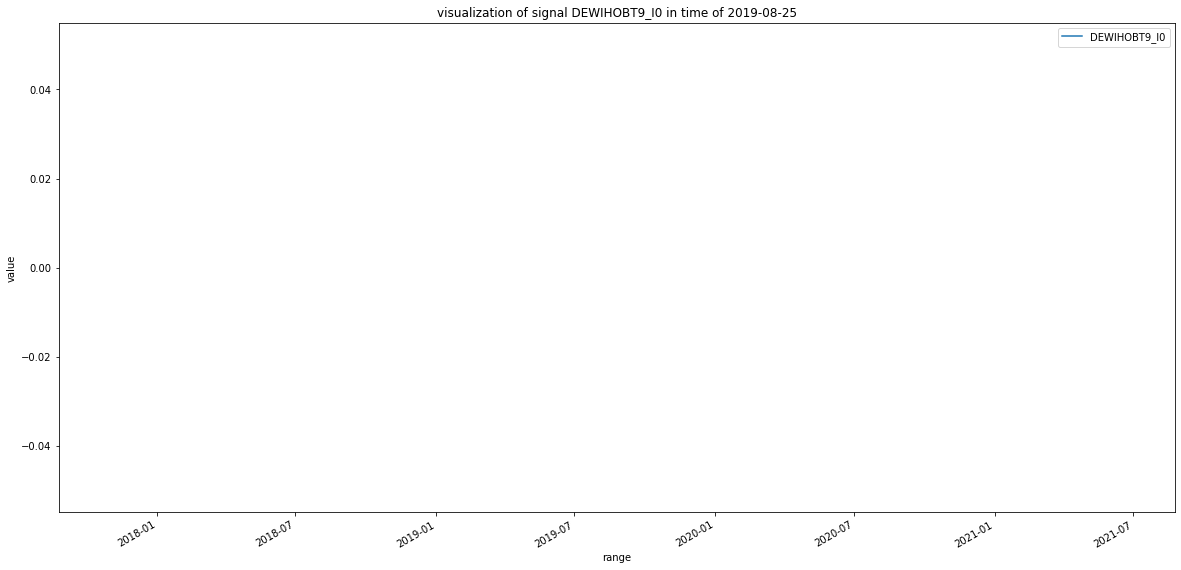

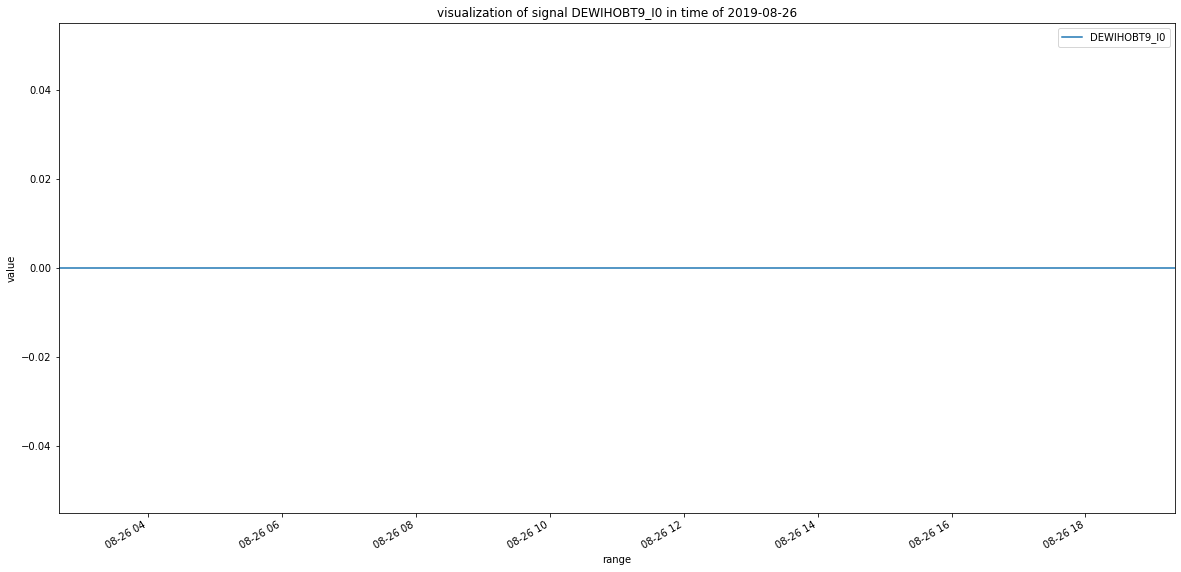

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737298.5 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


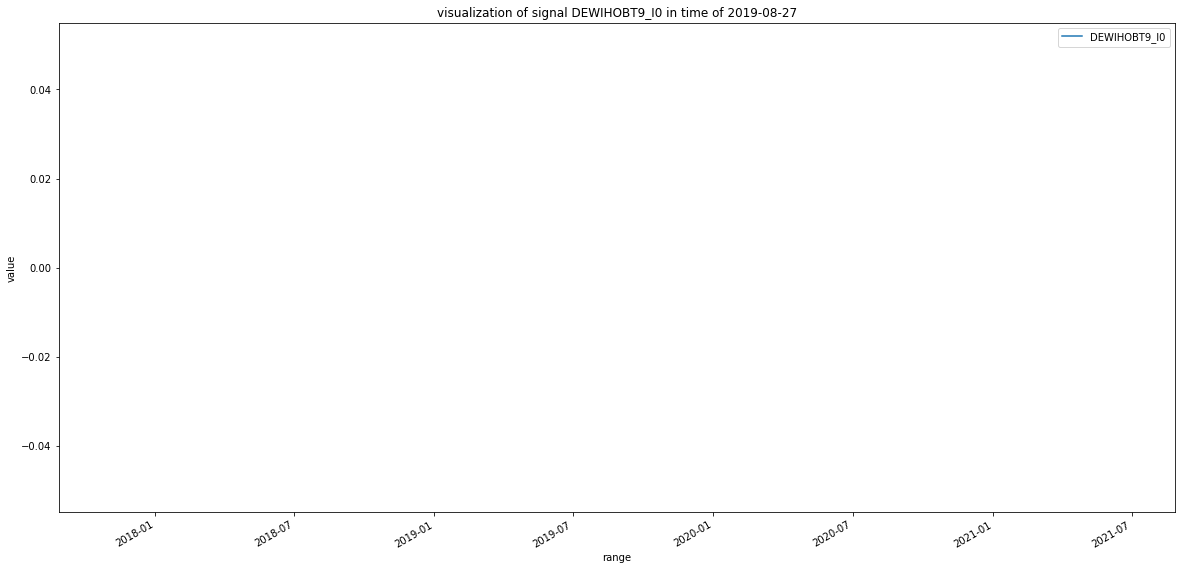

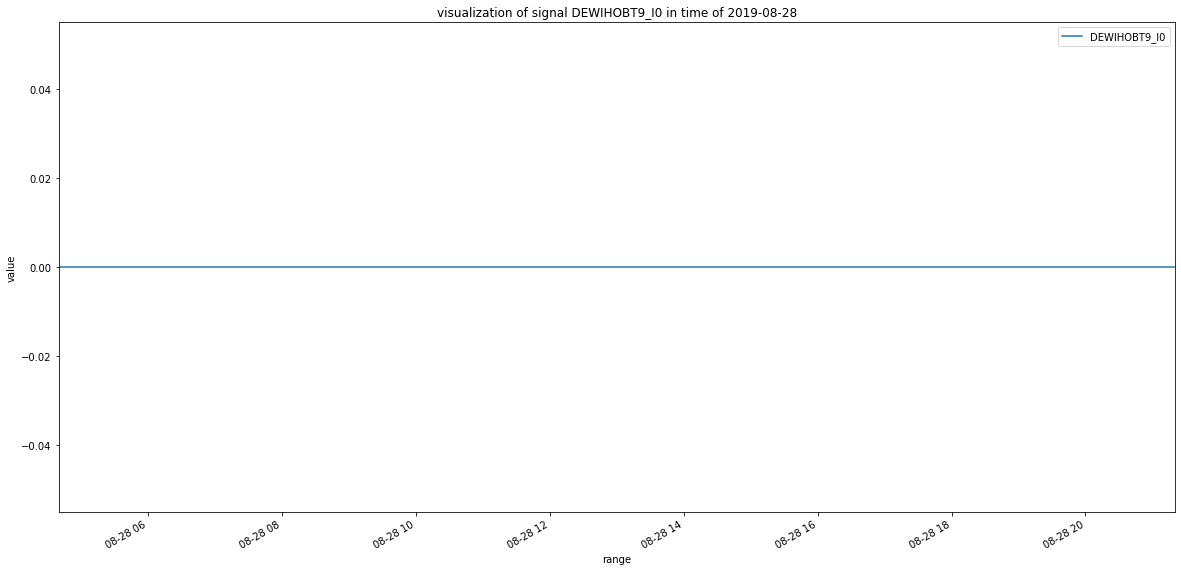

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737300.5833333334 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


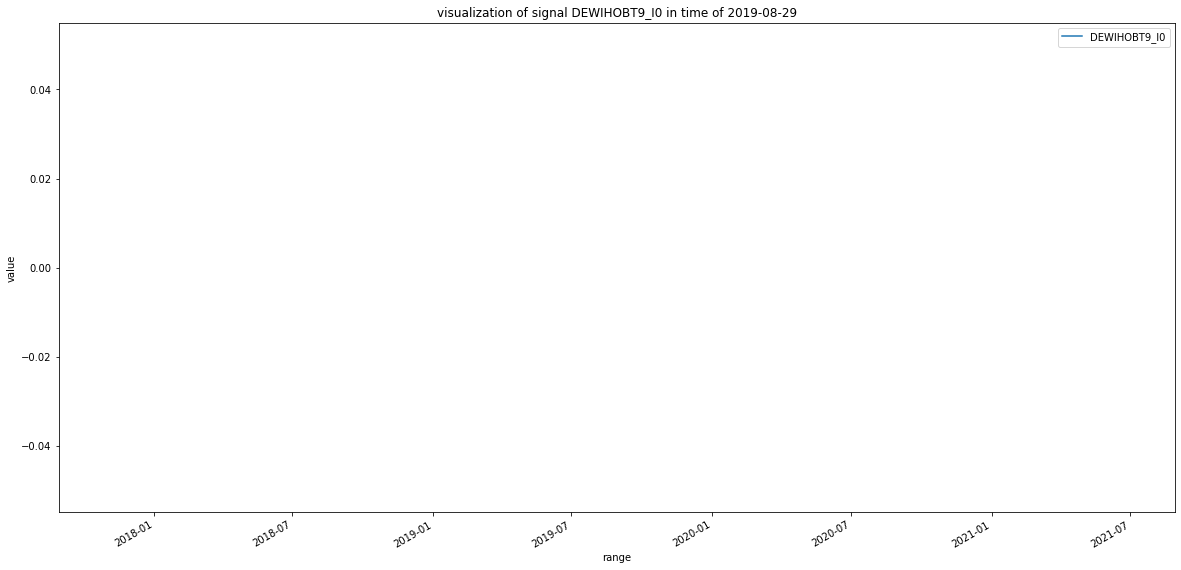

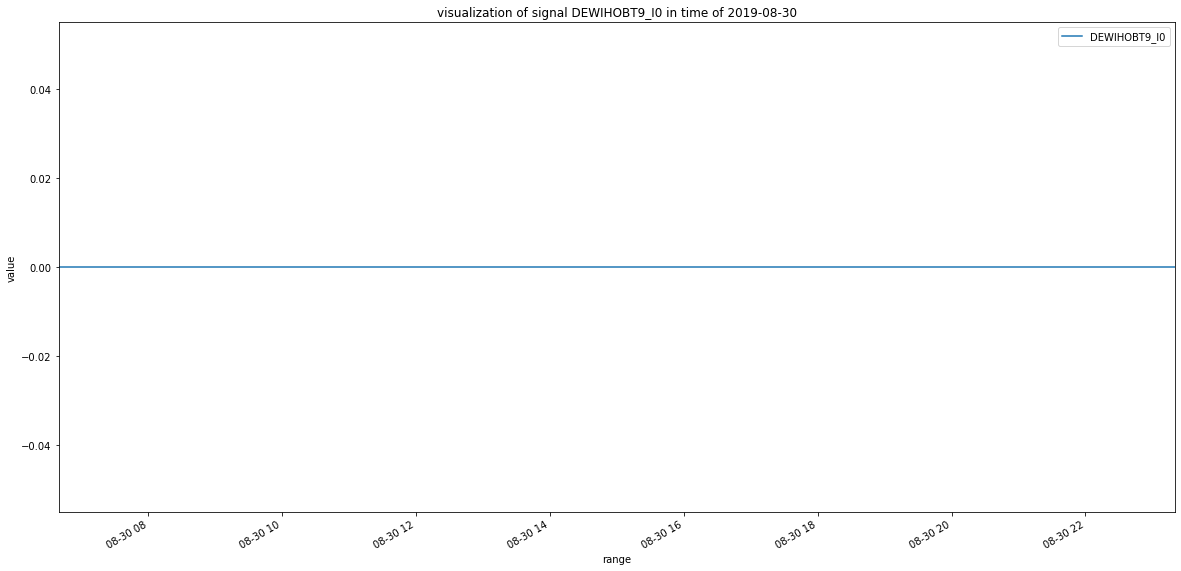

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737302.6666666666 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


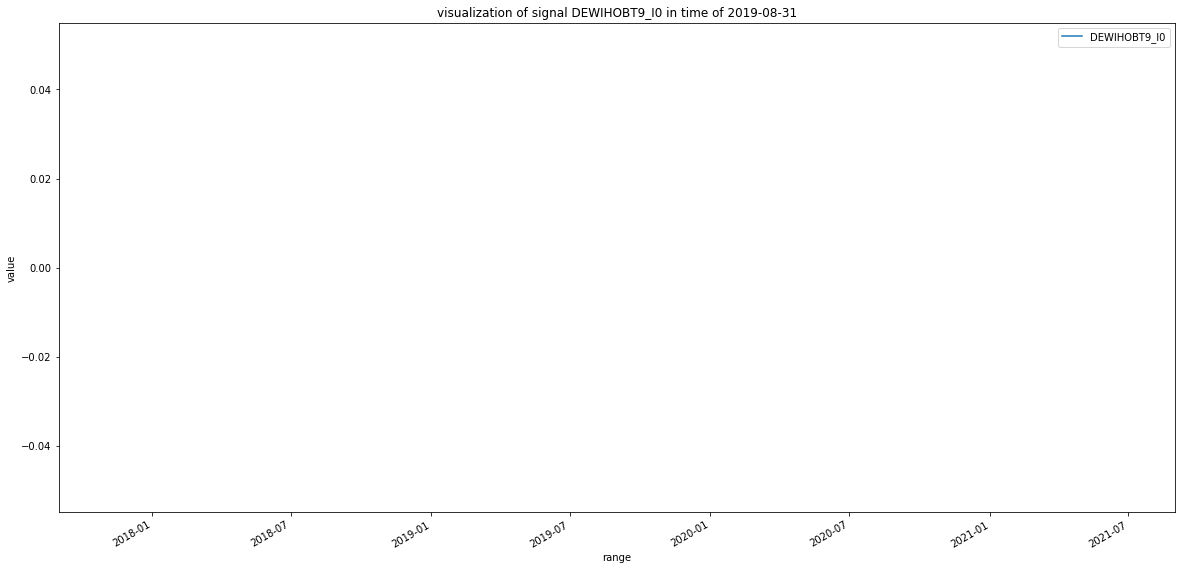

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737303.3611111111 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


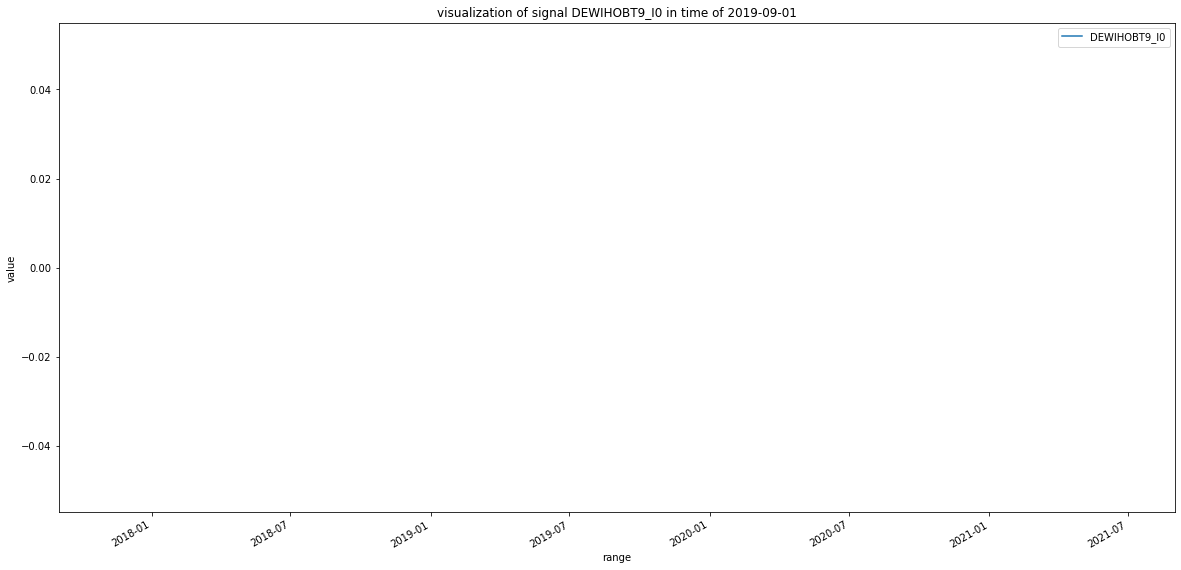

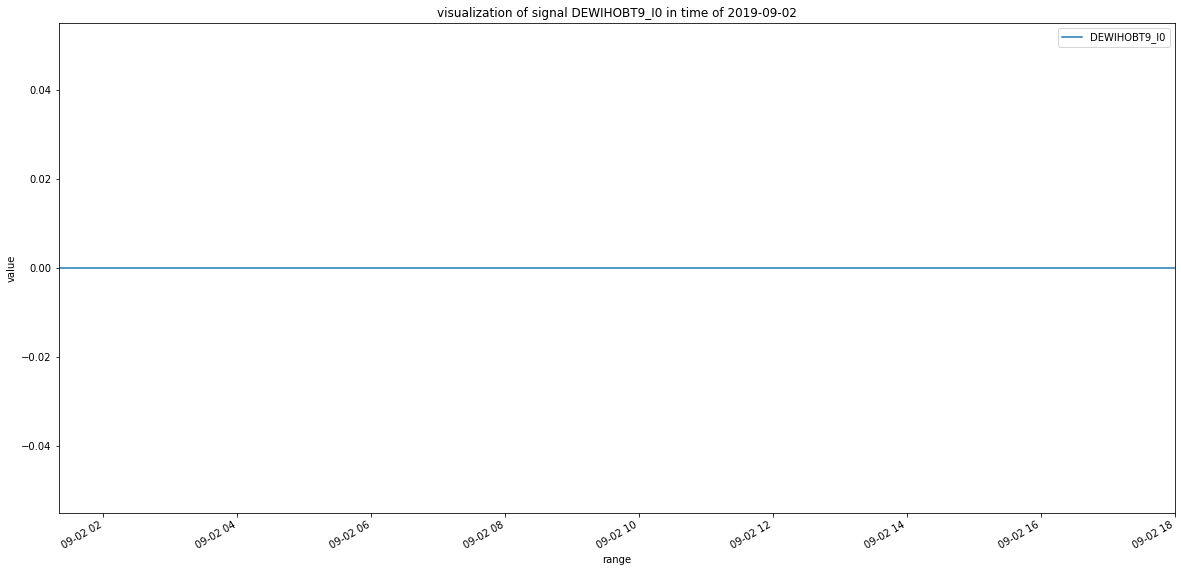

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737305.4444444445 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


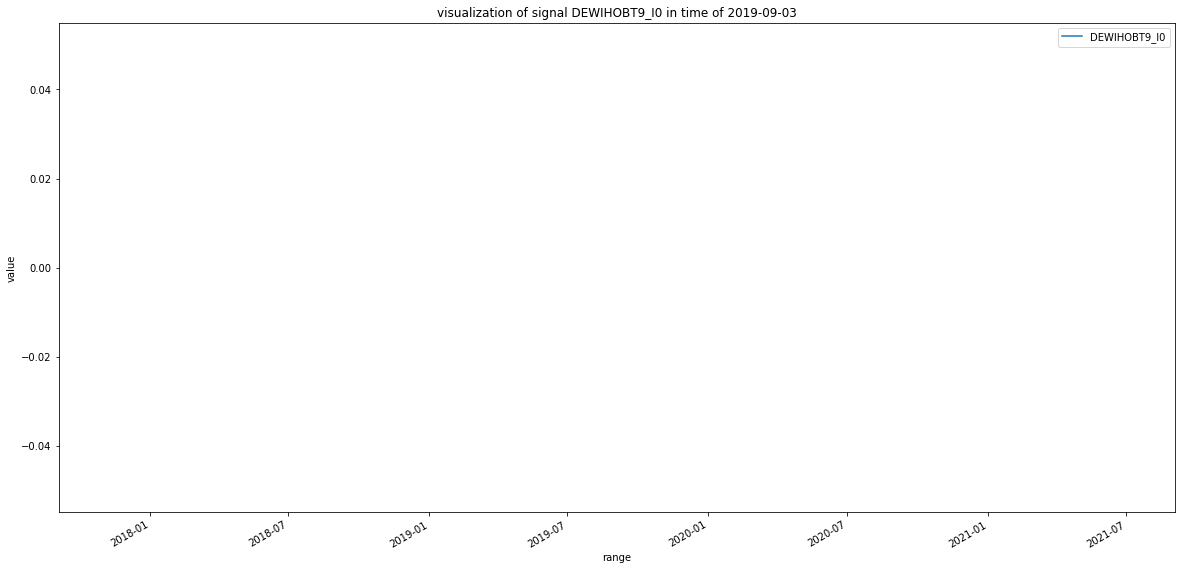

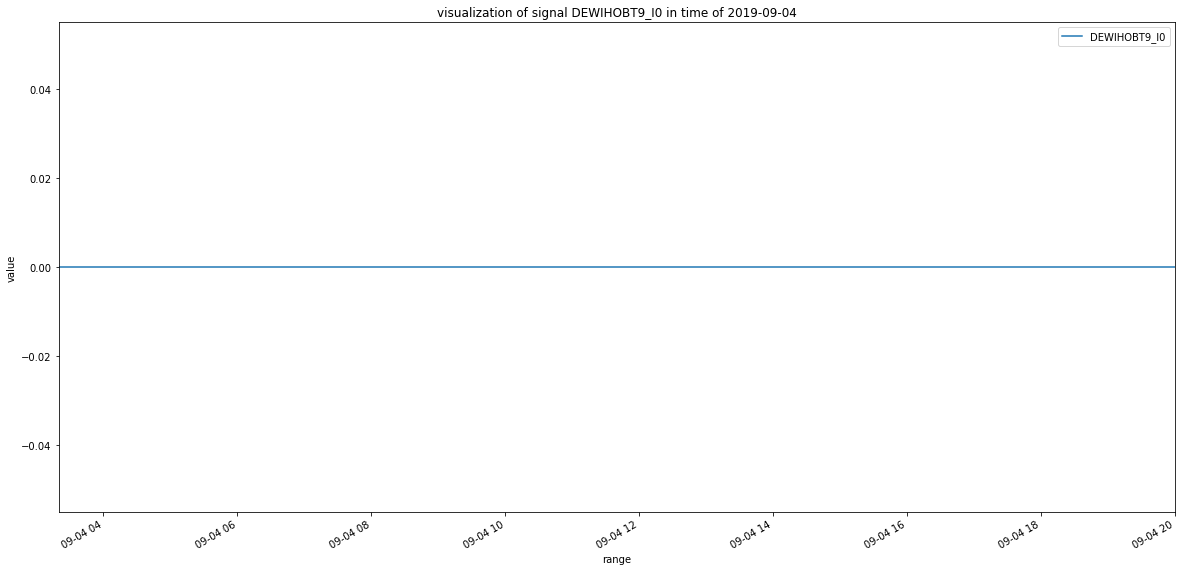

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737307.5277777778 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


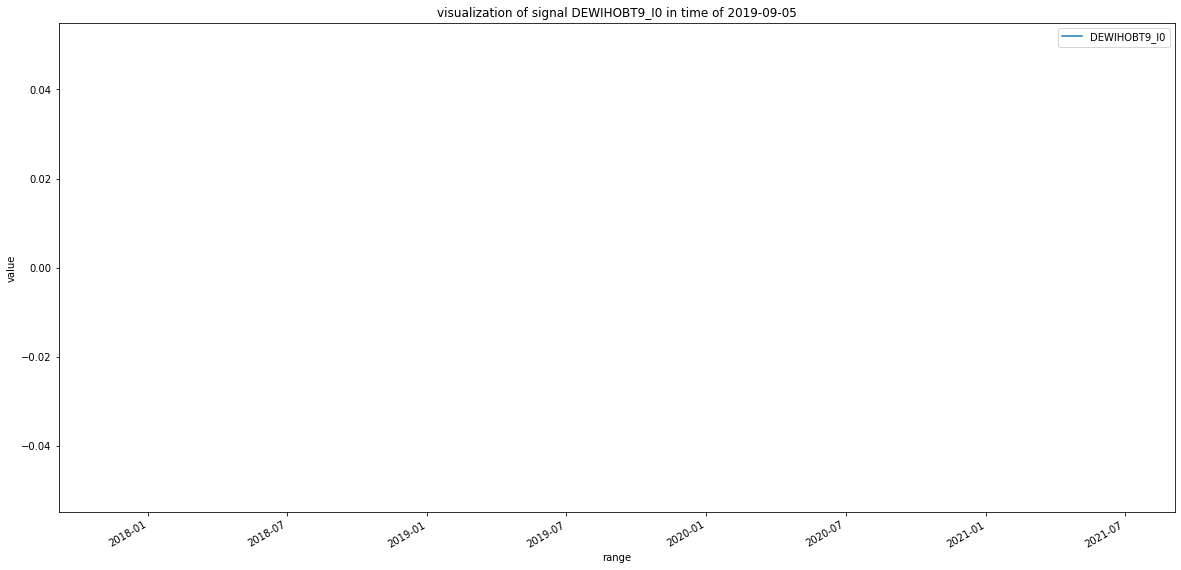

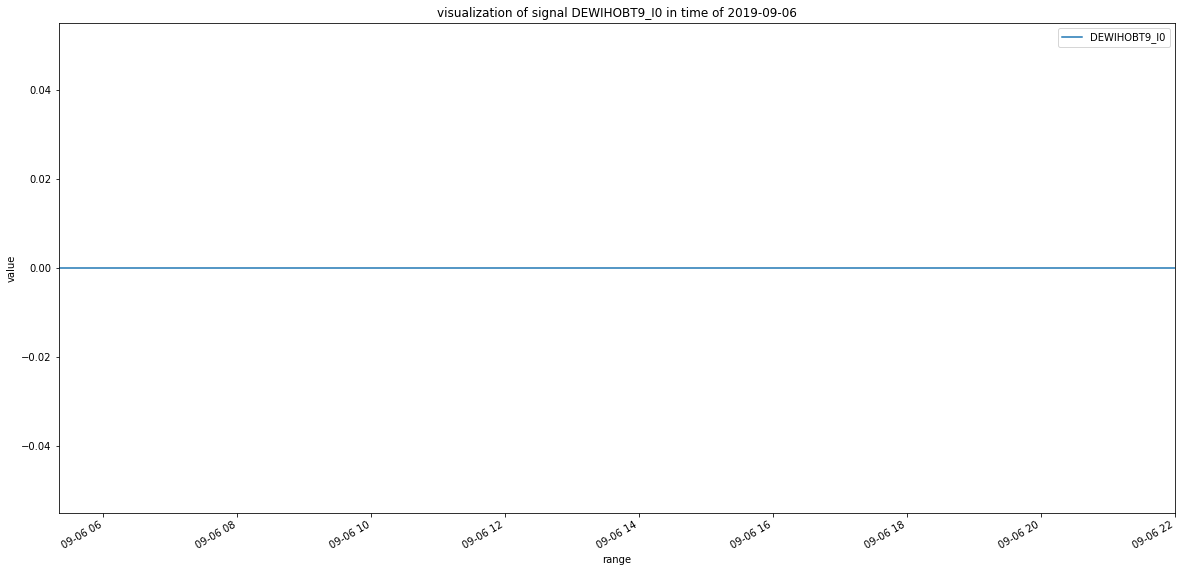

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737309.6111111111 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


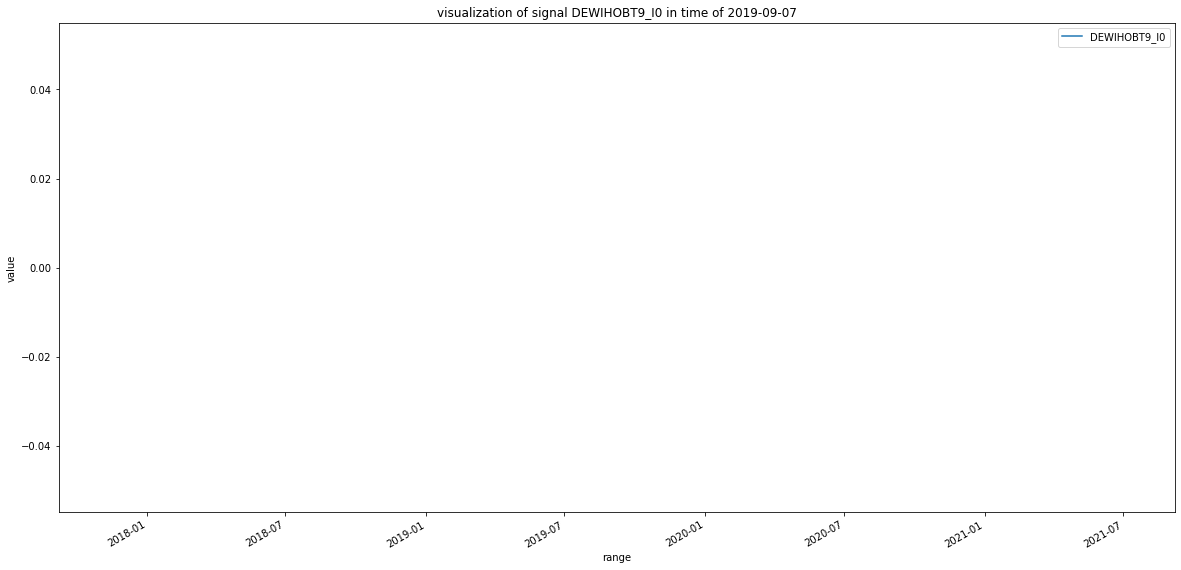

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737310.3055555555 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


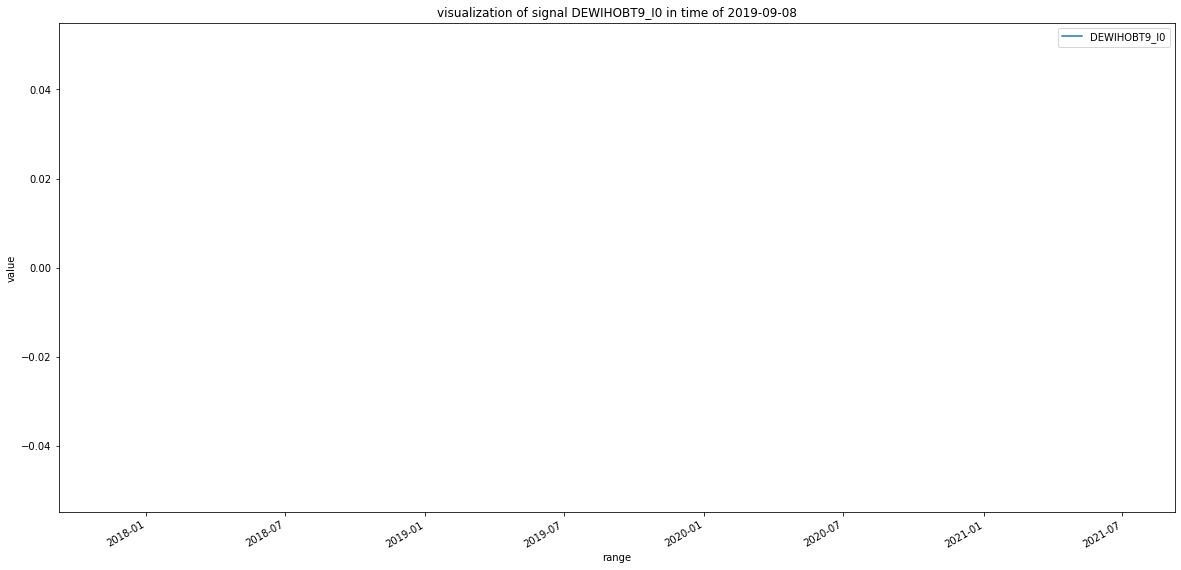

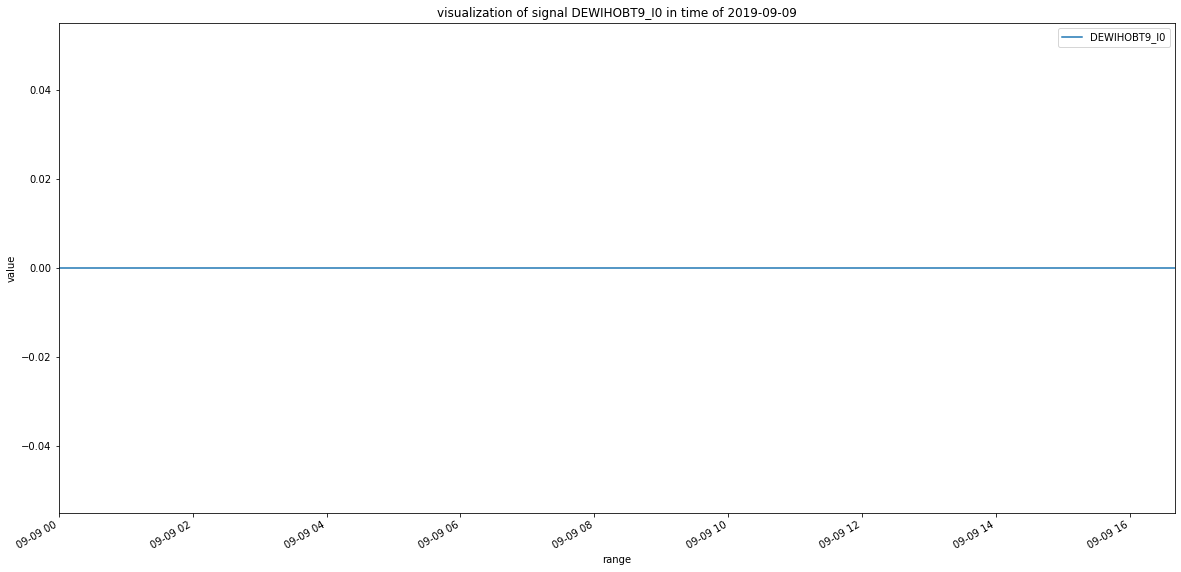

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737312.3888888889 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


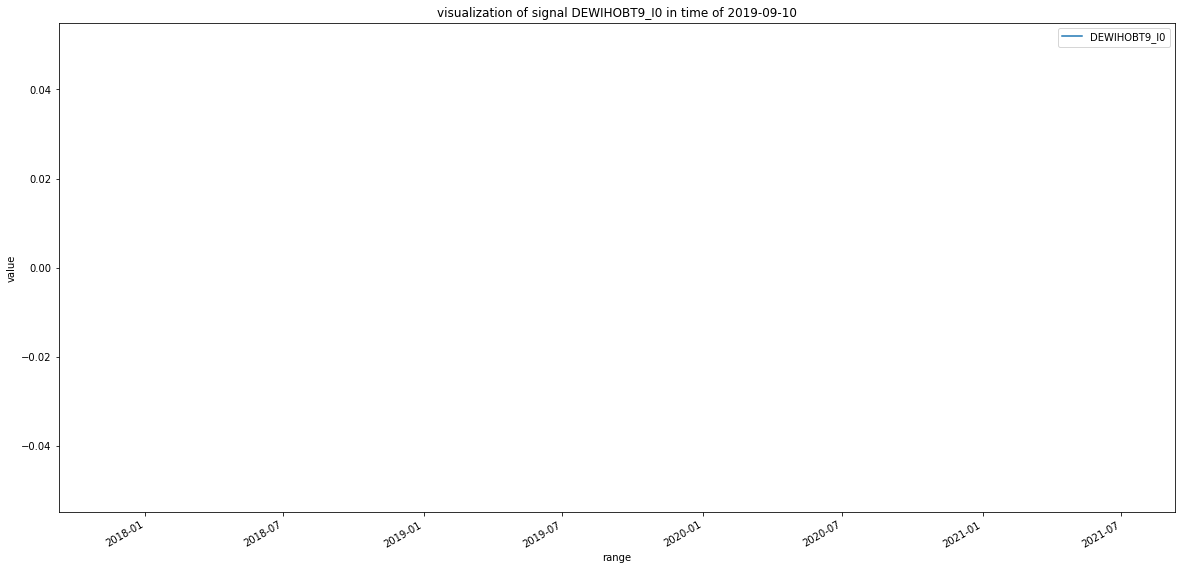

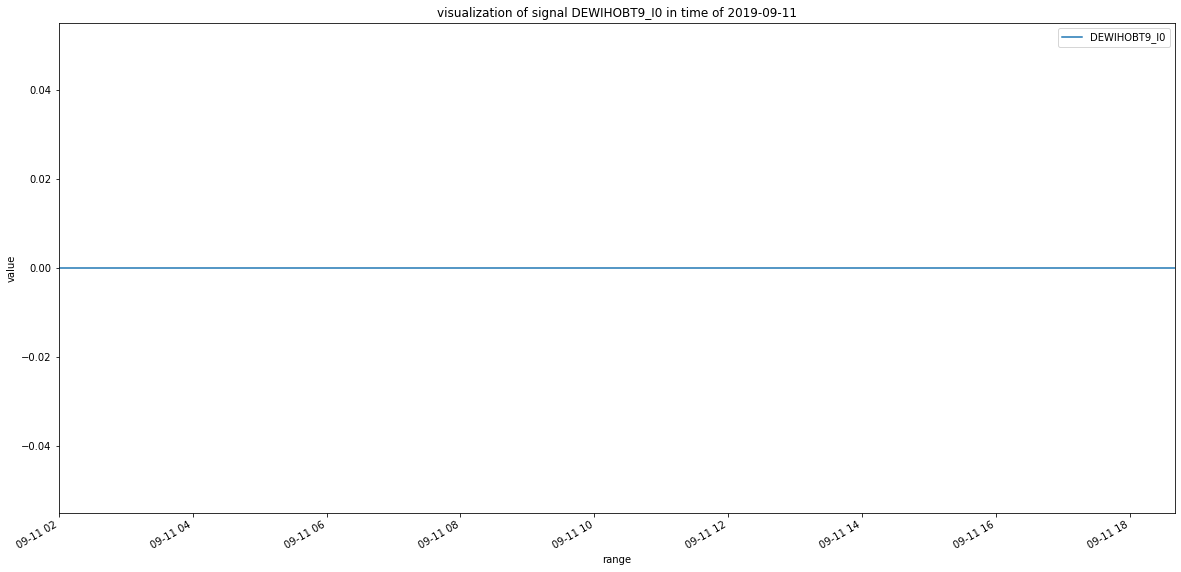

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737314.4722222222 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


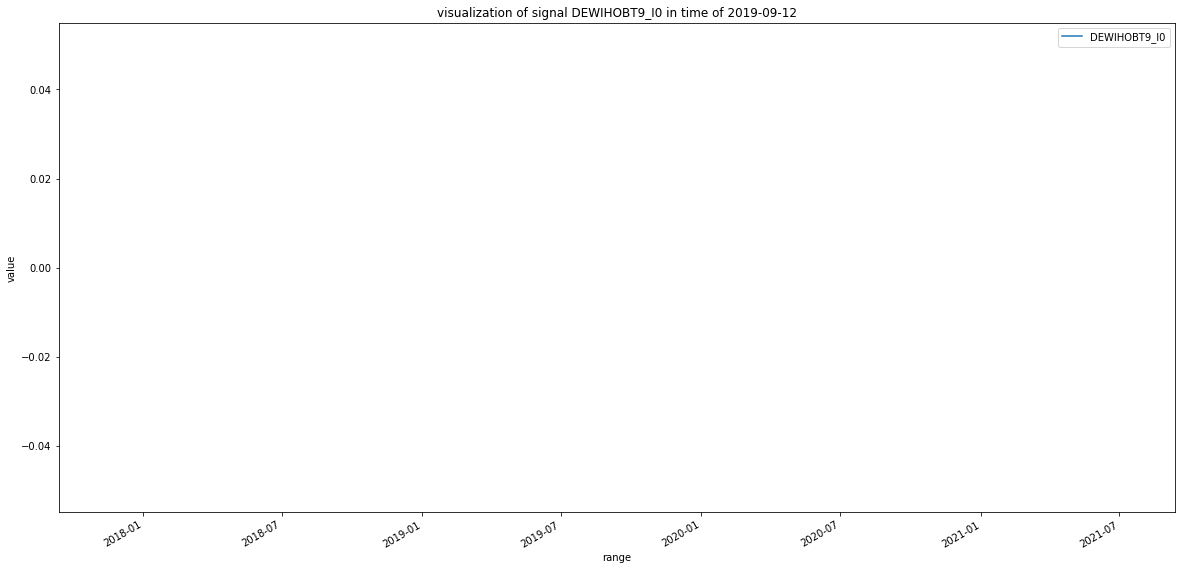

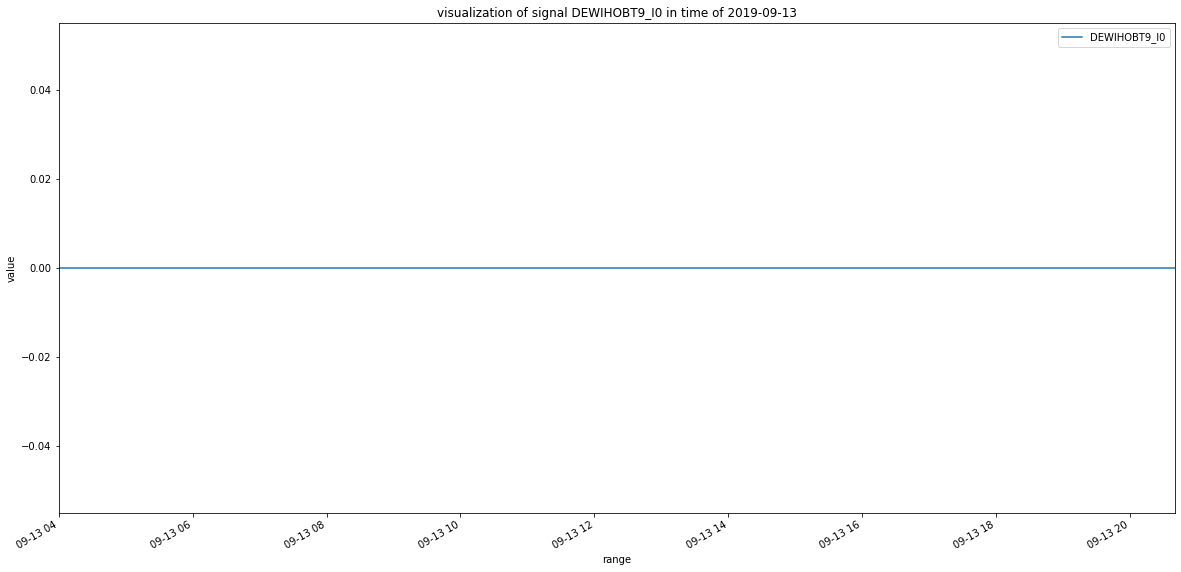

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737316.5555555555 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


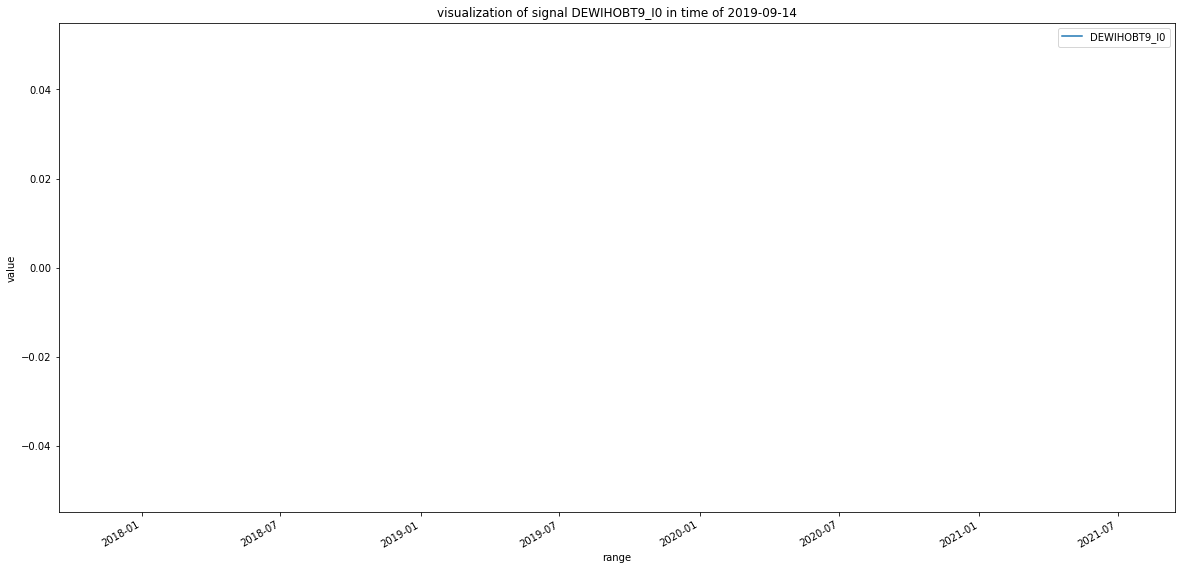

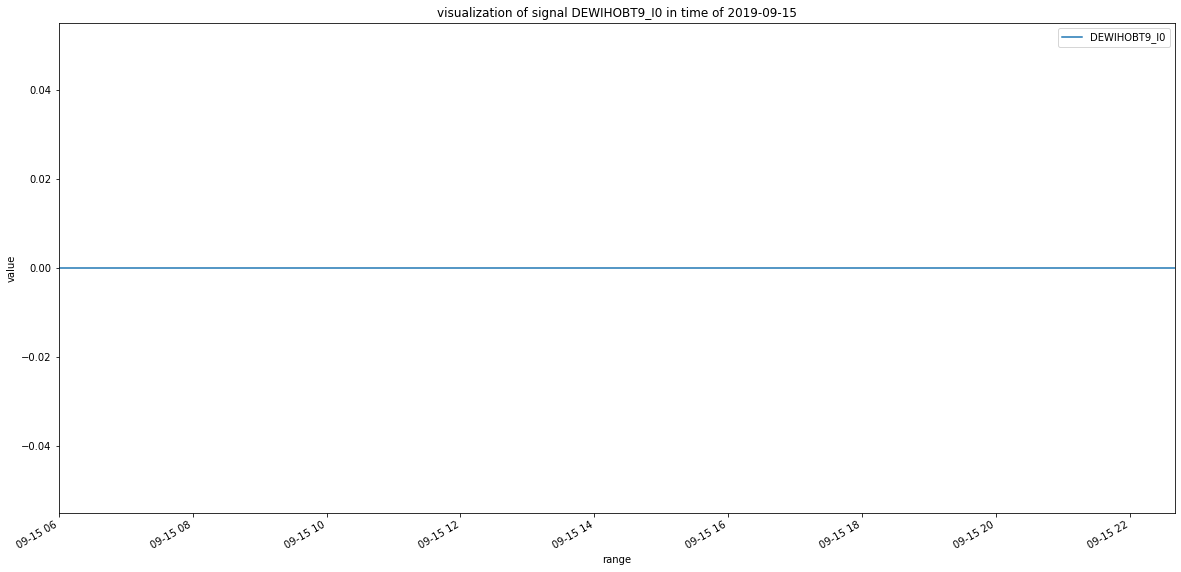

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737318.6388888889 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


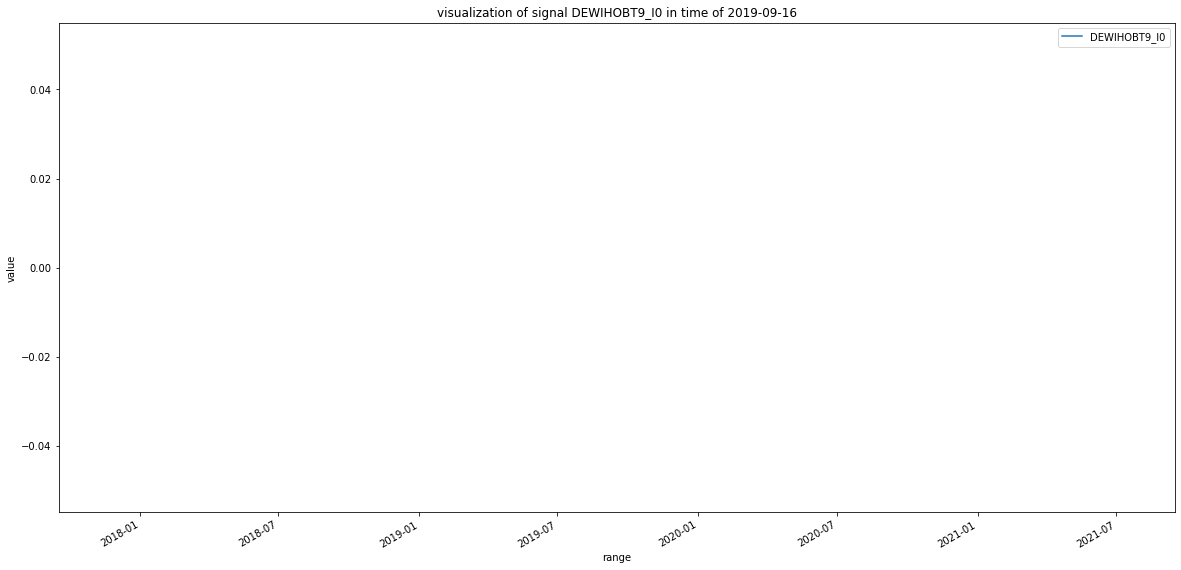

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737319.3333333334 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


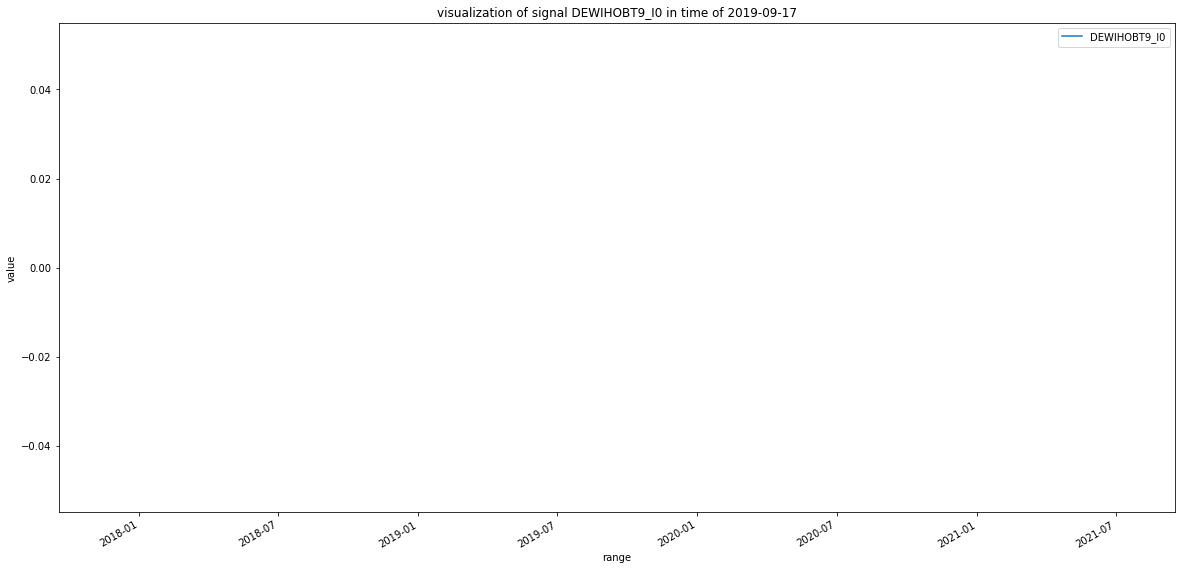

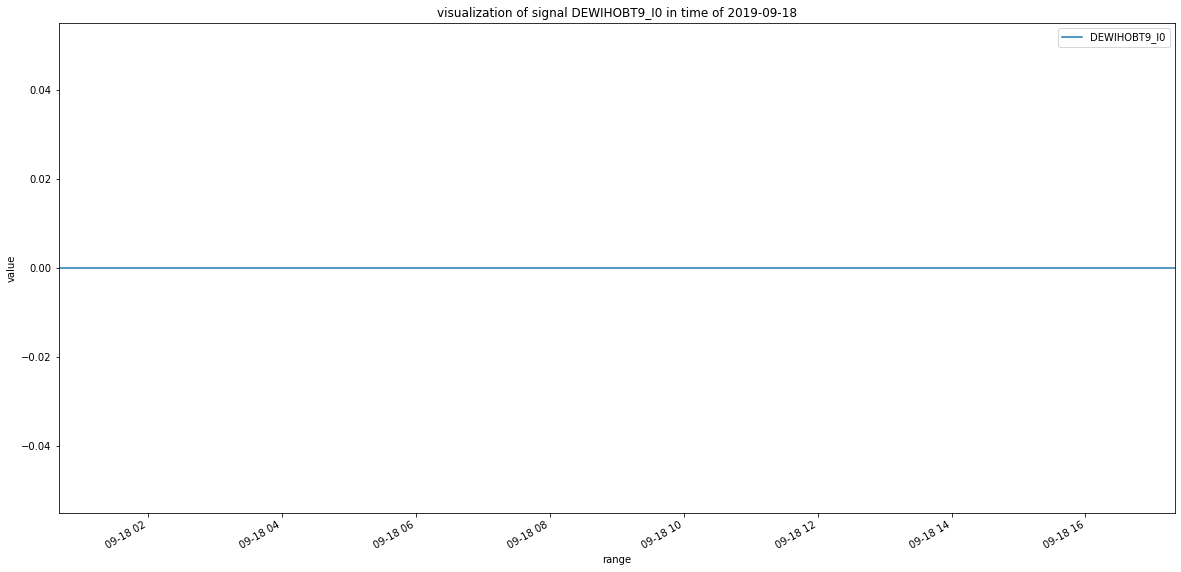

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737321.4166666666 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


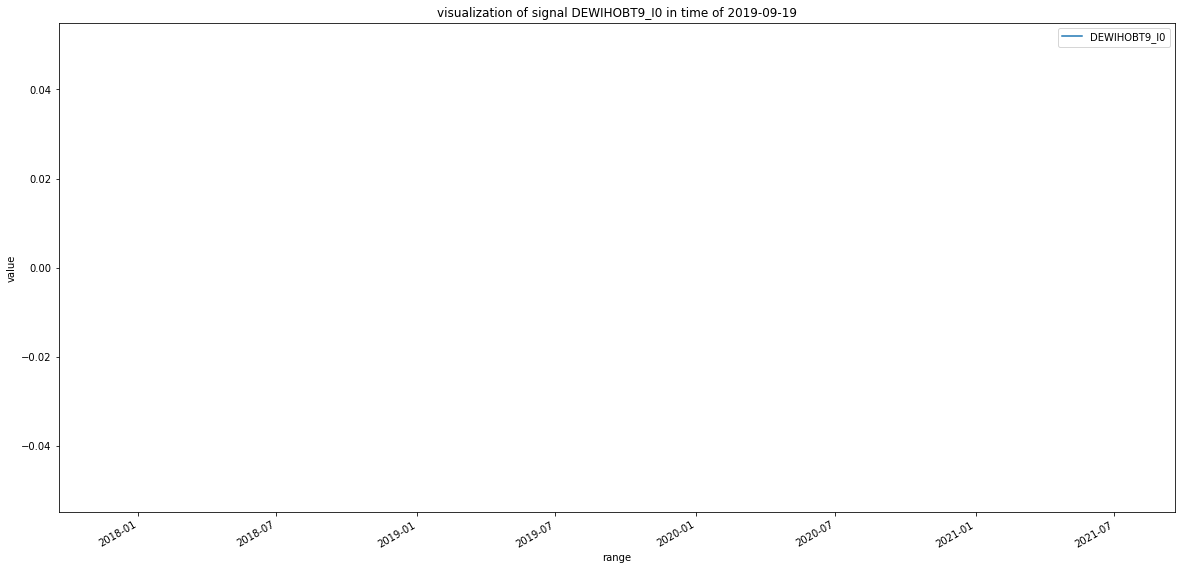

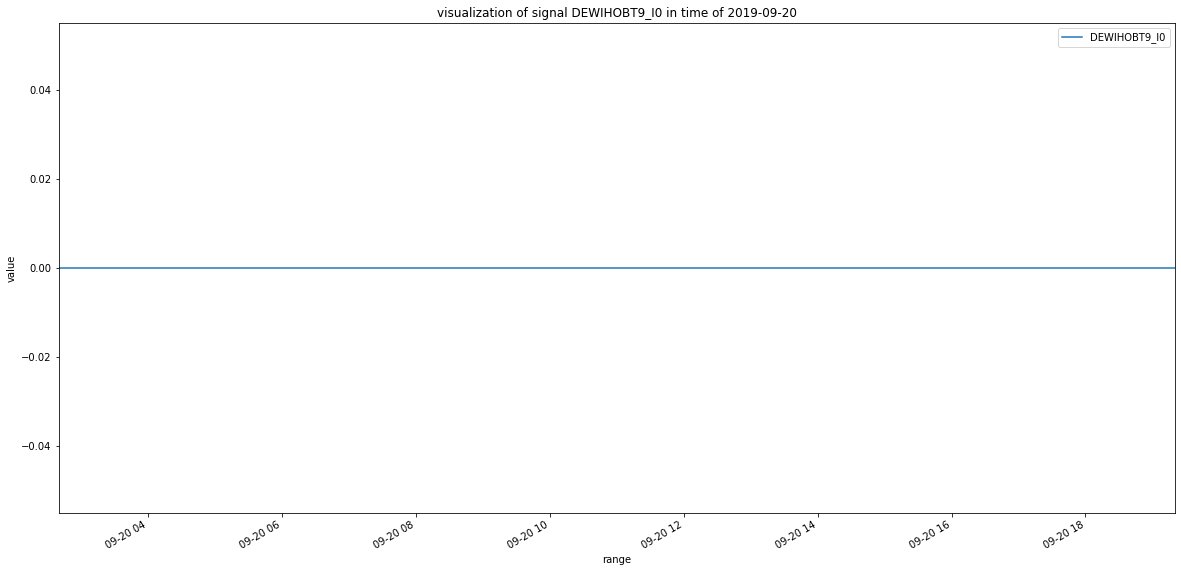

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737323.5 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


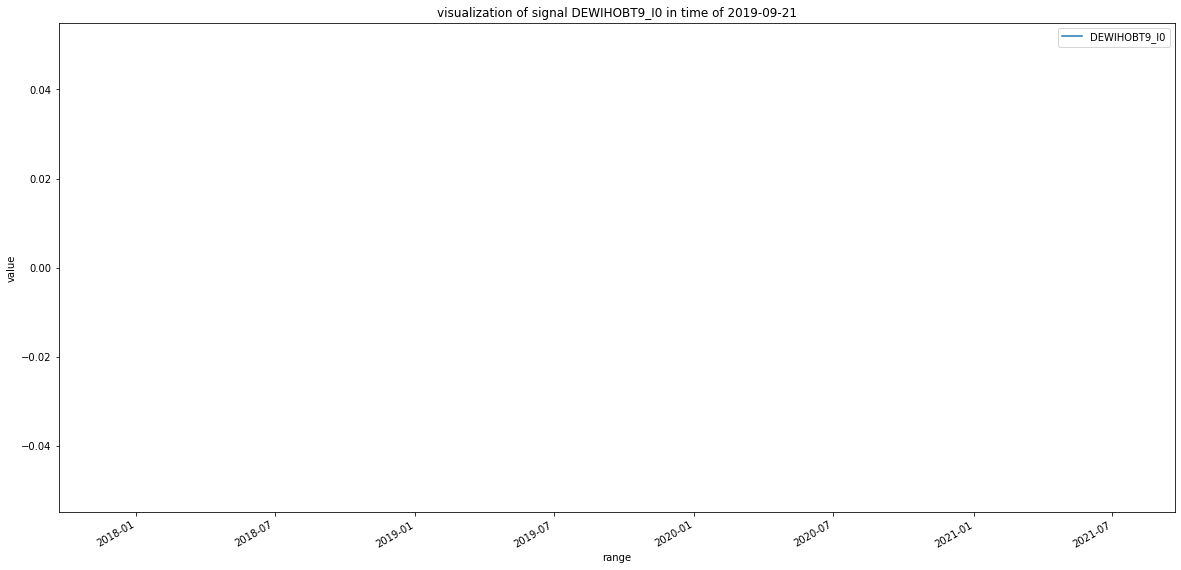

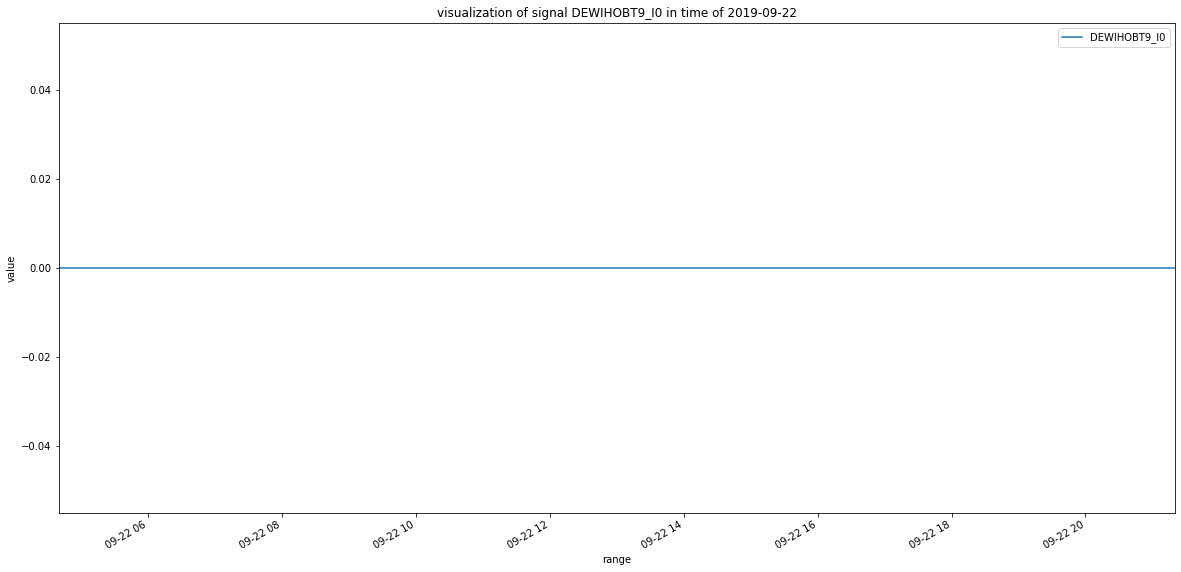

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737325.5833333334 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


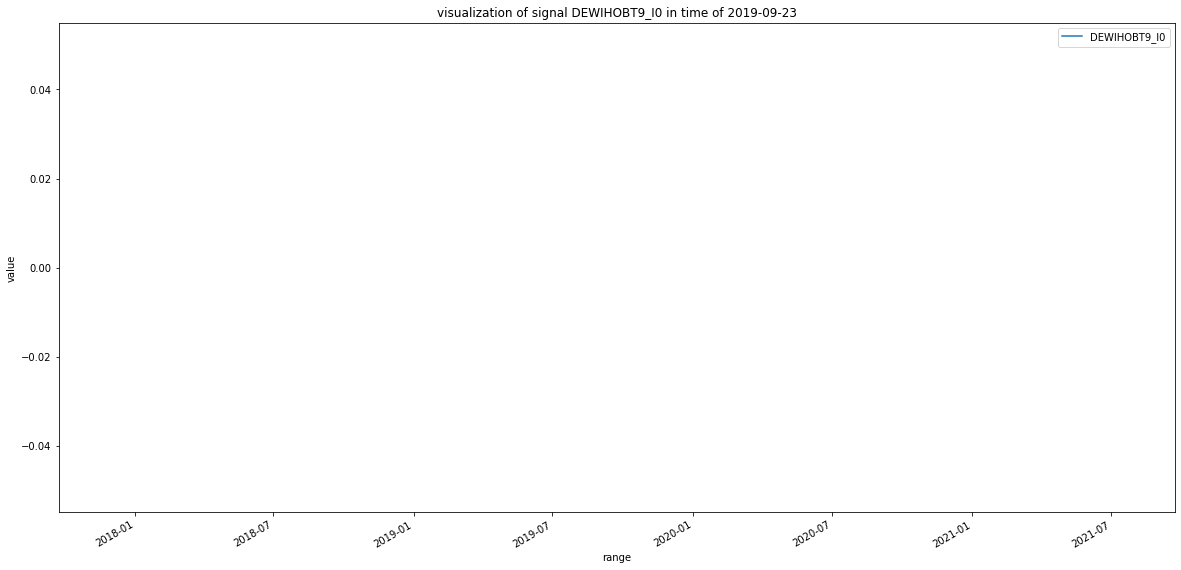

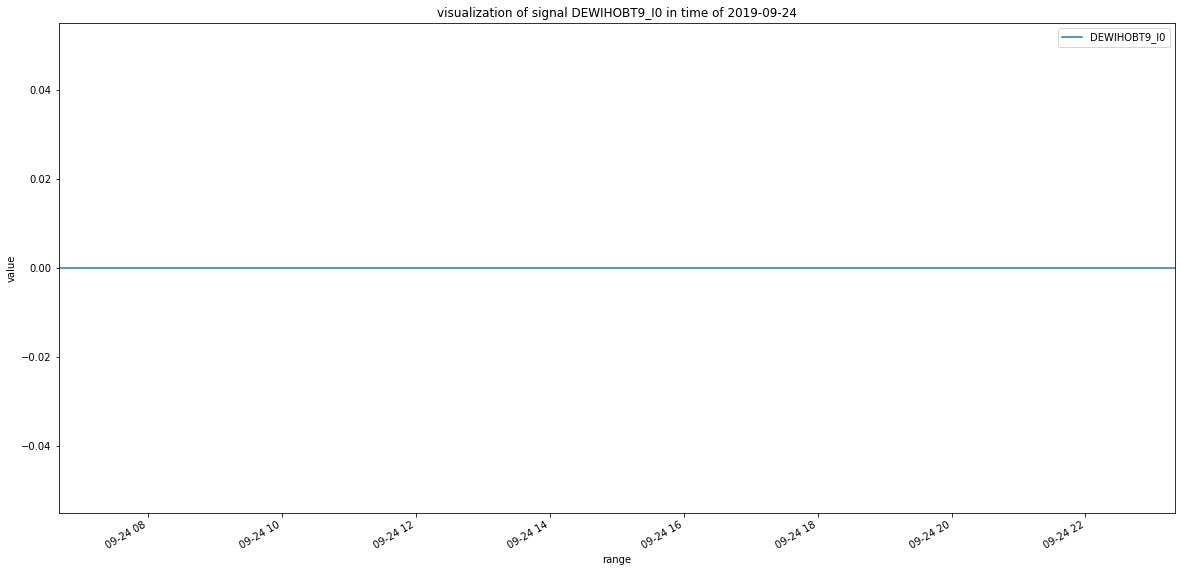

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737327.6666666666 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


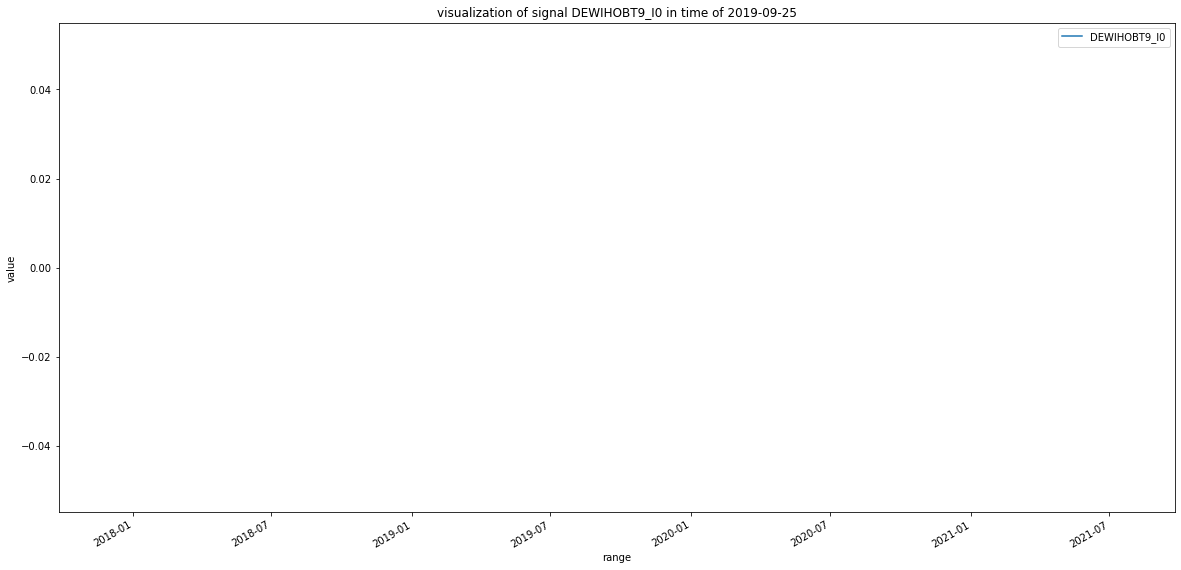

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737328.3611111111 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


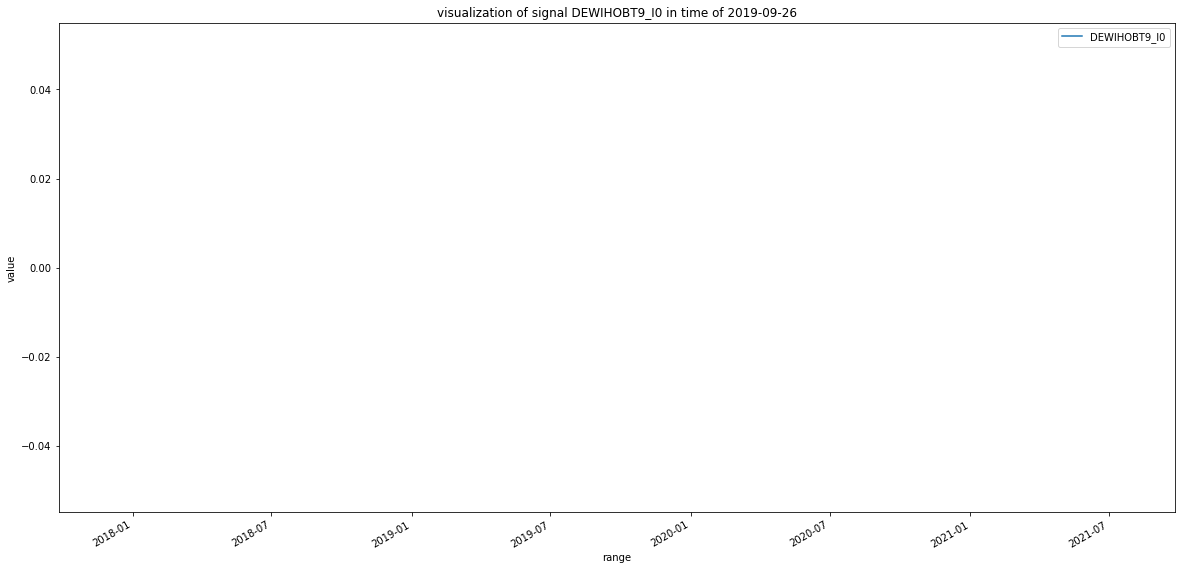

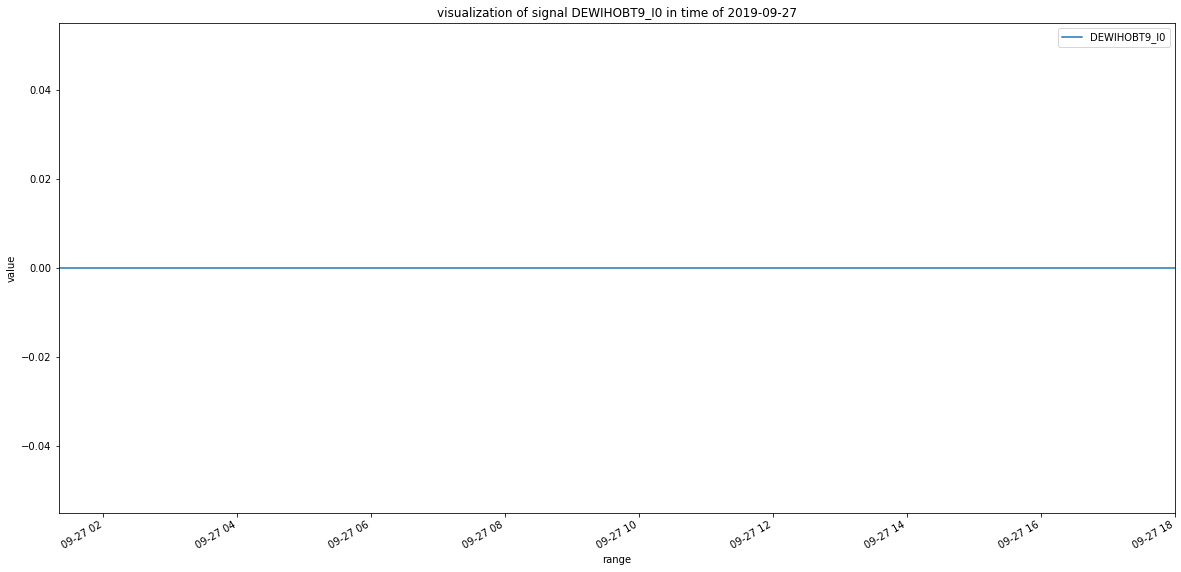

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737330.4444444445 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


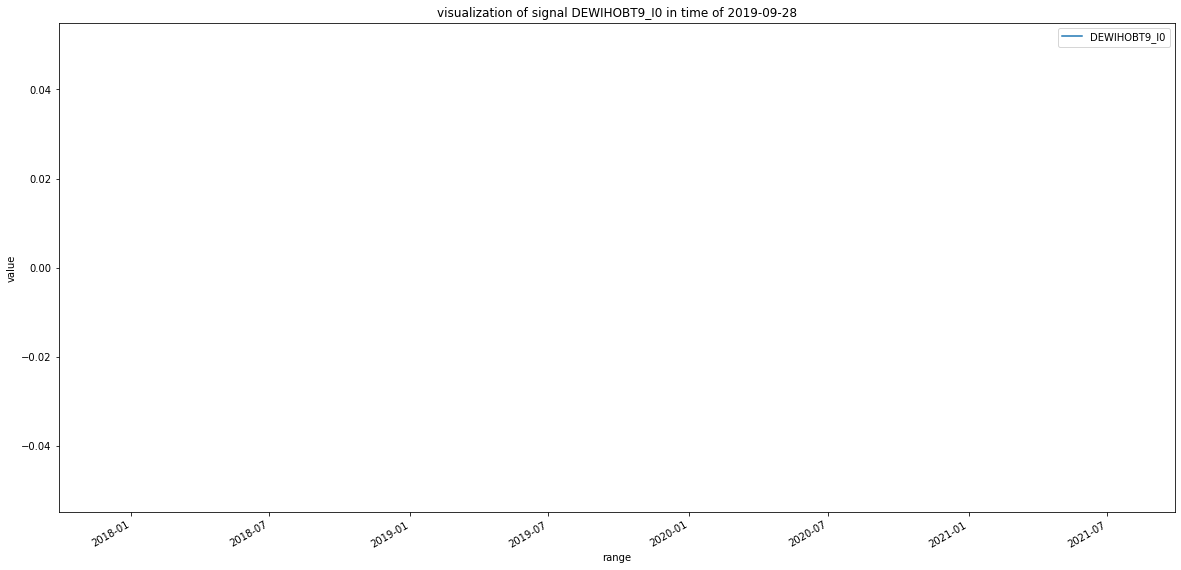

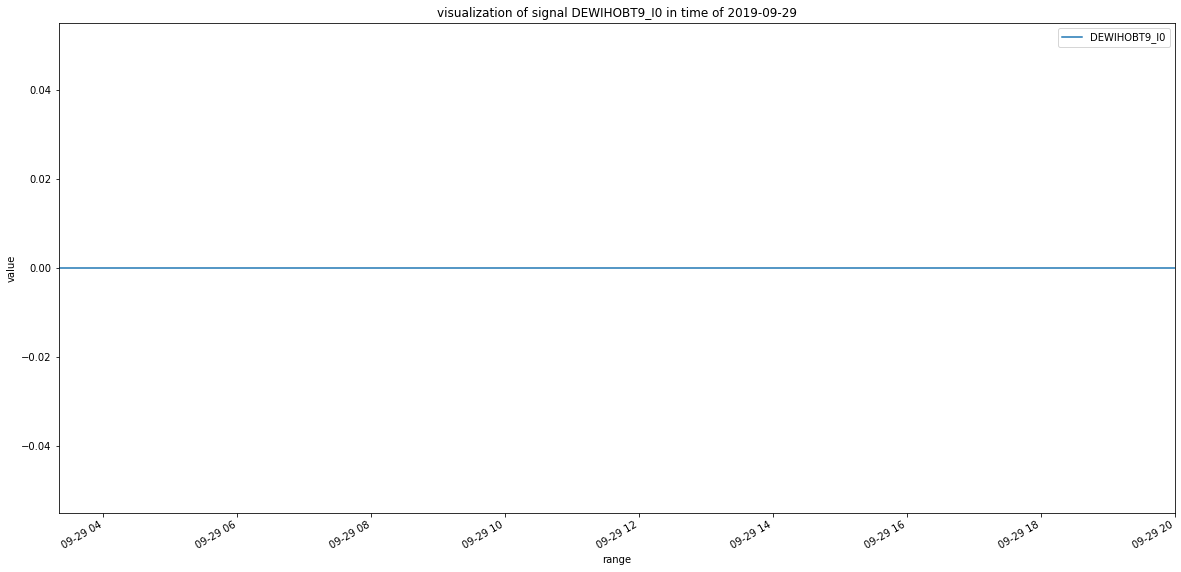

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737332.5277777778 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


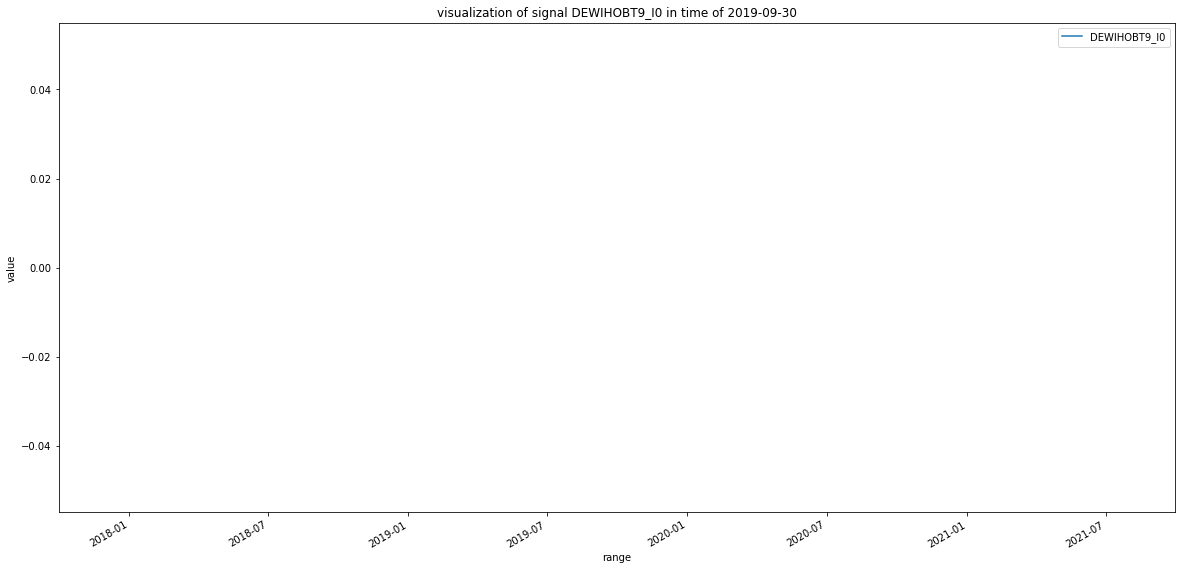

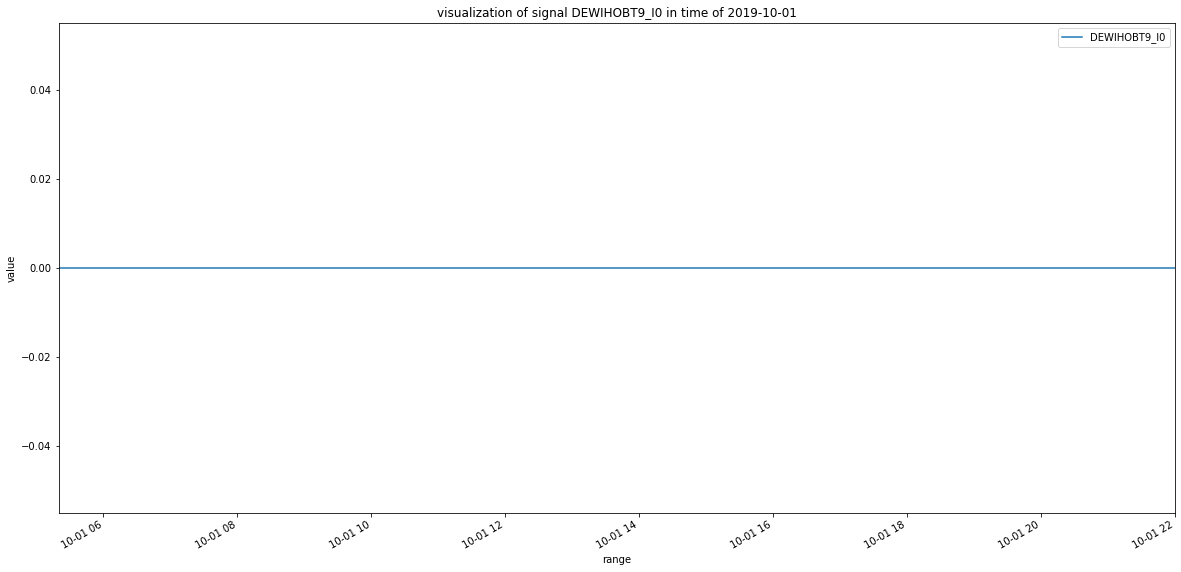

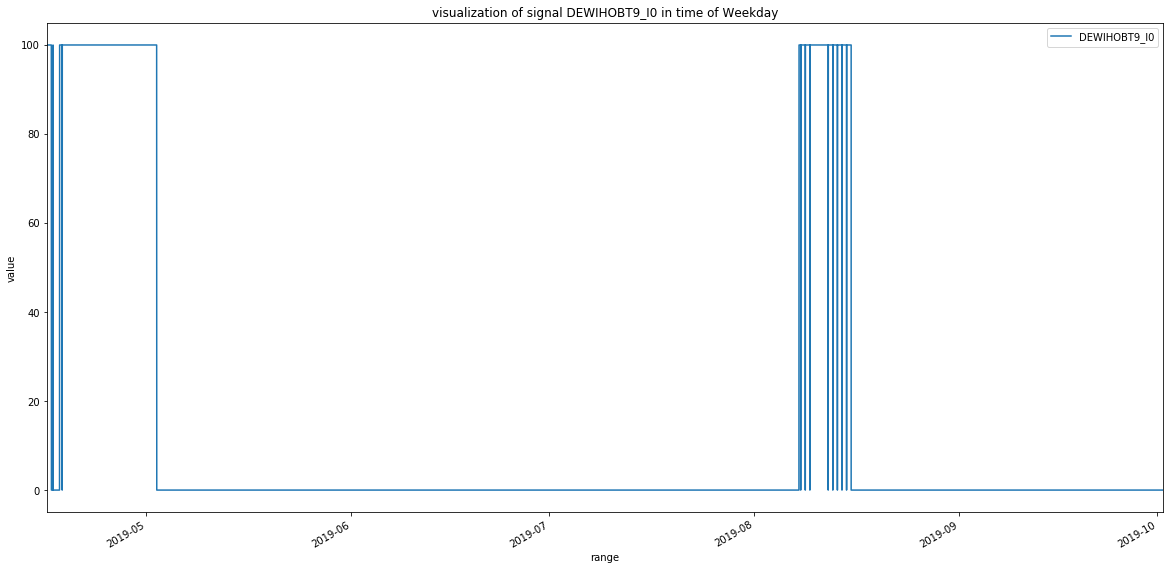

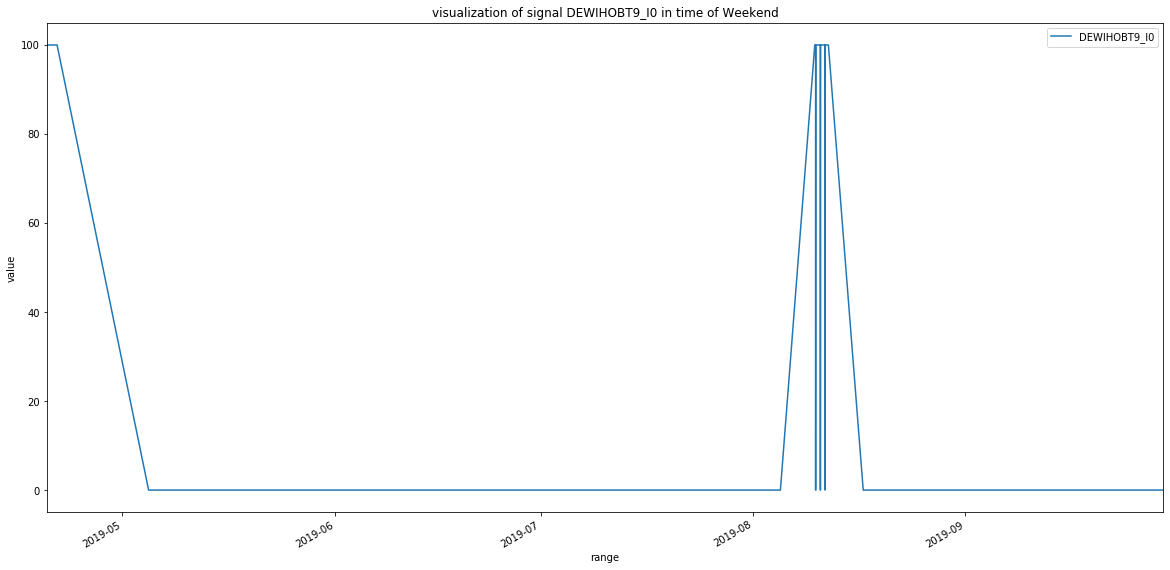

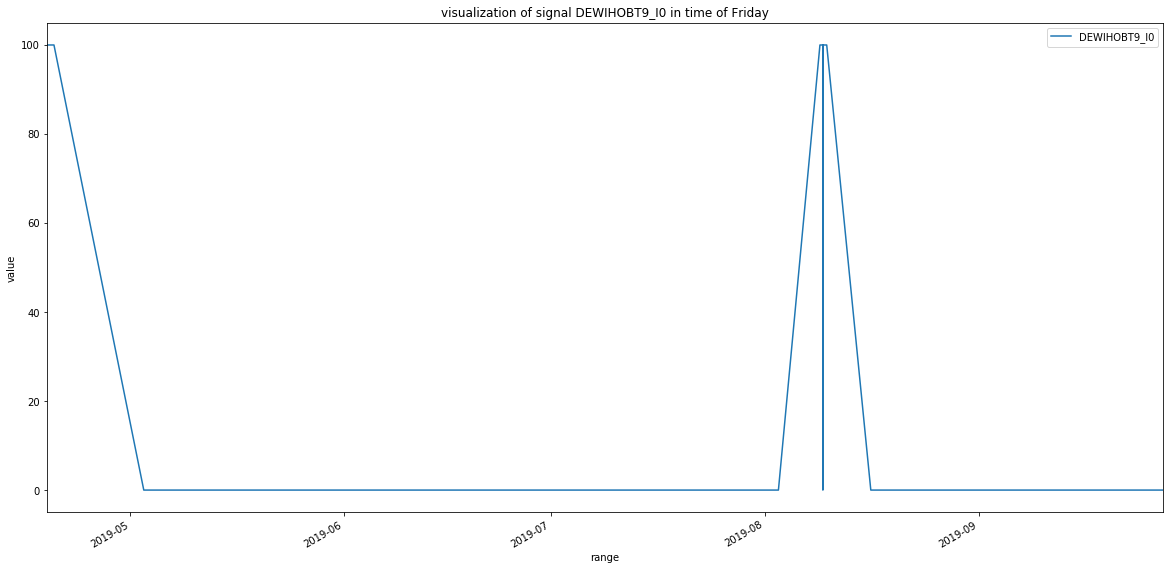

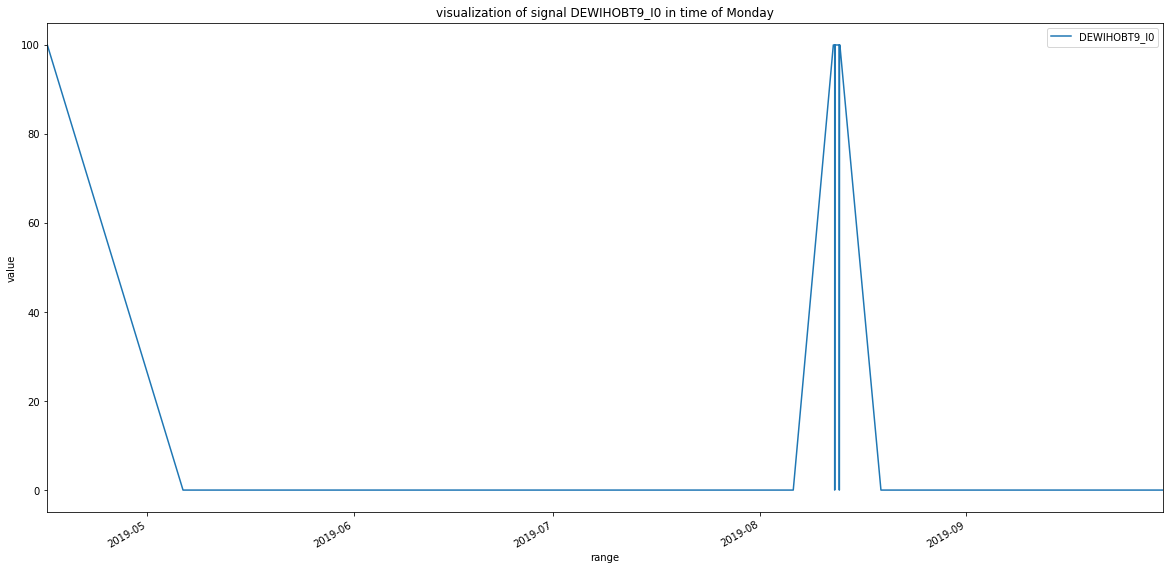

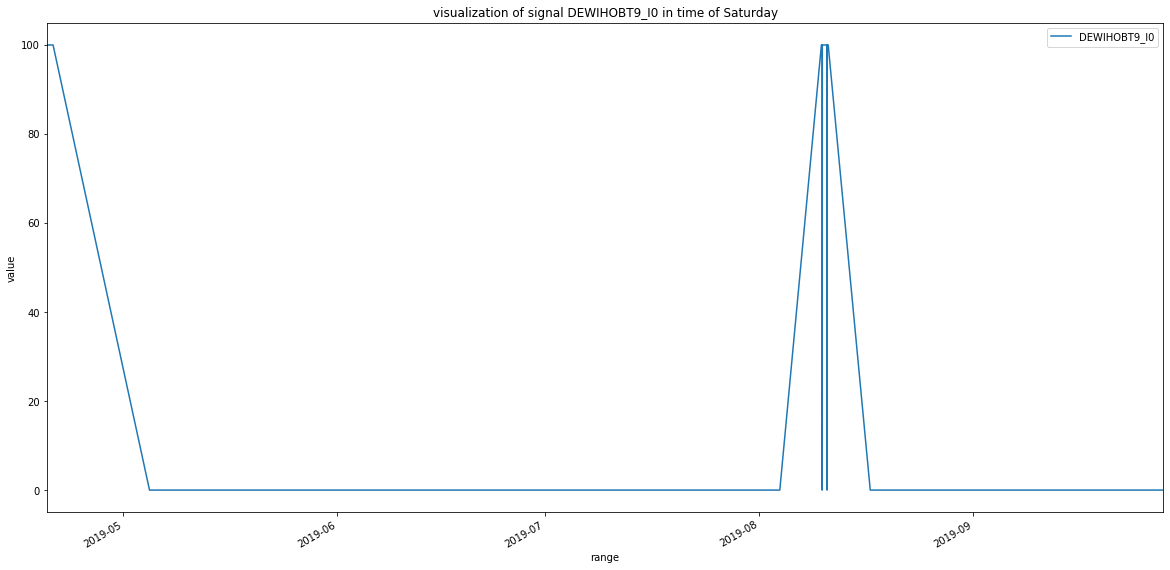

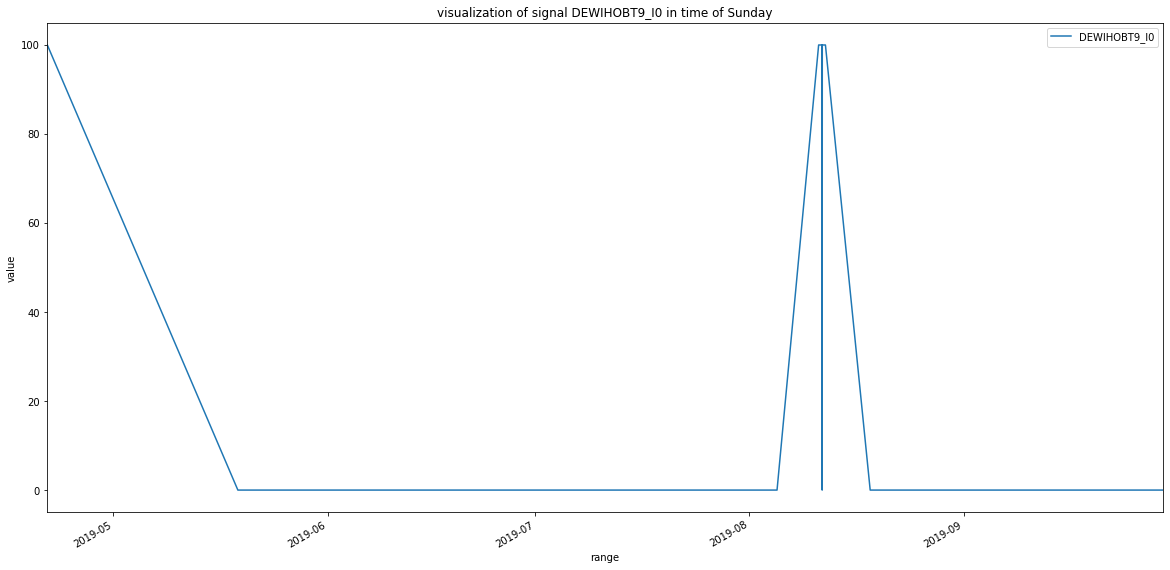

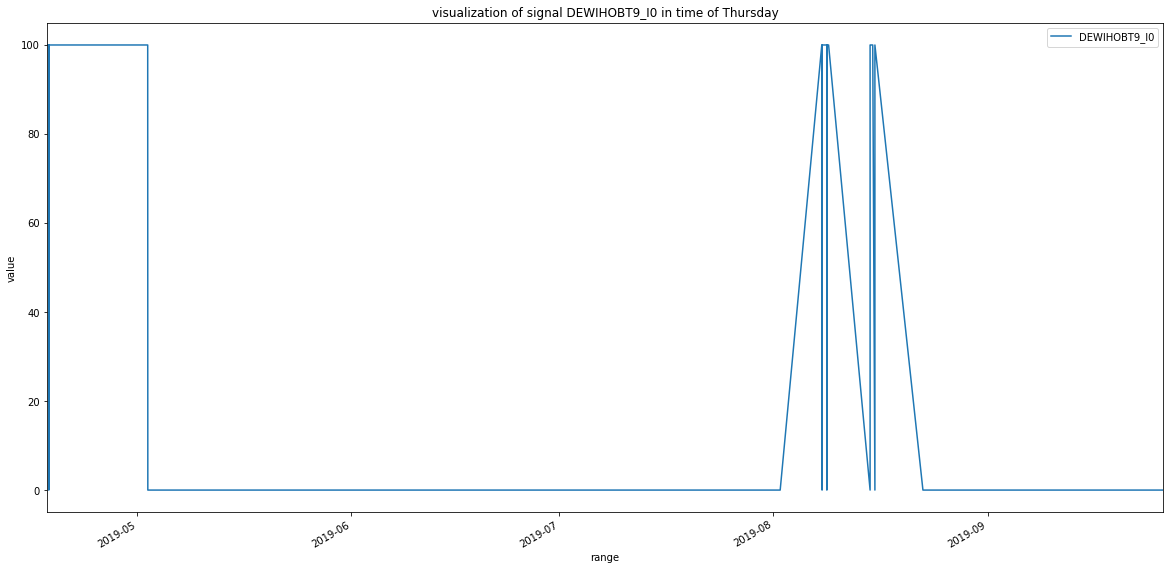

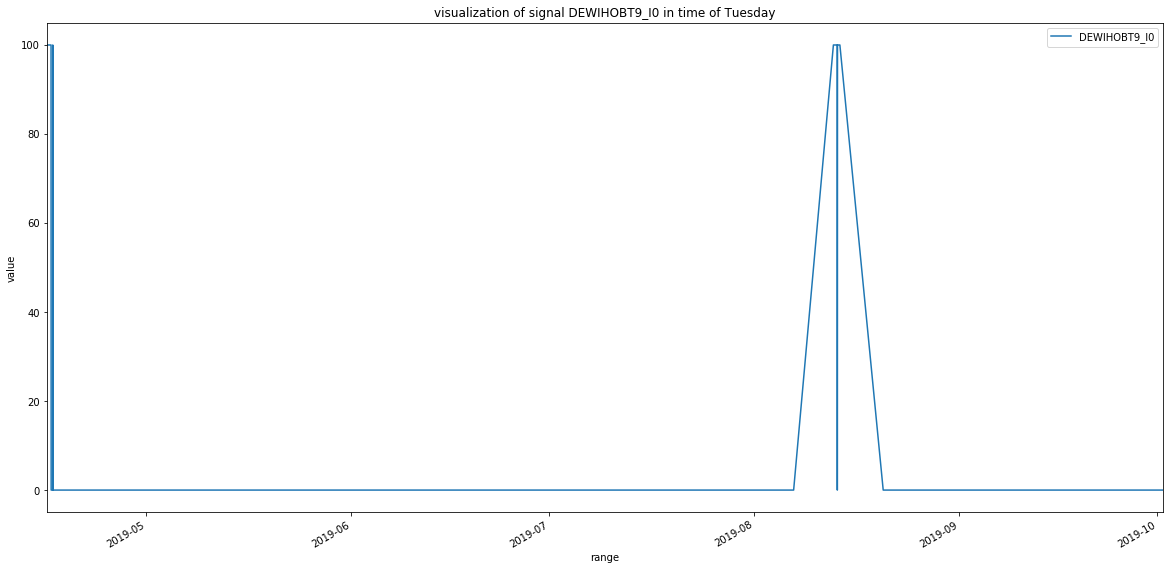

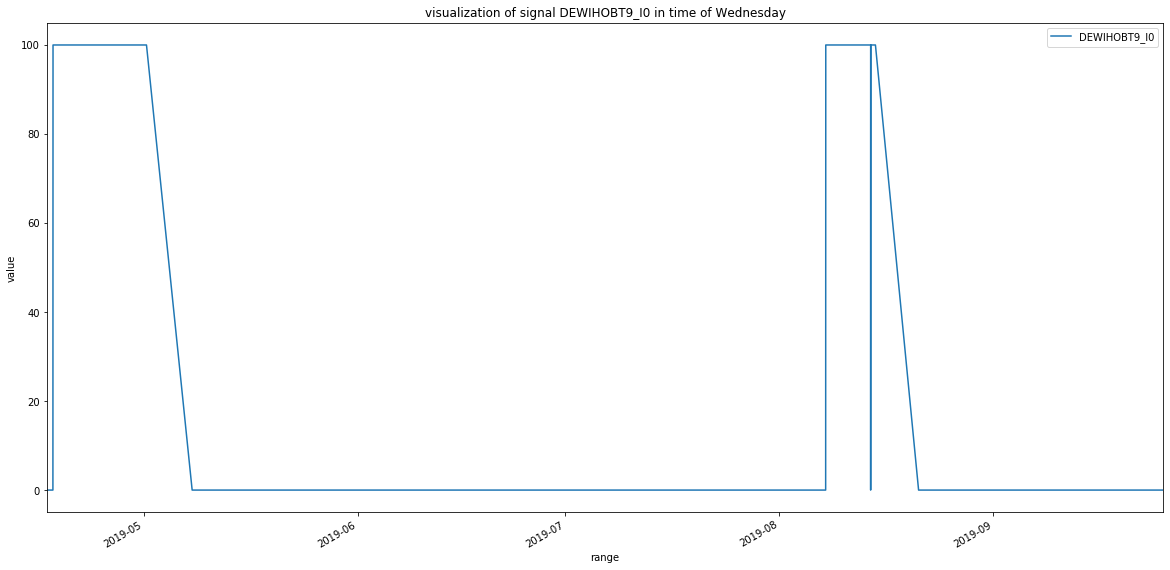

In [15]:
# df = dataframe_date_time_type(dataframe_datetime)
df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, furnace_signal_column,final_directory, subfolder_name = 'date_fig_blast_furnace')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, furnace_signal_column,final_directory, subfolder_name = 'week_fig_blast_furnace')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, furnace_signal_column,final_directory, subfolder_name = 'day_fig_blast_furnace')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [ ]:
predicted_output = NN_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)